## <b> Business Problem </b>

Oceanside Property Management is a property management company located in San Diego California. Their main business is managing rental properties. However, they have recently noticed that a lot of Airbnb hosts have been reaching out to them for guidance. These hosts are mostly uninterested in having OPM manage their rentals, however they wany some help in increasing their success as Airbnb hosts.

There have been so many Airbnb hosts reaching out that OPM has decided that this can be a good side-business for them. So they plan on officially adding airbnb consulting as a service that they also provide. In their initial research they found that the top questions that potential clients who wish to utlize this service are:
- "What can I do to get more 5 star ratings?"
- "Can you help me reach Superhost status? (or maintain Superhost status)


These questions are understandable because Airbnb puts a huge focus on getting 5 star overall ratings. They also highly publicize the benefits of getting (and maintaining) Superhost status.

Oceanside Property Management has decided that the main focus of their service will be helping clients get more 5 star reviews. Therefore they have tasked me with providing the following: 
- A model that will predict whether a specific rental unit should get a 5 Star Overall score based on other available information.
- An industry analysis of AirBnb in San Diego. Specifically looking for any insight that they can give to their clients that will give them a leg up on people who don't use their consulting service.

They also want me to answer the following questions:
- Is there a significant advantage to being a Superhost? (is it worth all the effort to get this status and maintain it?)
- The benefits of being a 5 Star overall host, vs not being one. (again, is it worth all the work to have 5 Star overall rating)
- What factors are most important in determining a 5 Star Overall Rating? (what aspects should they most focus on)

And finally, they want to know where their consulting service can make the most impact, so they know which features to market and/or which hosts to market to.

## <b>Understanding AirBnb</b>

### Who uses AirBnb?

information from: https://listwithclever.com/research/airbnb-vs-hotels-study/#sources, accessed 6/21/22

- Initially, the idea of staying in a random person’s home was viewed as absurd and dangerous, but public perception of peer-to-peer (P2P) vacation rentals has shifted significantly in recent years.
- A 2016 Goldman Sachs study found that, “If people have stayed in peer-to-peer lodging in the last five years, the likelihood that they prefer traditional hotels is halved (79 percent vs. 40 percent).”
- Airbnb is becoming the preferred choice of vacationers — 60% of travelers who use both Airbnb and hotels prefer Airbnb over comparable hotels when going on vacation
- 68% of business travelers prefer staying in hotels when traveling for work, and they're more likely to have a negative experience at an Airbnb

information from: https://www.torontomu.ca/news-events/news/2016/10/why-tourists-choose-airbnb-over-hotels/ accessed 6/21/22

David Guttentag, professor at the Ted Rogers School of Hospitality and Tourism Management, identifies five types of Airbnb guests based on his 2016 study:

- Money savers: Choose Airbnb because of affordability
- Home seekers: Interested in household amenities and larger spaces
- Collaborative consumers: Motivated by the share economy philosophy and the ability to have an authentic experience
- Pragmatic novelty seekers: While not regular Airbnb users, these travelers are drawn to the novelty of Airbnb
- Interactive novelty seekers: Want to interact with their host or other locals


### AirBnb's Focus

### Importance of 5 Star Rating

AirBnb focuses on exceeding customer expectations, which is why they strictly require that hosts maintain a near perfect rating in order to remain on the service.

### Importance of Superhost
- information from https://www.airbnb.com/d/superhost. Accessed 6/16/22

<b>Advantages: </b>
- Superhost badge to stand out among other hosts.
- Customers can filter search results to show only superhosts.

<b>Requirements:</b>
- Minimum 4.8 overall rating.
- 10 stays over the last year.
- < 1% Cancellation Rate.
- At least 90% Response Rate.
- Reassessed every 3 months.

### Problems with Airbnb Data and/or Ratings System

The review data is incredibly skewed because Airbnb requires such a high rating. Even though there is a 5 point scale, Anything lower than a 4.8 is seen as failure.
- So while this is technically a 5pt scale (as a reviewer can give 1 - 5 stars, with no partial stars allowed), getting a 4.0 average could result in being de-listed from the service!

In order to stay at a 4.8 overall rating:
- a host will need to have <b>four</b> 5-star reviews to offset a single 4-star review.
- a host will need to have <b>ten</b> 5-star reviews to offset a single 3-star review.

A common problem with this review system is that airbnb guests often assume that airbnb's review scale functions similarly to a hotel review scale, which also uses 5 stars, with 3 considered average, 4 above average, and 5 star being the best possible experience.

## <b>My Process</b>

### Summary of My Process: 


### Goals for my Model:

<b><u>What I will be looking for in my models:</b></u>
- 1. <b>High Precision Score:</b> I want to make sure that I am identifying as many airbnb units that meet my target criteria as possible. I will keep this in balance by checking F1 Score.
- 2. <b>Good F1 Score:</b> While I am ultimately not concerned with Recall , a good F1 score means that the model is performing well on both Recall and Precision. Since Recall and Precision are inverses of each other, a good F1 score ensures that the model isn't skewed too far toward one or the other. (ie, a model that predicts EVERY customer is within my target would have perfect Recall, but would be useless).
- 3. <b>High Cross Validation Score:</b> This ensures that the model isn't overly trained on the test data and that it does a good job of predicted unseen and unknown data. (ie, the test set).
- 4. <b>Area Under the Curve (AUC):</b> The ROC AUC Score measures the Area under the ROC curve, which means that it classifies the true positive rate against the false positive rate. The higher the score, the better performing the model is. 

<b><u>That said, here is the scale that I will use to evaluate my models:</b></u>

- <b>.69 or less:</b> Model performs only slightly better than guessing and is worthless for my analysis.
- <b>.70 - .79:</b> Model still isn't performing very well, but is at minimum acceptable levels.
- <b>.80 - .89:</b> Model is performing fairly well. My goal is to be in this range or better.
- <b>.90 - .99:</b> Model is performing very well. I would be very happy to have a final model in this range.

## <b> Preprocessing </b>

### Loading Data

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
from matplotlib.pylab import rcParams
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_squared_log_error, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import plot_confusion_matrix
from xgboost import XGBClassifier
import numpy as np


In [2]:
pd.set_option('display.max_rows', 1000)
plt.style.use('fivethirtyeight')

### Full_df: Dataframe Containing All Available Columns

In [3]:
full_df = pd.read_csv('listings.csv.gz')

In [4]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10935 entries, 0 to 10934
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            10935 non-null  int64  
 1   listing_url                                   10935 non-null  object 
 2   scrape_id                                     10935 non-null  int64  
 3   last_scraped                                  10935 non-null  object 
 4   name                                          10935 non-null  object 
 5   description                                   10809 non-null  object 
 6   neighborhood_overview                         7440 non-null   object 
 7   picture_url                                   10935 non-null  object 
 8   host_id                                       10935 non-null  int64  
 9   host_url                                      10935 non-null 

### Fixing Price
- Price is currently a string. I need to strip out the extra characters and convert the datatype to Float so that I can better utilize the data.

In [5]:
full_df['price'].head(2)

0     $60.00
1    $282.00
Name: price, dtype: object

In [6]:
full_df['price'] = full_df['price'].map(lambda x: x.replace('$',' '))
full_df['price'] = full_df['price'].map(lambda x: x.replace(',',''))
full_df['price'] = full_df['price'].astype(float)
full_df['price'].head(2)

0     60.0
1    282.0
Name: price, dtype: float64

In [7]:
#fulldf['price'].head(2)

## <b> Exploratory Data Analysis </b>

###  Base DF
- I am slicing out the columns that will be useful for analyzing and modeling the data, to make the dataframe more manageable.

In [8]:
base_df = full_df[['price', 'review_scores_rating', 'review_scores_accuracy',
                      'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                      'review_scores_location', 'review_scores_value','accommodates', 'bedrooms', 'beds',
                      'instant_bookable', 'property_type', 'room_type', 'amenities', 'availability_365', 
                      'availability_30','availability_90','host_id', 'calculated_host_listings_count', 
                      'host_response_time', 'host_response_rate','host_is_superhost']]

In [9]:
df = base_df

### Host Info

In [10]:
df['host_response_time'].value_counts()

within an hour        7911
within a few hours    1327
within a day           590
a few days or more     285
Name: host_response_time, dtype: int64

The majority of hosts reply within an hour, so I will turn this into a binary classification

In [11]:
df['host_response_rate'].value_counts().head()

100%    7229
97%      354
98%      349
91%      279
99%      261
Name: host_response_rate, dtype: int64

Majority of hosts have 100% response rate, so I will turn this into a binary classification.

In [12]:
df['instant_bookable'].value_counts()

f    5912
t    5023
Name: instant_bookable, dtype: int64

In [488]:
df['host_id'].value_counts()

88168913     193
429429981     93
3017970       88
104309976     69
113421970     60
            ... 
4262739        1
112575132      1
29705038       1
61174604       1
98164702       1
Name: host_id, Length: 3736, dtype: int64

### New Feature: Host Listings
- Creating a new feature that tells whether a host has many listings.

In [14]:
df['calculated_host_listings_count'].value_counts().head(10)


1      3568
2      1468
3       816
4       540
5       410
7       280
6       222
219     219
8       216
163     163
Name: calculated_host_listings_count, dtype: int64

In [15]:
df['host_listings_5-'] =df['calculated_host_listings_count'] <= 5
df['host_listings_5-'].sum()

6802

This is the target demographic for receiving this service. So I will make it a binary classification.

### New Feature: Capacity Ranges

In [18]:
df['accommodates'].value_counts()

2     2716
4     2306
6     1638
8      841
3      757
5      647
1      604
10     411
7      291
12     224
16     172
9      123
14      99
11      53
15      30
13      20
0        3
Name: accommodates, dtype: int64

In [19]:
#df['capacity_couple'] = df['accommodates'] <= 2
df['capacity_5+'] = df['accommodates'] >=5
#df['capacity_large'] = df['accommodates'] <= 5

Analysis: Again, a binary classifier will be the most useful. Since a "family" unit would accomadate 4 or less, I am setting the classifier at 5 or more in order to determine whether the rental units are hotel room sized (2 or 4 people), or larger.

In [491]:
df['capacity_5+'].value_counts()

False    4117
True     3693
Name: capacity_5+, dtype: int64

This seems to be a good classifier as the split ends up being close to 50%.

### New Feature: Bedroom Ranges

In [23]:
df['bedrooms'].value_counts()

1.0     4621
2.0     2684
3.0     1538
4.0      665
5.0      254
6.0       87
7.0       25
8.0       16
10.0       6
9.0        5
11.0       2
12.0       2
Name: bedrooms, dtype: int64

46% of the units that I have bedroom data for are 1 bedroom. I will create a feature that groups units as either 1 bedroom or 2 or more.

In [492]:
df['bedrooms_2+'] = df['bedrooms'] >= 2

In [493]:
df['bedrooms_2+'].value_counts()

True     4231
False    3579
Name: bedrooms_2+, dtype: int64

### New Feature: Bookings Above Average
- I have determined that price is not a great metric for measuring rentals because the prices are relative, and no two units are exactly the same.
- However, the main thing that hosts want is to maximimze their bookings. So I want to capture and analyze how much availabilty they have so I that I have a metric to compare across the board.

In [26]:
df['availability_30'].value_counts()

0     2939
5      450
1      447
2      434
4      432
3      400
30     394
6      383
8      333
9      308
7      297
29     275
11     259
10     258
23     244
13     240
12     239
21     238
14     218
16     208
15     206
20     202
26     193
19     192
17     191
18     187
27     180
22     163
25     158
28     141
24     126
Name: availability_30, dtype: int64

In [27]:
df['availability_30'].describe()

count    10935.000000
mean         9.719707
std          9.791058
min          0.000000
25%          0.000000
50%          6.000000
75%         17.000000
max         30.000000
Name: availability_30, dtype: float64

- The median for availability 30 days out is 7 unbooked days. 
- I have made this a binary choice to indicate whether a unit is booked more often than the median, or less often than the median.

In [29]:
df['bookings_above_avg'] = df['availability_30'] <= 7


In [30]:
df['bookings_above_avg'].value_counts()

True     5782
False    5153
Name: bookings_above_avg, dtype: int64

### NEW FEATURE Availability Rate

In [31]:
df['availability_30']

0         0
1        12
2         5
3        10
4        25
         ..
10930     8
10931    12
10932    28
10933    28
10934     1
Name: availability_30, Length: 10935, dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10935 entries, 0 to 10934
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           10935 non-null  float64
 1   review_scores_rating            9408 non-null   float64
 2   review_scores_accuracy          9385 non-null   float64
 3   review_scores_cleanliness       9385 non-null   float64
 4   review_scores_checkin           9383 non-null   float64
 5   review_scores_communication     9385 non-null   float64
 6   review_scores_location          9383 non-null   float64
 7   review_scores_value             9383 non-null   float64
 8   accommodates                    10935 non-null  int64  
 9   bedrooms                        9905 non-null   float64
 10  beds                            10813 non-null  float64
 11  instant_bookable                10935 non-null  object 
 12  property_type                   

In [33]:
df['availability_30_rate'] = df['availability_30'].apply(lambda x: x / 30)

In [34]:
df.head(2)

price  review_scores_rating  review_scores_accuracy  \
0   60.0                  5.00                    5.00   
1  282.0                  4.87                    4.91   

   review_scores_cleanliness  review_scores_checkin  \
0                       5.00                   5.00   
1                       4.64                   4.99   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         5.00                    4.00                 5.00   
1                         4.98                    4.87                 4.86   

   accommodates  bedrooms  ...   host_id calculated_host_listings_count  \
0             2       1.0  ...  43636297                              1   
1             6       3.0  ...  17761788                              2   

  host_response_time host_response_rate host_is_superhost  host_listings_5-  \
0     within an hour               100%                 f              True   
1     within an hour               100%                 t              True   

   capacity_5+  bedrooms_2+  bookings_above_avg  availability_30_rate  
0        False        False                True                   0.0  
1         True         True               False                   0.4  

[2 rows x 28 columns]

In [494]:
availability = df[['availability_30', 'availability_30_rate']]

In [495]:
availability

availability_30  availability_30_rate
0                    0                 0.000
1                   12                 0.400
2                    5                 0.167
3                   10                 0.333
4                   25                 0.833
...                ...                   ...
10929               18                 0.600
10930                8                 0.267
10931               12                 0.400
10932               28                 0.933
10933               28                 0.933

[7810 rows x 2 columns]

### New Feature: Host Response Rate 100
- Feature that determines whether a host has a perfect response rate.

In [37]:
df['host_response_rate'] = df['host_response_rate'].str.replace('%', ' ')
df['host_response_rate']  = df['host_response_rate'].astype('float')
df['host_response_100'] = df['host_response_rate'] == 100.0
df['host_response_100'].value_counts()

In [496]:
#df['host_response_100'].value_counts()

True     5721
False    2089
Name: host_response_100, dtype: int64

### Fixing Host is Superhost

Feature is currently a string instead of a bool. Correcting that so I can classify whether a host is a superhost or not.

In [39]:
df['host_is_superhost'] = df['host_is_superhost'].str.replace('f', 'False')
df['host_is_superhost'] = df['host_is_superhost'].str.replace('t', 'True')
df['superhost'] = df['host_is_superhost'] == 'True'
df['superhost'].value_counts()

False    6095
True     4840
Name: superhost, dtype: int64

### Fixing Instant Bookable
- Feature is currently a string instead of a bool. Correcting that so I can classify whether the unit can be instantly booked or not.

In [40]:
df['instant_bookable'] = df['instant_bookable'].str.replace('f', 'False')
df['instant_bookable'] = df['instant_bookable'].str.replace('t', 'True')
df['instant_bookable'] = df['instant_bookable'] == 'True'
df['instant_bookable'].value_counts()

False    5912
True     5023
Name: instant_bookable, dtype: int64

### New Feature: 5-Star Units
- this is my target feature. It classifies whether a unit is in our target 4.8 - 5.0 overall rating range or not.

In [41]:
(df['review_scores_rating'] == 5.00).sum()

2054

In [42]:
df['review_scores_rating'].isna().sum()

1527

There are 1527 Null records that need to be dealt with. If I drop them, I will lose 14% of my data.

In [43]:
nulls = df[df['review_scores_rating'].isna()]

In [44]:
nulls.head(3)

price  review_scores_rating  review_scores_accuracy  \
12  1200.0                   NaN                     NaN   
23   217.0                   NaN                     NaN   
70   129.0                   NaN                     NaN   

    review_scores_cleanliness  review_scores_checkin  \
12                        NaN                    NaN   
23                        NaN                    NaN   
70                        NaN                    NaN   

    review_scores_communication  review_scores_location  review_scores_value  \
12                          NaN                     NaN                  NaN   
23                          NaN                     NaN                  NaN   
70                          NaN                     NaN                  NaN   

    accommodates  bedrooms  ...  host_response_time  host_response_rate  \
12             8       4.0  ...                 NaN                 NaN   
23             4       1.0  ...      within an hour                75.0   
70             2       1.0  ...  within a few hours               100.0   

   host_is_superhost host_listings_5- capacity_5+  bedrooms_2+  \
12             False             True        True         True   
23             False            False       False        False   
70             False             True       False        False   

    bookings_above_avg  availability_30_rate  host_response_100  superhost  
12               False              0.700000              False      False  
23               False              0.533333              False      False  
70               False              1.000000               True      False  

[3 rows x 30 columns]

nulls appear to have no ratings. Let's drop them for now.

In [45]:
df = df.dropna()

<b> 8385 Records are left after dropping null values </b>

In [46]:
df.head(2)

price  review_scores_rating  review_scores_accuracy  \
0   60.0                  5.00                    5.00   
1  282.0                  4.87                    4.91   

   review_scores_cleanliness  review_scores_checkin  \
0                       5.00                   5.00   
1                       4.64                   4.99   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         5.00                    4.00                 5.00   
1                         4.98                    4.87                 4.86   

   accommodates  bedrooms  ...  host_response_time  host_response_rate  \
0             2       1.0  ...      within an hour               100.0   
1             6       3.0  ...      within an hour               100.0   

  host_is_superhost host_listings_5- capacity_5+  bedrooms_2+  \
0             False             True       False        False   
1              True             True        True         True   

   bookings_above_avg  availability_30_rate  host_response_100  superhost  
0                True                   0.0               True      False  
1               False                   0.4               True       True  

[2 rows x 30 columns]

#### <b> Decision: 5 Star = 4.8+</b>

In [498]:
#df['5_star'] = df['review_scores_rating'] >= 4.8
df['5_star'] = df['review_scores_rating'] >= 4.9

### Analysis:
- I have decided to classify "5 Star" units as ones that have a 4.8 or higher overall rating. I am doing this to allow a little leeway in the units, and also because 4.8 is the threshold that airbnb uses to determine whether a unit can become or remain a SuperHost.

In [499]:
df['5_star'].value_counts()

False    4546
True     3264
Name: 5_star, dtype: int64

### Room Type

In [49]:
df['room_type'].value_counts()

Entire home/apt    6487
Private room       1261
Shared room          57
Hotel room            5
Name: room_type, dtype: int64

### Host Response Time

In [50]:
df['host_response_time'].value_counts()

within an hour        6229
within a few hours     993
within a day           446
a few days or more     142
Name: host_response_time, dtype: int64

### Creating Classifier Columns
- these columns will capture the number of 5 Star reviews left for each review metric.

In [51]:
df['accuracy_5'] = df['review_scores_accuracy'] == 5.00
df['cleanliness_5'] = df['review_scores_cleanliness'] == 5.00
df['checkin_5'] = df['review_scores_checkin'] == 5.00
df['location_5'] = df['review_scores_location'] == 5.00
df['value_5'] = df['review_scores_value'] == 5.00
df['communication_5'] = df['review_scores_communication'] == 5.00

### Decision:  Leave out price

<b> It is difficult to analyze price because it is relative. A low priced home that sleeps 10 people still costs more than a high priced home that sleeps 2. That said, I will create a classifier to determine wheteher a unit is above or below the MEDIAN price. (I rounded the median of 197 to 200)</b>

In [52]:
df['price'].describe()

count     7810.000000
mean       294.637900
std        330.516177
min         10.000000
25%        120.000000
50%        197.000000
75%        352.750000
max      10000.000000
Name: price, dtype: float64

In [54]:
df['price_200+'] = df['price'] >= 200

In [497]:
df['price_200+'].value_counts()

False    3962
True     3848
Name: price_200+, dtype: int64

In [ ]:
#re-creating base_df so I can call it again
base_df = df

### Creating Analysis_df

In [56]:
analysis_df = base_df.copy()

In [57]:
analysis_df['5_star'].value_counts()

True     4918
False    2892
Name: 5_star, dtype: int64

<b>Analysis: Out of the 7810 Records in this dataset, 63% are 5 Star Units. </b>

In [58]:
df['room_type'].value_counts()

Entire home/apt    6487
Private room       1261
Shared room          57
Hotel room            5
Name: room_type, dtype: int64

In [59]:
df['availability_30_rate'].describe()

count    7810.000000
mean        0.318720
std         0.308436
min         0.000000
25%         0.033333
50%         0.233333
75%         0.533333
max         1.000000
Name: availability_30_rate, dtype: float64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7810 entries, 0 to 10933
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           7810 non-null   float64
 1   review_scores_rating            7810 non-null   float64
 2   review_scores_accuracy          7810 non-null   float64
 3   review_scores_cleanliness       7810 non-null   float64
 4   review_scores_checkin           7810 non-null   float64
 5   review_scores_communication     7810 non-null   float64
 6   review_scores_location          7810 non-null   float64
 7   review_scores_value             7810 non-null   float64
 8   accommodates                    7810 non-null   int64  
 9   bedrooms                        7810 non-null   float64
 10  beds                            7810 non-null   float64
 11  instant_bookable                7810 non-null   bool   
 12  property_type                   7

## <b>Preparing for Modeling</b>

### One Hot Encoding

In [61]:
need_to_encode = df[['5_star', 'accuracy_5', 'cleanliness_5', 'checkin_5', 'location_5', 'value_5',
                     'communication_5', 'room_type', 'bedrooms_2+',
                     'bookings_above_avg', 'instant_bookable', 'capacity_5+', 
                     #'capacity_family', 'capacity_large',
                     'host_listings_5-',
                     #'host_listings_1', 'host_listings_2-4', 'host_listings_5-10',
                     #'host_listings_11-49', 'host_listings_50+',
                     'superhost', 'host_response_100',
                     #'host_response_90', 'host_response_low',
                     'host_response_time',
                  #  'availability_rate_0', 'availability_rate_low', 'availability_rate_high'
                    ]]

                    
ohe = OneHotEncoder()
ohe.fit(need_to_encode)

ohe_1 = ohe.transform(need_to_encode).toarray()

ohe_df = pd.DataFrame(ohe_1, columns=ohe.get_feature_names(need_to_encode.columns))
ohe_df.head(2)

5_star_False  5_star_True  accuracy_5_False  accuracy_5_True  \
0           0.0          1.0               0.0              1.0   
1           0.0          1.0               1.0              0.0   

   cleanliness_5_False  cleanliness_5_True  checkin_5_False  checkin_5_True  \
0                  0.0                 1.0              0.0             1.0   
1                  1.0                 0.0              1.0             0.0   

   location_5_False  location_5_True  ...  host_listings_5-_False  \
0               1.0              0.0  ...                     0.0   
1               1.0              0.0  ...                     0.0   

   host_listings_5-_True  superhost_False  superhost_True  \
0                    1.0              1.0             0.0   
1                    1.0              0.0             1.0   

   host_response_100_False  host_response_100_True  \
0                      0.0                     1.0   
1                      0.0                     1.0   

   host_response_time_a few days or more  host_response_time_within a day  \
0                                    0.0                              0.0   
1                                    0.0                              0.0   

   host_response_time_within a few hours  host_response_time_within an hour  
0                                    0.0                                1.0  
1                                    0.0                                1.0  

[2 rows x 36 columns]

#### Fixing Host Response Time
- grouping all responses beyond 24 hours together.

In [65]:
#ohe_df['host_response_24hrs+'] = ohe_df.apply(lambda x: x['host_response_time_a few days or more'] + x['host_response_time_within a day'], axis=1)

In [66]:
#ohe_df.drop(['host_response_time_a few days or more', 'host_response_time_within a day'], axis=1, inplace=True)

In [67]:
cleaned_df = ohe_df

In [68]:
cleaned_df['room_type_Entire home/apt'].value_counts()

1.0    6487
0.0    1323
Name: room_type_Entire home/apt, dtype: int64

In [69]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7810 entries, 0 to 7809
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   5_star_False                           7810 non-null   float64
 1   5_star_True                            7810 non-null   float64
 2   accuracy_5_False                       7810 non-null   float64
 3   accuracy_5_True                        7810 non-null   float64
 4   cleanliness_5_False                    7810 non-null   float64
 5   cleanliness_5_True                     7810 non-null   float64
 6   checkin_5_False                        7810 non-null   float64
 7   checkin_5_True                         7810 non-null   float64
 8   location_5_False                       7810 non-null   float64
 9   location_5_True                        7810 non-null   float64
 10  value_5_False                          7810 non-null   float64
 11  valu

#### Dropping One Value for Categoricals

In [70]:
cleaned_df.drop(['5_star_False', 'accuracy_5_False', 'cleanliness_5_False', 'checkin_5_False', 'location_5_False',
                 'value_5_False', 'communication_5_False', 'bedrooms_2+_False',
                 'bookings_above_avg_False', 'instant_bookable_False', 'capacity_5+_False',
                 #'capacity_large_False',
                 #'host_listings_1_False', 'host_listings_2-4_False', 'host_listings_5-10_False',host_listings_11-49_False', 'host_listings_50+_False',
                 'host_listings_5-_False',
                 'superhost_False', 'host_response_100_False',
                 'host_response_time_within a day', 'host_response_time_a few days or more', 
                 'host_response_time_within a few hours', 'room_type_Hotel room', 'room_type_Private room',
                 'room_type_Shared room'
               # 'availability_rate_0_False', 'availability_rate_low_False',
                # 'availability_rate_high_False'
                ], axis=1, inplace=True)

#### Dealing with Class Imbalance

- <b> Solution </b>
    - Always use class weight parameter in Decision Tree Classifier
    - Always stratify Train Test Split.
    - Add SMOTE to Training Sets.

In [71]:
cleaned_df['5_star_True'].value_counts()

1.0    4918
0.0    2892
Name: 5_star_True, dtype: int64

In [72]:
cleaned_df.isna().sum()

5_star_True                          0
accuracy_5_True                      0
cleanliness_5_True                   0
checkin_5_True                       0
location_5_True                      0
value_5_True                         0
communication_5_True                 0
room_type_Entire home/apt            0
bedrooms_2+_True                     0
bookings_above_avg_True              0
instant_bookable_True                0
capacity_5+_True                     0
host_listings_5-_True                0
superhost_True                       0
host_response_100_True               0
host_response_time_within an hour    0
dtype: int64

### <b>Train Test Split</b>

In [73]:
balanced_df = cleaned_df.copy()


X = balanced_df.drop(['5_star_True'], axis=1)
y = balanced_df['5_star_True']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, stratify=y, random_state=23)

smote = SMOTE(random_state=23)
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 

### Choosing Evaluation Metrics
- My goal is to predict whether a person will get a perfect 5.0 Airbnb rating.
- Which is worse?
    - Model predicts that someone has a perfect rating, but they actually don't? (more false Positives)
    - Model predicts that someone does not have a perfect rating, but they actually do? (more false negatives)

<b> Decision </b>
- I want false Positives to be as low as possible.
- If my model says that a property will have a 5.0 score, I want it to be a near guarantee.
- If it misses some that will still get a 5.0 score that is fine.
- <b>Therefore, I am most concerned with Precision, balanced out by F1 score.</b>

### Metrics Function

In [74]:
def get_metrics(clf, y_pred):
    
    """Function which calculates the key metrics that I want to analyze for my models. It also leaves out
    unneccesary evaluation metrics that I don't need to see."""
    
    clf_prec = precision_score(y_test, y_pred) * 100
    print('Precision is :{0}'.format(clf_prec))
    #clf_rcl = recall_score(y_test, y_pred) * 100
    #print('Recall is :{0}'.format(clf_rcl))
    clf_f1 = f1_score(y_test, y_pred) * 100
    print('F1 Score is :{0}'.format(clf_f1))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    clf_roc_auc = auc(false_positive_rate, true_positive_rate)
    print('ROC AUC is :{0}'.format(round(clf_roc_auc, 2)))
    clf_cv_score = np.mean(cross_val_score(clf, X_train_resampled, y_train_resampled, cv=10))
    print('Cross Validation Score is :{0}'.format(round(clf_cv_score, 3)))

## <b>Modeling</b>

### <u>Baseline Decision Tree </u>

In [75]:
dt1 = DecisionTreeClassifier(random_state=23, class_weight="balanced")
dt1.fit(X_train_resampled, y_train_resampled)
dt1_y_pred = dt1.predict(X_test)
get_metrics(dt1, dt1_y_pred)

Precision is :83.38954468802699
F1 Score is :81.87086092715231
ROC AUC is :0.77
Cross Validation Score is :0.78


### Baseline Model Analysis: 
- A simple decision tree gives me a good starting place. The precision is is above 80%, which is acceptable, as is the F1 Score.
- I really want to get my AUC Score above .8, but again, .76 is a good starting place.
- Likewise, the Cross Validation score shows that this model does okay with data that it wasn't trained on, but I would like to see it performing better than this.

### <u>Decision Tree 2 </u>

#### Refining Decision Tree through GridSearchCV

In [76]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [77]:
# Instantiate GridSearchCV
dt2 = DecisionTreeClassifier(random_state=23)

dt_grid_search = GridSearchCV(dt2, dt_param_grid, cv=3, scoring = 'precision')

# Fit to the data
dt_grid_search.fit(X_train_resampled, y_train_resampled)
dt_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [78]:
dt2 = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2,
                             min_samples_leaf=1, class_weight='balanced', random_state=23)
dt2.fit(X_train_resampled, y_train_resampled)
dt2_y_pred = dt2.predict(X_test)
get_metrics(dt2, dt2_y_pred)

Precision is :83.38954468802699
F1 Score is :81.87086092715231
ROC AUC is :0.77
Cross Validation Score is :0.78


### <u>Random Forests </u>

In [79]:
rf1_clf = RandomForestClassifier(random_state=23, class_weight="balanced")
rf1_clf.fit(X_train_resampled, y_train_resampled)
rf1_y_pred = rf1_clf.predict(X_test)
get_metrics(rf1_clf, rf1_y_pred)

Precision is :83.13444709626094
F1 Score is :84.03699236027343
ROC AUC is :0.78
Cross Validation Score is :0.799


In [ ]:
rf1_matrix = confusion_matrix(y_test, rf1_y_pred)

fig, ax = plt.subplots(figsize=(5,5))

ax = sns.heatmap(rf1_matrix, annot=True, cmap='Blues', fmt='d')

ax.set_title('Random Forests 1 Confusion Matrix', fontsize = 30);
ax.set_xlabel('\nPredicted Values',fontsize = 20)
ax.set_ylabel('Actual Values ', fontsize=20);

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Bad Score','5.0 Score'])
ax.yaxis.set_ticklabels(['Bad Score','5.0 Score'])

## Display the visualization of the Confusion Matrix.
plt.show()

### <u>Random Forests 2</u>

#### GridSearch CV

In [80]:
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

In [ ]:
rf2_clf = RandomForestClassifier(random_state=23)


rf1_grid_search= GridSearchCV(rf2_clf, rf_param_grid, scoring = 'precision', cv=3)
rf1_grid_search.fit(X_train_resampled, y_train_resampled)

print("")
print(f"Random Forest  Optimal Parameters: {rf1_grid_search.best_params_}")

In [81]:
rf2_clf = RandomForestClassifier(criterion= 'gini', max_depth= 2, min_samples_leaf= 3,
                                min_samples_split= 5, n_estimators= 10, random_state=23,
                                class_weight='balanced')
rf2_clf.fit(X_train_resampled, y_train_resampled)
rf2_y_pred = rf2_clf.predict(X_test)
get_metrics(rf2_clf, rf2_y_pred)

Precision is :85.19417475728154
F1 Score is :68.35443037974683
ROC AUC is :0.7
Cross Validation Score is :0.736


In [ ]:
rf2_matrix = confusion_matrix(y_test, rf2_y_pred)

fig, ax = plt.subplots(figsize=(5,5))

ax = sns.heatmap(rf2_matrix, annot=True, cmap='Blues', fmt='d')

ax.set_title('Random Forests 2 Confusion Matrix', fontsize = 30);
ax.set_xlabel('\nPredicted Values',fontsize = 20)
ax.set_ylabel('Actual Values ', fontsize=20);

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Bad Score','5.0 Score'])
ax.yaxis.set_ticklabels(['Bad Score','5.0 Score'])

## Display the visualization of the Confusion Matrix.
plt.show()

### <u>XGBoost Model</u>

In [82]:
# Instantiate XGBClassifier
clf = XGBClassifier(random_state=23)

# Fit XGBClassifier
xg1 = clf.fit(X_train_resampled, y_train_resampled)

# Predict on training and test sets
training_preds = clf.predict(X_train_resampled)
xg1_y_pred = clf.predict(X_test)
get_metrics(xg1, xg1_y_pred)

Precision is :83.4920634920635
F1 Score is :84.49799196787149
ROC AUC is :0.78
Cross Validation Score is :0.802


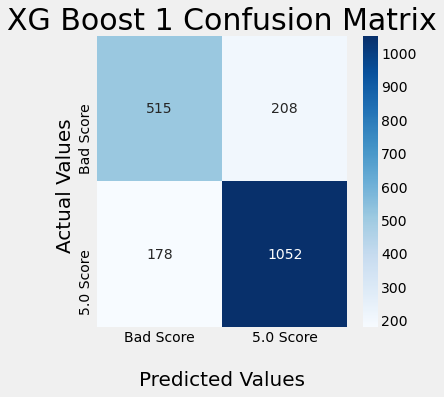

In [83]:
xg1_matrix = confusion_matrix(y_test, xg1_y_pred)

fig, ax = plt.subplots(figsize=(5,5))

ax = sns.heatmap(xg1_matrix, annot=True, cmap='Blues', fmt='d')

ax.set_title('XG Boost 1 Confusion Matrix', fontsize = 30);
ax.set_xlabel('\nPredicted Values',fontsize = 20)
ax.set_ylabel('Actual Values ', fontsize=20);

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Bad Score','5.0 Score'])
ax.yaxis.set_ticklabels(['Bad Score','5.0 Score'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### GridSearch

In [84]:
boost_param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

### <u>XGBoost 2</u>

In [85]:
xg2 = XGBClassifier(random_state=23)

grid_clf = GridSearchCV(xg2, boost_param_grid, scoring='precision', cv=3, n_jobs=1)
grid_clf.fit(X_train_resampled, y_train_resampled)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

Grid Search found the following optimal parameters: 
learning_rate: 0.2
max_depth: 6
min_child_weight: 1
n_estimators: 100
subsample: 0.7


In [86]:
xg2 = XGBClassifier(learning_rate= 0.2, max_depth=6, min_child_weight=1,
                                n_estimators=100, subsample=0.7, random_state=23)
xg2.fit(X_train_resampled, y_train_resampled)
xg2_y_pred = xg2.predict(X_test)
get_metrics(xg2, xg2_y_pred)

Precision is :84.59696727853152
F1 Score is :85.38058799838905
ROC AUC is :0.8
Cross Validation Score is :0.803


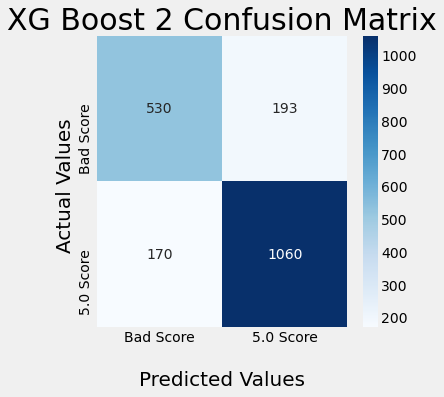

In [87]:
xg2_matrix = confusion_matrix(y_test, xg2_y_pred)

fig, ax = plt.subplots(figsize=(5,5))

ax = sns.heatmap(xg2_matrix, annot=True, cmap='Blues', fmt='d')

ax.set_title('XG Boost 2 Confusion Matrix', fontsize = 30);
ax.set_xlabel('\nPredicted Values',fontsize = 20)
ax.set_ylabel('Actual Values ', fontsize=20);

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Bad Score','5.0 Score'])
ax.yaxis.set_ticklabels(['Bad Score','5.0 Score'])

## Display the visualization of the Confusion Matrix.
plt.show()

## <b>Model Selection = XG Boost 2<b>

In [88]:
#baseline metrics
get_metrics(dt1, dt1_y_pred)

Precision is :83.38954468802699
F1 Score is :81.87086092715231
ROC AUC is :0.77
Cross Validation Score is :0.78


In [89]:
#get_metrics(xg2, xg2_y_pred)
get_metrics(rf2_clf, rf2_y_pred)

Precision is :85.19417475728154
F1 Score is :68.35443037974683
ROC AUC is :0.7
Cross Validation Score is :0.736


In [90]:
get_metrics(xg2, xg2_y_pred)

Precision is :84.59696727853152
F1 Score is :85.38058799838905
ROC AUC is :0.8
Cross Validation Score is :0.803


### Model Evaluation:
- <b> Precision: </b> This Model correctly picks whether a rental will have an overall AirBnb rating between 4.8-5.0, 85% of the time.
    - This is over 35% better than random guessing.
    - The Final Model is also a slight improvement over the baseline model. (about 2% better)
- <b>F1 Score: </b> The Final Model's F1 Score is also high. The F1 Score indicates that Precision is reasonably balanced with Recall, so I don't need to worry about this being an unbalanced and un-usable model.
- <b> ROC AUC Score: </b> Shows the True Positive Rate vs. the False Postive Rate. This model meets my goal of havnig a AUC score of at least .80.
- <b> Cross Validation Score: </b> This model does reasonably well on data that it was not trained on. It didn't have the best Cross Validation Score out of my models, but it was close enough.

### Final Model Confusion Matrix

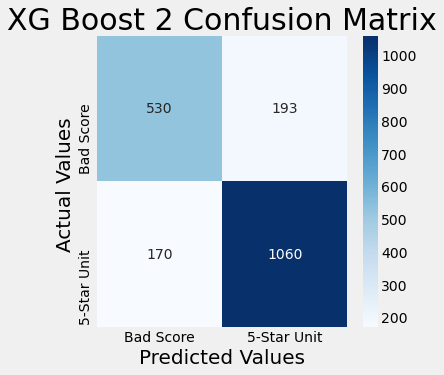

In [329]:
xg2_matrix = confusion_matrix(y_test, xg2_y_pred)

fig, ax = plt.subplots(figsize=(5,5))

ax = sns.heatmap(xg2_matrix, annot=True, cmap='Blues', fmt='d')

ax.set_title('XG Boost 2 Confusion Matrix', fontsize = 30);
ax.set_xlabel('Predicted Values',fontsize = 20)
ax.set_ylabel('Actual Values ', fontsize=20);

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Bad Score','5-Star Unit'])
ax.yaxis.set_ticklabels(['Bad Score','5-Star Unit'])

## Display the visualization of the Confusion Matrix.
plt.show()

### How to use This Model going forward:
- OPM can take the data from new clients and run the model to determine whether they are performing at 5-Star level or not.
- If they are, they should be able to obtain Superhost status and OPM can focus on helping them <b> maintain </b> everything that they are doing right.
- If they are not a 5-Star rental unit, OPM can give them advice and help get them to 5-Star status.

Caveats: 
- No model is perfect, and this one certainly isn't.
- That said, it can be reliably trusted as only 193 records from the test set of 1,913 were incorrectly labeled as being 5-Star Units when they were, in fact, not.
-- This is 10% of the dataset. So you can reasonably say that 9 out of 10 times, the prediction is correct.

## <b>Feature Importance:</b>
- Now that we have determined that the model is reasonably reliable and acceptable to use for predicting whether or not an AirBnb unit is 5-Star or not, we will use the model to tell us which features have the largest impact on making that classification.

In [94]:
feature_names = list(X)
xg2_importance = xg2.feature_importances_

In [95]:
feature_importance_df = pd.DataFrame(xg2_importance, feature_names)
feature_importance_df= feature_importance_df.reset_index()
feature_importance_df.rename(columns={'index': 'Feature', 0: 'Importance'}, inplace=True)
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
feature_importance_df

Feature  Importance
0                     accuracy_5_True    0.250566
12                     superhost_True    0.243806
4                        value_5_True    0.061394
1                  cleanliness_5_True    0.060954
5                communication_5_True    0.046475
11              host_listings_5-_True    0.045373
2                      checkin_5_True    0.039174
13             host_response_100_True    0.034302
3                     location_5_True    0.034289
9               instant_bookable_True    0.034270
6           room_type_Entire home/apt    0.033271
8             bookings_above_avg_True    0.029712
14  host_response_time_within an hour    0.029076
10                   capacity_5+_True    0.028894
7                    bedrooms_2+_True    0.028446

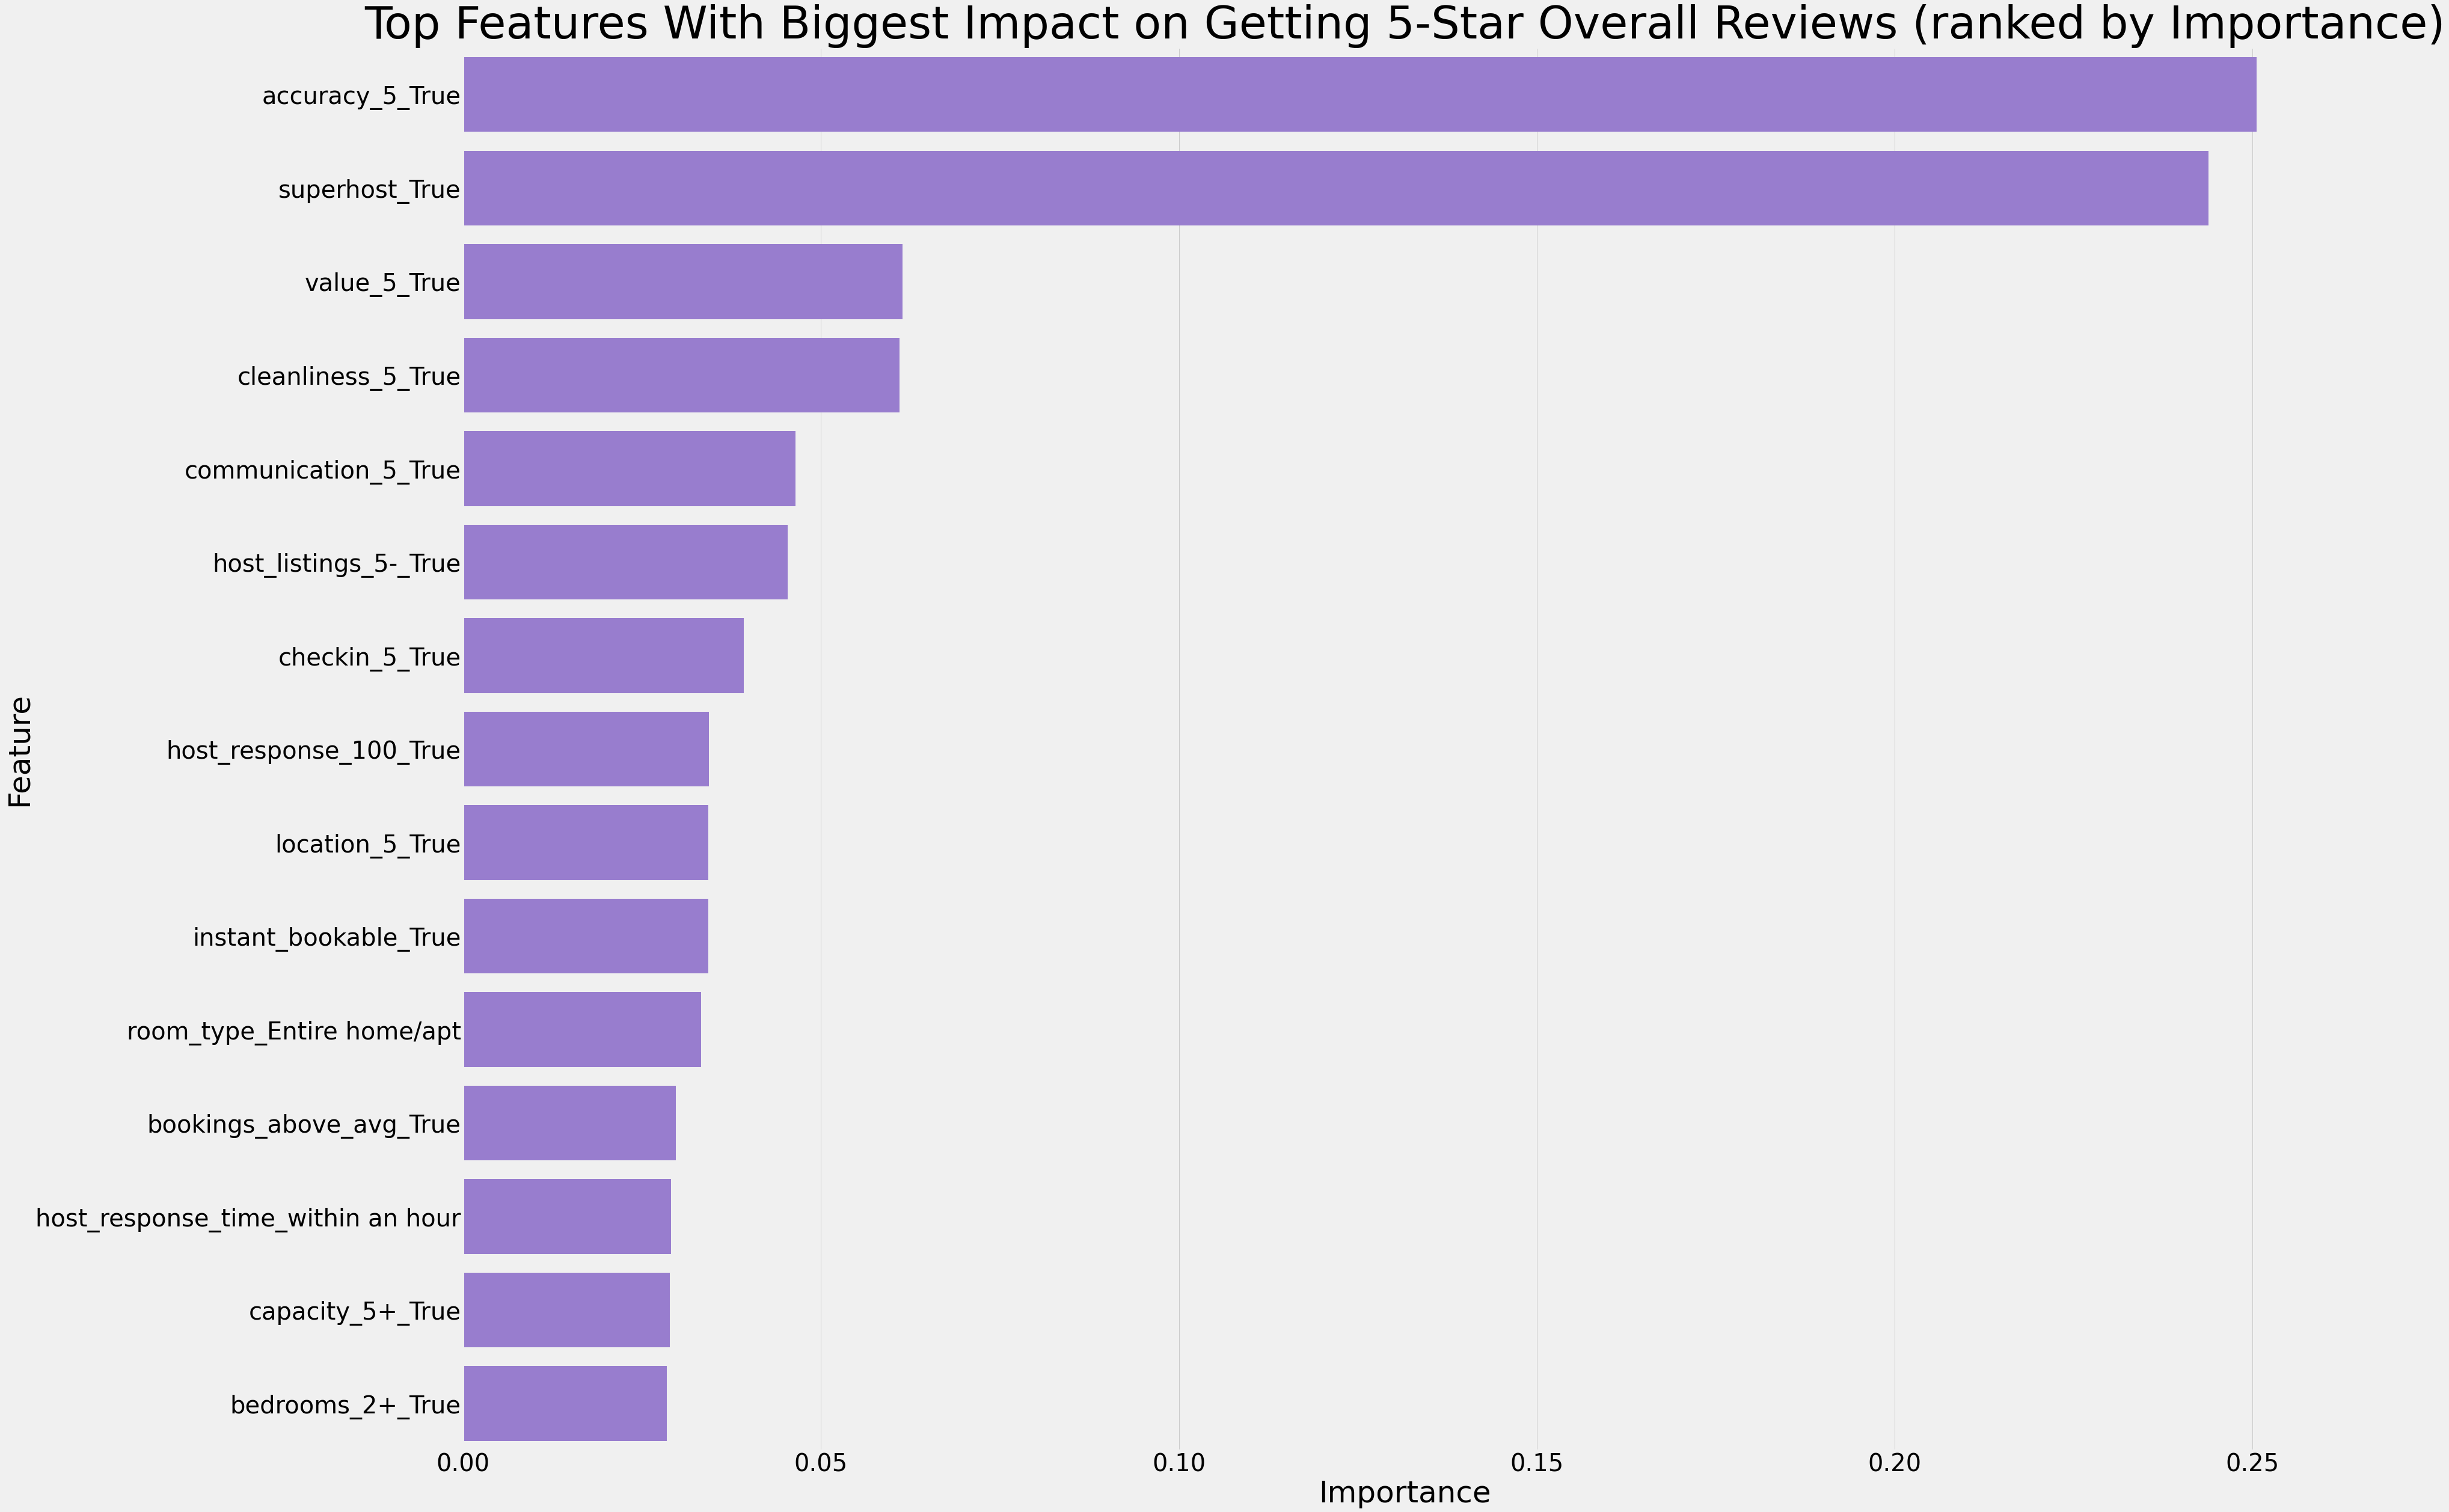

In [97]:
# plot feature importance
fig, ax = plt.subplots(figsize=(50,40))
p = sns.barplot(data=feature_importance_df, x='Importance', y='Feature', color ='mediumpurple' );
p.set_xlabel("Importance", fontsize = 50)

p.set_ylabel("Feature", fontsize = 50)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

p.set_title("Top Features With Biggest Impact on Getting 5-Star Overall Reviews (ranked by Importance)", fontsize = 75)
plt.figsize=(30,20) 

plt.show();

### Analysis: 
- <b> Most Important:</b> The most important features by far are Accuracy and SuperHost status. They are 4x more important than the next most important features, so these are the two features with the most significant effect on being a 5-star unit.
- <b>Second Level of Importance:</b> The next two features are also really close together, and are Value and Cleanliness.


### <b>Features with Little Impact on Target</b>:
- All of the included features have some impact on achieving 5-Star status. But we can see that Capacity, # of bedrooms, room type, etc have the least impact.

### Review Metric DF (or Feature Analysis DF)

In [99]:
#review_metrics = balanced_df.copy()
review_metrics = df.copy()

In [100]:
review_metrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7810 entries, 0 to 10933
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           7810 non-null   float64
 1   review_scores_rating            7810 non-null   float64
 2   review_scores_accuracy          7810 non-null   float64
 3   review_scores_cleanliness       7810 non-null   float64
 4   review_scores_checkin           7810 non-null   float64
 5   review_scores_communication     7810 non-null   float64
 6   review_scores_location          7810 non-null   float64
 7   review_scores_value             7810 non-null   float64
 8   accommodates                    7810 non-null   int64  
 9   bedrooms                        7810 non-null   float64
 10  beds                            7810 non-null   float64
 11  instant_bookable                7810 non-null   bool   
 12  property_type                   7

In [101]:
review_metrics.drop(['review_scores_rating', 'review_scores_cleanliness', 'review_scores_value',
                    'review_scores_accuracy', 'review_scores_communication', 'review_scores_location',
                    'review_scores_checkin', 'accommodates', 'price', 'calculated_host_listings_count',
                    'availability_30', 'availability_90', 'availability_365', 'host_response_rate',
                    'host_id', 'bedrooms', 'beds'], axis=1, inplace=True)

In [102]:
review_metrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7810 entries, 0 to 10933
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   instant_bookable      7810 non-null   bool   
 1   property_type         7810 non-null   object 
 2   room_type             7810 non-null   object 
 3   amenities             7810 non-null   object 
 4   host_response_time    7810 non-null   object 
 5   host_is_superhost     7810 non-null   object 
 6   host_listings_5-      7810 non-null   bool   
 7   capacity_5+           7810 non-null   bool   
 8   bedrooms_2+           7810 non-null   bool   
 9   bookings_above_avg    7810 non-null   bool   
 10  availability_30_rate  7810 non-null   float64
 11  host_response_100     7810 non-null   bool   
 12  superhost             7810 non-null   bool   
 13  5_star                7810 non-null   bool   
 14  accuracy_5            7810 non-null   bool   
 15  cleanliness_5       

In [103]:
review_metrics.drop([ 
    'host_is_superhost', 'host_response_time',
                     'amenities', 'room_type', 'property_type'], axis=1, inplace=True)

In [105]:
def plot_stats(df):
    
    fig, ax = plt.subplots(figsize=(100,20))
    p = sns.barplot(data=df.head, x='Metric', y='delta', color ='seagreen' );
    #p.set_ylabel("Percentage of 5 Star Rentals", fontsize = 50)

    p.set_xlabel("Feature", fontsize = 50)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=40)

    #ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

    p.set_title("Difference Between Features ", fontsize = 50)
    plt.figsize=(30,20) 

    return plt.show();

In [106]:
#pd.set_option("display.precision", 6)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Average Metrics for Comparison

### Median Availability Rate = 23.3%

In [225]:
review_metrics['availability_30_rate'].describe()

count   7810.000
mean       0.319
std        0.308
min        0.000
25%        0.033
50%        0.233
75%        0.533
max        1.000
Name: availability_30_rate, dtype: float64

## Median Availability (in Days) = 7 Days

In [226]:
df['availability_30'].describe()

count   7810.000
mean       9.562
std        9.253
min        0.000
25%        1.000
50%        7.000
75%       16.000
max       30.000
Name: availability_30, dtype: float64

### Avg Review Metric Scores

In [229]:
df.median().head(8)

price                         197.000
review_scores_rating            4.860
review_scores_accuracy          4.900
review_scores_cleanliness       4.860
review_scores_checkin           4.960
review_scores_communication     4.950
review_scores_location          4.930
review_scores_value             4.790
dtype: float64

In [230]:
df.mean().head(8)

price                         294.638
review_scores_rating            4.761
review_scores_accuracy          4.799
review_scores_cleanliness       4.759
review_scores_checkin           4.868
review_scores_communication     4.854
review_scores_location          4.844
review_scores_value             4.698
dtype: float64

### Median Number of Listings = 3.
- 75% have 13 or less.

In [293]:
df['calculated_host_listings_count'].describe()

count   7810.000
mean      18.090
std       40.840
min        1.000
25%        1.000
50%        3.000
75%       13.000
max      219.000
Name: calculated_host_listings_count, dtype: float64

In [231]:
df.median()

price                                 197.000
review_scores_rating                    4.860
review_scores_accuracy                  4.900
review_scores_cleanliness               4.860
review_scores_checkin                   4.960
review_scores_communication             4.950
review_scores_location                  4.930
review_scores_value                     4.790
accommodates                            4.000
bedrooms                                2.000
beds                                    2.000
instant_bookable                        0.000
availability_365                      173.000
availability_30                         7.000
availability_90                        44.000
host_id                          65162890.500
calculated_host_listings_count          3.000
host_response_rate                    100.000
host_listings_5-                        1.000
capacity_5+                             0.000
bedrooms_2+                             1.000
bookings_above_avg                

In [401]:
df.mean()

price                                  294.638
review_scores_rating                     4.761
review_scores_accuracy                   4.799
review_scores_cleanliness                4.759
review_scores_checkin                    4.868
review_scores_communication              4.854
review_scores_location                   4.844
review_scores_value                      4.698
accommodates                             5.115
bedrooms                                 1.972
beds                                     2.802
instant_bookable                         0.473
availability_365                       180.258
availability_30                          9.562
availability_90                         43.420
host_id                          117692426.916
calculated_host_listings_count          18.090
host_response_rate                      96.147
host_listings_5-                         0.630
capacity_5+                              0.473
bedrooms_2+                              0.542
bookings_abov

## <b>Analysis of Top Features</b>

### Function get_stats( )

In [104]:
def get_stats(df):
    
    df_transposed = df.transpose()
    df_transposed = df_transposed.reset_index()
    df_transposed.rename(columns={'index': 'Metric'}, inplace=True)
    stats_df = df_transposed
    delta = stats_df.apply(lambda x: x[1.0] - x[0.0], axis=1)
    stats_df['delta'] = delta
         
    return stats_df. sort_values('delta', ascending=False)

### Target Analysis:  <b> 5 Star Units </b>

In [399]:
five_star_metrics = review_metrics.groupby('5_star').mean()
five_star_stats = get_stats(five_star_metrics)
five_star_stats.sort_values(True, ascending=False)


5_star                Metric  False  True  delta
6          host_response_100  0.640 0.787  0.146
1           host_listings_5-  0.473 0.722  0.249
7                  superhost  0.260 0.660  0.400
4         bookings_above_avg  0.440 0.570  0.130
3                bedrooms_2+  0.570 0.525 -0.045
14                price_200+  0.487 0.496  0.010
13           communication_5  0.154 0.474  0.320
10                 checkin_5  0.169 0.455  0.286
2                capacity_5+  0.517 0.447 -0.069
0           instant_bookable  0.568 0.418 -0.150
11                location_5  0.180 0.377  0.198
8                 accuracy_5  0.070 0.367  0.297
9              cleanliness_5  0.076 0.327  0.251
5       availability_30_rate  0.373 0.287 -0.086
12                   value_5  0.033 0.231  0.198

### Analysis: 
- 5 Star Overall units score much higher in review metrics. This makes sense because they should have to score high in all of them to get a high overall score (even though it is a seperate metric in terms of AirBnb).
- Noteably, they are significantly less likely to use instant book, or have more than 5 listings

5 Star Units stats:
- 79% have perfect response rate.
- 72% have less than 5 listings
- 66% are Superhosts
- 57% of them have more bookings than the overall overage rate.

While they perform better than other units on review metrics, there is still much room for improvement.
- Notably only 23% have a 5.0 Value rating.

### <b>Key Metric: Availability </b>
- The more your units are booked, the better!

#### <b> bookings above average </b>

In [400]:
booked_metrics = review_metrics.groupby('bookings_above_avg').mean()
booked_stats = get_stats(booked_metrics)
booked_stats.sort_values(True, ascending=False)

bookings_above_avg                Metric  False  True  delta
5                      host_response_100  0.696 0.766  0.071
1                       host_listings_5-  0.545 0.708  0.163
7                                 5_star  0.566 0.688  0.122
6                              superhost  0.462 0.558  0.095
3                            bedrooms_2+  0.548 0.536 -0.013
14                            price_200+  0.539 0.450 -0.089
2                            capacity_5+  0.510 0.439 -0.071
0                       instant_bookable  0.536 0.416 -0.120
13                       communication_5  0.343 0.367  0.024
10                             checkin_5  0.342 0.356  0.014
11                            location_5  0.306 0.303 -0.003
8                             accuracy_5  0.259 0.254 -0.005
9                          cleanliness_5  0.245 0.225 -0.020
12                               value_5  0.159 0.157 -0.002
4                   availability_30_rate  0.587 0.073 -0.514

#### Analysis:
- 5_star units perform slighty better than Superhosts. (69% vs. 56%)
- Units that book above average are 12% LESS likely to use Instant Booking.
-- only 42% use Instant Book.
- Availabilty rate is just 7.3% vs 58.7 for other units!
-- this is a 16% improvement over the median availability rate!

#### Lineplot: 5-Star vs Availabilty

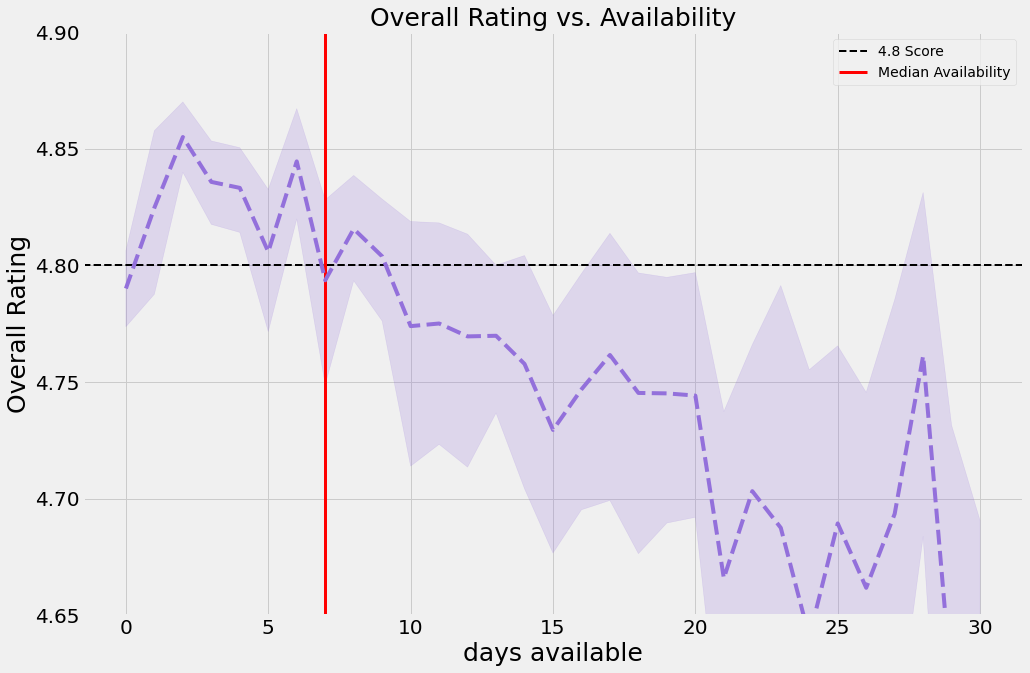

In [386]:
fig, ax = plt.subplots(figsize=(15,10))

ax.axhline(4.8, ls='--', color='black', linewidth=(2), label='4.8 Score')
ax.axvline(7 , color='red', linewidth=(3), label='Median Availability')
#ax.invert_xaxis()


p = sns.lineplot(data=host_listings, x='availability_30', y='review_scores_rating',
                 ls = '--', color ='mediumpurple' );



#p.set_xlim(0,20)
p.set_ylim(4.65, 4.9)

p.set_ylabel("Overall Rating", fontsize = 25)

p.set_xlabel("days available", fontsize = 25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Overall Rating vs. Availability", fontsize = 25)
plt.figsize=(30,20) 

plt.show();

#### LinePlot: Superhost vs. Availability

In [269]:
superhost_df = host_listings[host_listings['superhost'] == True]
not_superhost_df = host_listings[host_listings['superhost'] == False]

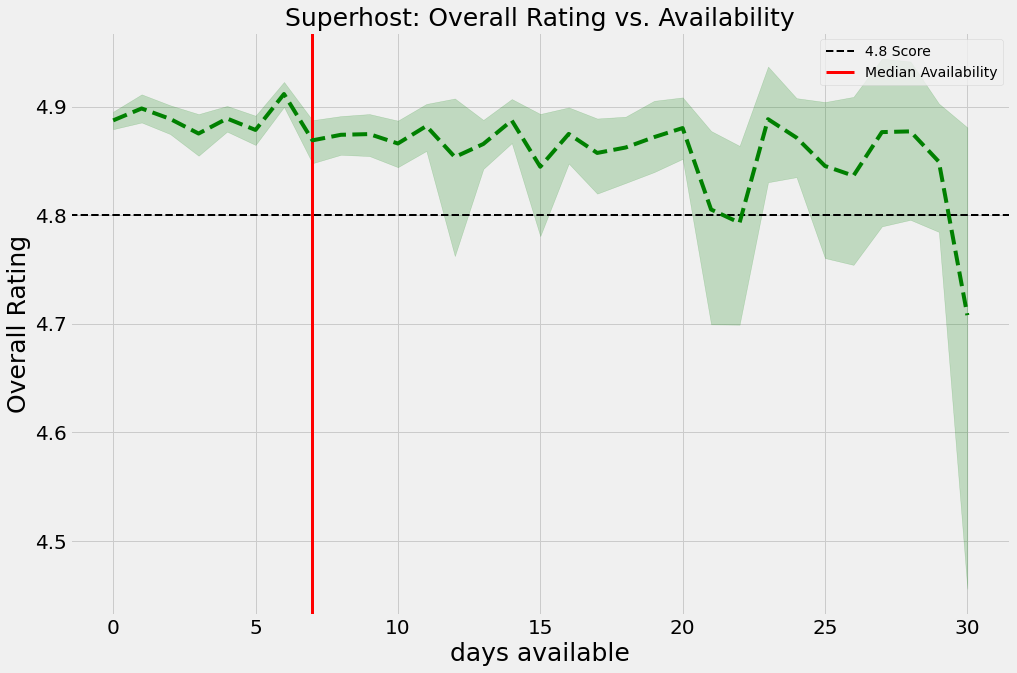

In [388]:
fig, ax = plt.subplots(figsize=(15,10))

ax.axhline(4.8, ls='--', color='black', linewidth=(2), label='4.8 Score')
ax.axvline(7 , color='red', linewidth=(3), label='Median Availability')
#ax.invert_xaxis()


p = sns.lineplot(data=superhost_df, x='availability_30', y='review_scores_rating',
                 ls = '--', color ='green' );



#p.set_xlim(0,20)
#p.set_ylim(4.65, 4.9)

p.set_ylabel("Overall Rating", fontsize = 25)

p.set_xlabel("days available", fontsize = 25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Superhost: Overall Rating vs. Availability", fontsize = 25)
plt.figsize=(30,20) 

plt.show();

In [390]:
superhost_df['availability_30'].describe()

count   3700.000
mean       7.721
std        7.880
min        0.000
25%        1.000
50%        5.000
75%       12.000
max       30.000
Name: availability_30, dtype: float64

In [391]:
not_superhost_df['availability_30'].describe()

count   3338.000
mean      10.190
std        9.774
min        0.000
25%        0.000
50%        8.000
75%       18.000
max       30.000
Name: availability_30, dtype: float64

#### Analysis:
- Superhosts have a median of 5 days available (unbooked) each month.
- This is 28.6% better than average.
- Non-Superhosts have a median of 8 days available (unbooked) each month.
- 14% worse than average

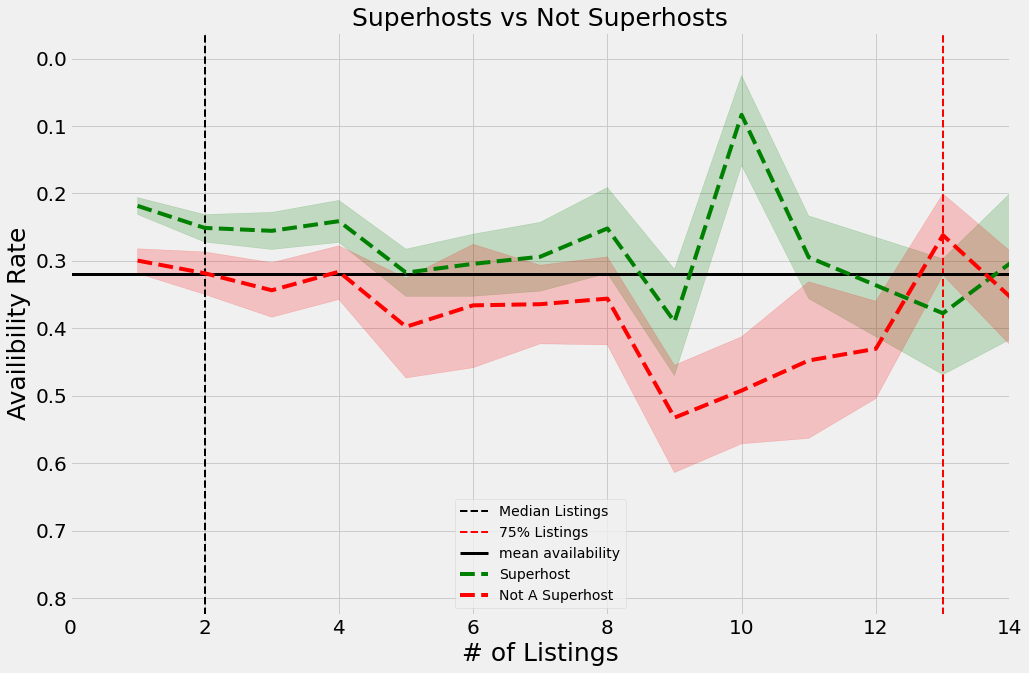

In [402]:
fig, ax = plt.subplots(figsize=(15,10))

ax.axvline(2, ls='--', color='black', linewidth=(2), label='Median Listings')
ax.axvline(13, ls='--', color='red', linewidth=(2), label='75% Listings')
#ax.axvline(7 , color='red', linewidth=(3), label='Median Availability')
ax.axhline(.319, color='black', linewidth=(3), label='mean availability')
ax.invert_yaxis()


p = sns.lineplot(data=superhost_df,x='calculated_host_listings_count', y='availability_30_rate',
                 ls = '--', color ='green', label = 'Superhost' );

p = sns.lineplot(data=not_superhost_df,x='calculated_host_listings_count', y='availability_30_rate',
                 ls = '--', color ='red', label = 'Not A Superhost' );



p.set_xlim(0,14)
#p.set_ylim(4.65, 4.9)

p.set_ylabel("Availibility Rate", fontsize = 25)

p.set_xlabel("# of Listings", fontsize = 25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Superhosts vs Not Superhosts", fontsize = 25)
plt.figsize=(30,20) 

plt.show();

#### lineplot: 5-star vs not 5-star

In [297]:
five_star_df = host_listings[host_listings['5_star'] == True]
not_five_star_df = host_listings[host_listings['5_star'] == False]

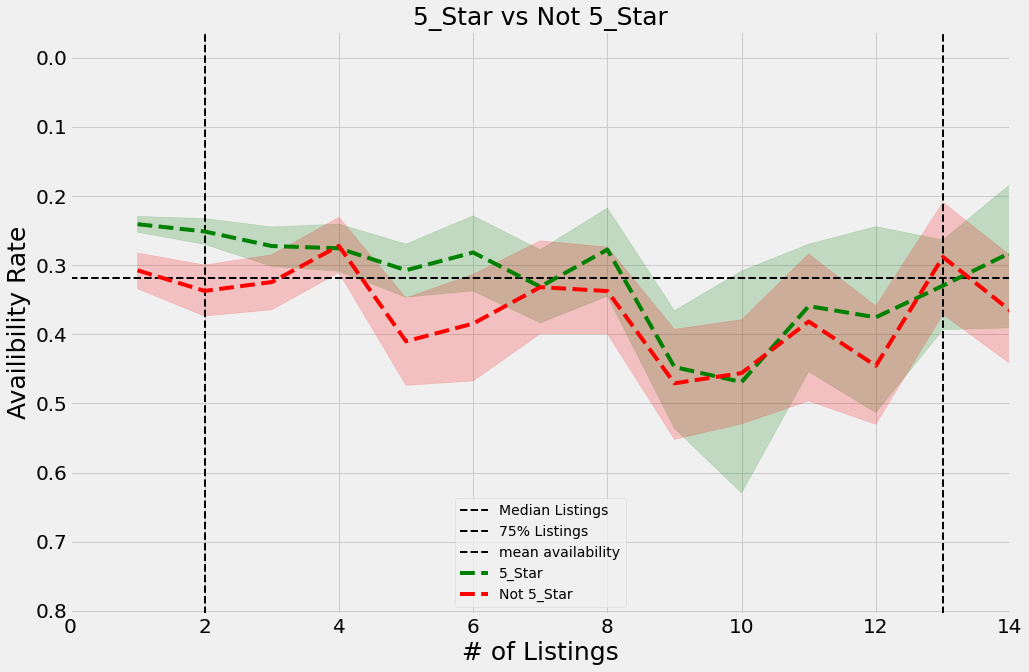

In [315]:
fig, ax = plt.subplots(figsize=(15,10))

ax.axvline(2, ls='--', color='black', linewidth=(2), label='Median Listings')
ax.axvline(13, ls='--', color='black', linewidth=(2), label='75% Listings')
#ax.axvline(7 , color='red', linewidth=(3), label='Median Availability')
ax.axhline(.319, ls='--', color='black', linewidth=(2), label='mean availability')
ax.invert_yaxis()


p = sns.lineplot(data=five_star_df,x='calculated_host_listings_count', y='availability_30_rate',
                 ls = '--', color ='green', label = '5_Star' );

p = sns.lineplot(data=not_five_star_df,x='calculated_host_listings_count', y='availability_30_rate',
                 ls = '--', color ='red', label = 'Not 5_Star' );



p.set_xlim(0,14)
#p.set_ylim(4.65, 4.9)

p.set_ylabel("Availibility Rate", fontsize = 25)

p.set_xlabel("# of Listings", fontsize = 25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "5_Star vs Not 5_Star", fontsize = 25)
plt.figsize=(30,20) 

plt.show();

## <b>THE PROBLEM:  Overall Rating vs. Number of Listings & Number of Days Booked</b>

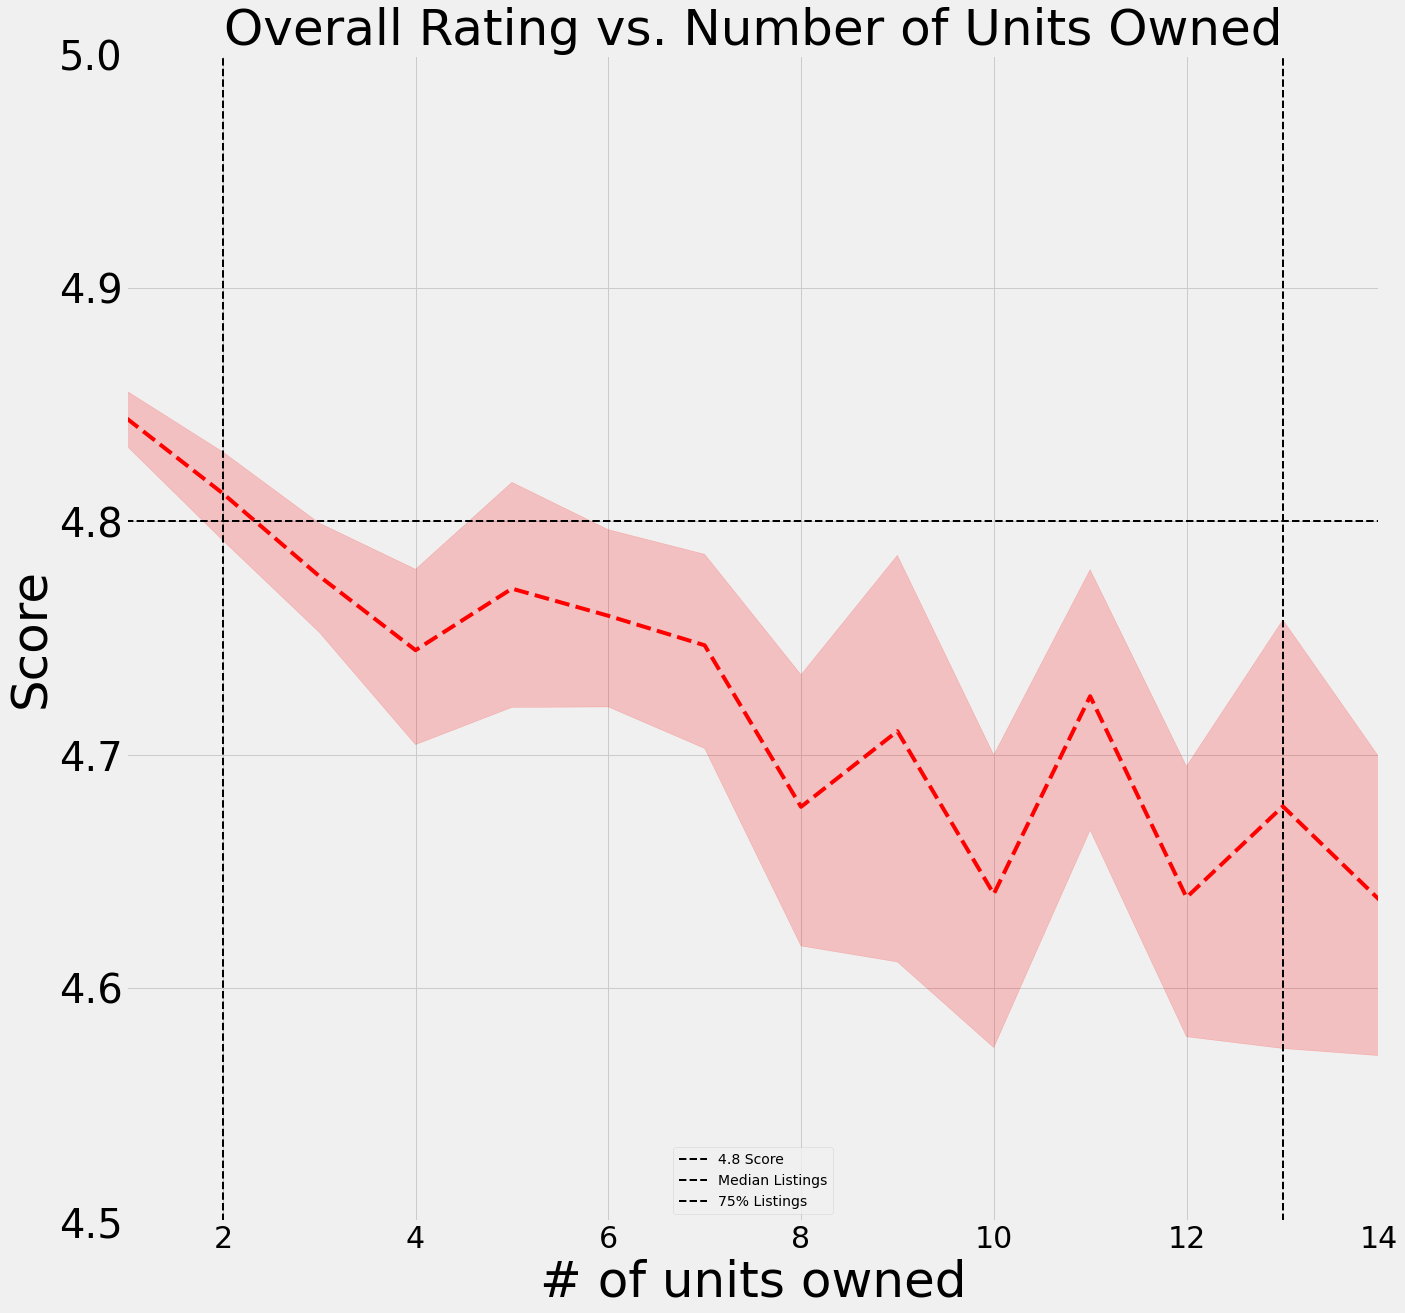

In [324]:
fig, ax = plt.subplots(figsize=(20,20))

ax.axhline(4.8, ls='--', color='black', linewidth=(2), label='4.8 Score')
ax.axvline(2, ls='--', color='black', linewidth=(2), label='Median Listings')
ax.axvline(13, ls='--', color='black', linewidth=(2), label='75% Listings')

p = sns.lineplot(data=host_listings, x='calculated_host_listings_count', y='review_scores_rating',
                 ls = '--', color ='red' );


p.set_xlim(1,14)
p.set_ylim(4.5, 5)


p.set_ylabel("Score", fontsize = 50)

p.set_xlabel("# of units owned", fontsize = 50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=40)

#ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Overall Rating vs. Number of Units Owned", fontsize = 50)
plt.figsize=(30,20) 

plt.show();

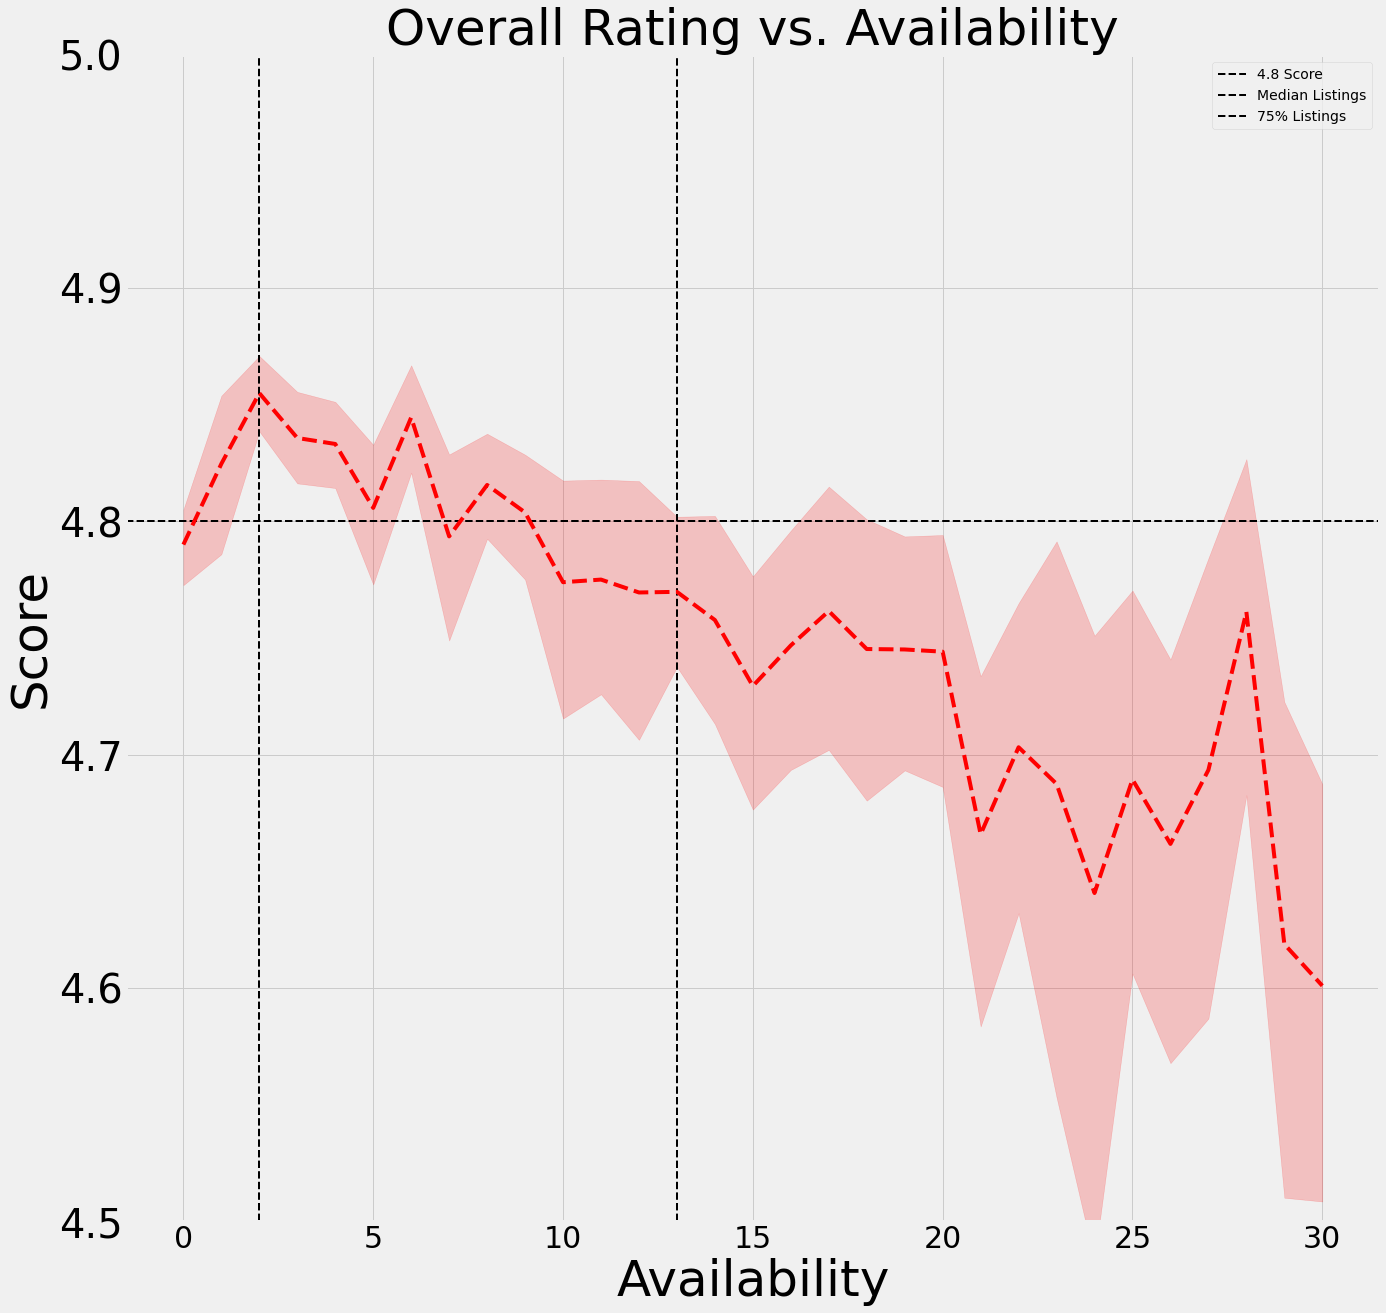

In [485]:
fig, ax = plt.subplots(figsize=(20,20))

ax.axhline(4.8, ls='--', color='black', linewidth=(2), label='4.8 Score')
ax.axvline(2, ls='--', color='black', linewidth=(2), label='Median Listings')
ax.axvline(13, ls='--', color='black', linewidth=(2), label='75% Listings')

p = sns.lineplot(data=host_listings, x='availability_30', y='review_scores_rating',
                 ls = '--', color ='red' );


#p.set_xlim(1,14)
p.set_ylim(4.5, 5)


p.set_ylabel("Score", fontsize = 50)

p.set_xlabel("Availability", fontsize = 50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=40)

#ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Overall Rating vs. Availability", fontsize = 50)
plt.figsize=(30,20) 

plt.show();

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))

ax.axhline(4.8, ls='--', color='black', linewidth=(2), label='4.8 Score')
ax.axvline(2, ls='--', color='black', linewidth=(2), label='Median Listings')
ax.axvline(13, ls='--', color='black', linewidth=(2), label='75% Listings')

p = sns.lineplot(data=host_listings, x='availability_30', y='review_scores_rating',
                 ls = '--', color ='red' );


#p.set_xlim(1,14)
p.set_ylim(4.5, 5)


p.set_ylabel("Score", fontsize = 50)

p.set_xlabel("Availability", fontsize = 50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=40)

#ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Overall Rating vs. Bookings", fontsize = 50)
plt.figsize=(30,20) 

plt.show();

### Solutions

In [325]:
five_star_df.describe()

price  review_scores_rating  review_scores_accuracy  \
count  4549.000              4549.000                4549.000   
mean    277.347                 4.929                   4.928   
std     339.488                 0.067                   0.109   
min      10.000                 4.800                   3.000   
25%     116.000                 4.870                   4.890   
50%     185.000                 4.940                   4.950   
75%     325.000                 5.000                   5.000   
max   10000.000                 5.000                   5.000   

       review_scores_cleanliness  review_scores_checkin  \
count                   4549.000               4549.000   
mean                       4.893                  4.950   
std                        0.159                  0.129   
min                        2.000                  1.000   
25%                        4.850                  4.940   
50%                        4.930                  4.980   
75%                        5.000                  5.000   
max                        5.000                  5.080   

       review_scores_communication  review_scores_location  \
count                     4549.000                4549.000   
mean                         4.953                   4.913   
std                          0.103                   0.137   
min                          2.000                   3.000   
25%                          4.940                   4.880   
50%                          4.990                   4.950   
75%                          5.000                   5.000   
max                          5.000                   5.000   

       review_scores_value  accommodates  bedrooms     beds  availability_365  \
count             4549.000      4549.000  4549.000 4549.000          4549.000   
mean                 4.849         4.762     1.885    2.607           159.719   
std                  0.155         3.059     1.148    1.931           112.461   
min                  3.000         1.000     1.000    1.000             0.000   
25%                  4.790         2.000     1.000    1.000            61.000   
50%                  4.870         4.000     1.000    2.000           144.000   
75%                  4.960         6.000     2.000    3.000           258.000   
max                  5.000        16.000    11.000   22.000           365.000   

       availability_30  availability_90       host_id  \
count         4549.000         4549.000      4549.000   
mean             8.055           39.069 113977425.195   
std              8.486           27.496 125123078.043   
min              0.000            0.000      8435.000   
25%              0.000           16.000  17179248.000   
50%              5.000           38.000  59154364.000   
75%             13.000           61.000 171228853.000   
max             30.000           90.000 449582519.000   

       calculated_host_listings_count  host_response_rate  \
count                        4549.000            4549.000   
mean                            5.288              96.957   
std                             8.240              12.497   
min                             1.000               0.000   
25%                             1.000             100.000   
50%                             2.000             100.000   
75%                             5.000             100.000   
max                            48.000             100.000   

       availability_30_rate  
count              4549.000  
mean                  0.268  
std                   0.283  
min                   0.000  
25%                   0.000  
50%                   0.167  
75%                   0.433  
max                   1.000

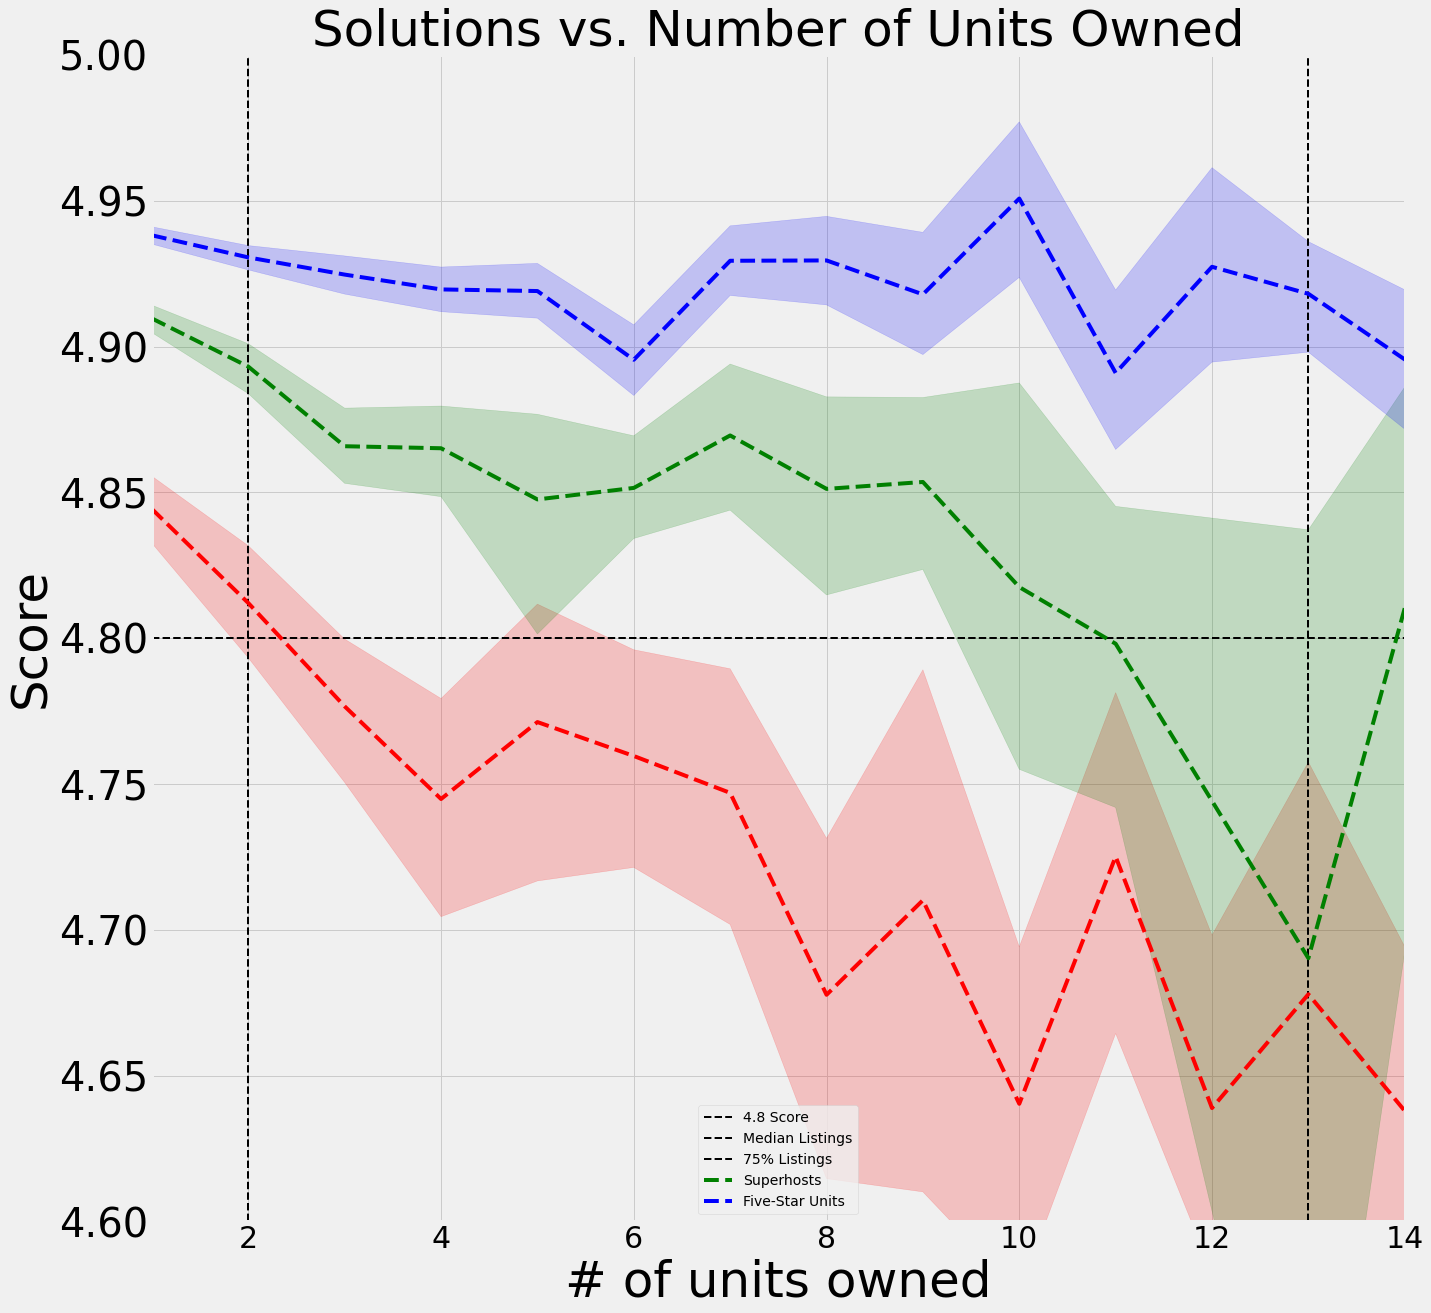

In [403]:
fig, ax = plt.subplots(figsize=(20,20))

ax.axhline(4.8, ls='--', color='black', linewidth=(2), label='4.8 Score')
ax.axvline(2, ls='--', color='black', linewidth=(2), label='Median Listings')
ax.axvline(13, ls='--', color='black', linewidth=(2), label='75% Listings')

p = sns.lineplot(data=host_listings, x='calculated_host_listings_count', y='review_scores_rating',
                 ls = '--', color ='red' );

p = sns.lineplot(data=superhost_df, x='calculated_host_listings_count', y='review_scores_rating',
                 ls = '--', color ='green', label='Superhosts' );

p = sns.lineplot(data=five_star_df, x='calculated_host_listings_count', y='review_scores_rating',
                 ls = '--', color ='blue', label='Five-Star Units' );

#p = sns.lineplot(data=host_listings, x='calculated_host_listings_count', y='review_scores_accuracy',
#                 ls = '--', color ='brown' );


p.set_xlim(1,14)
p.set_ylim(4.6, 5)


p.set_ylabel("Score", fontsize = 50)

p.set_xlabel("# of units owned", fontsize = 50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=40)

#ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Solutions vs. Number of Units Owned", fontsize = 50)
plt.figsize=(30,20) 

plt.show();

### Solutions vs Availability

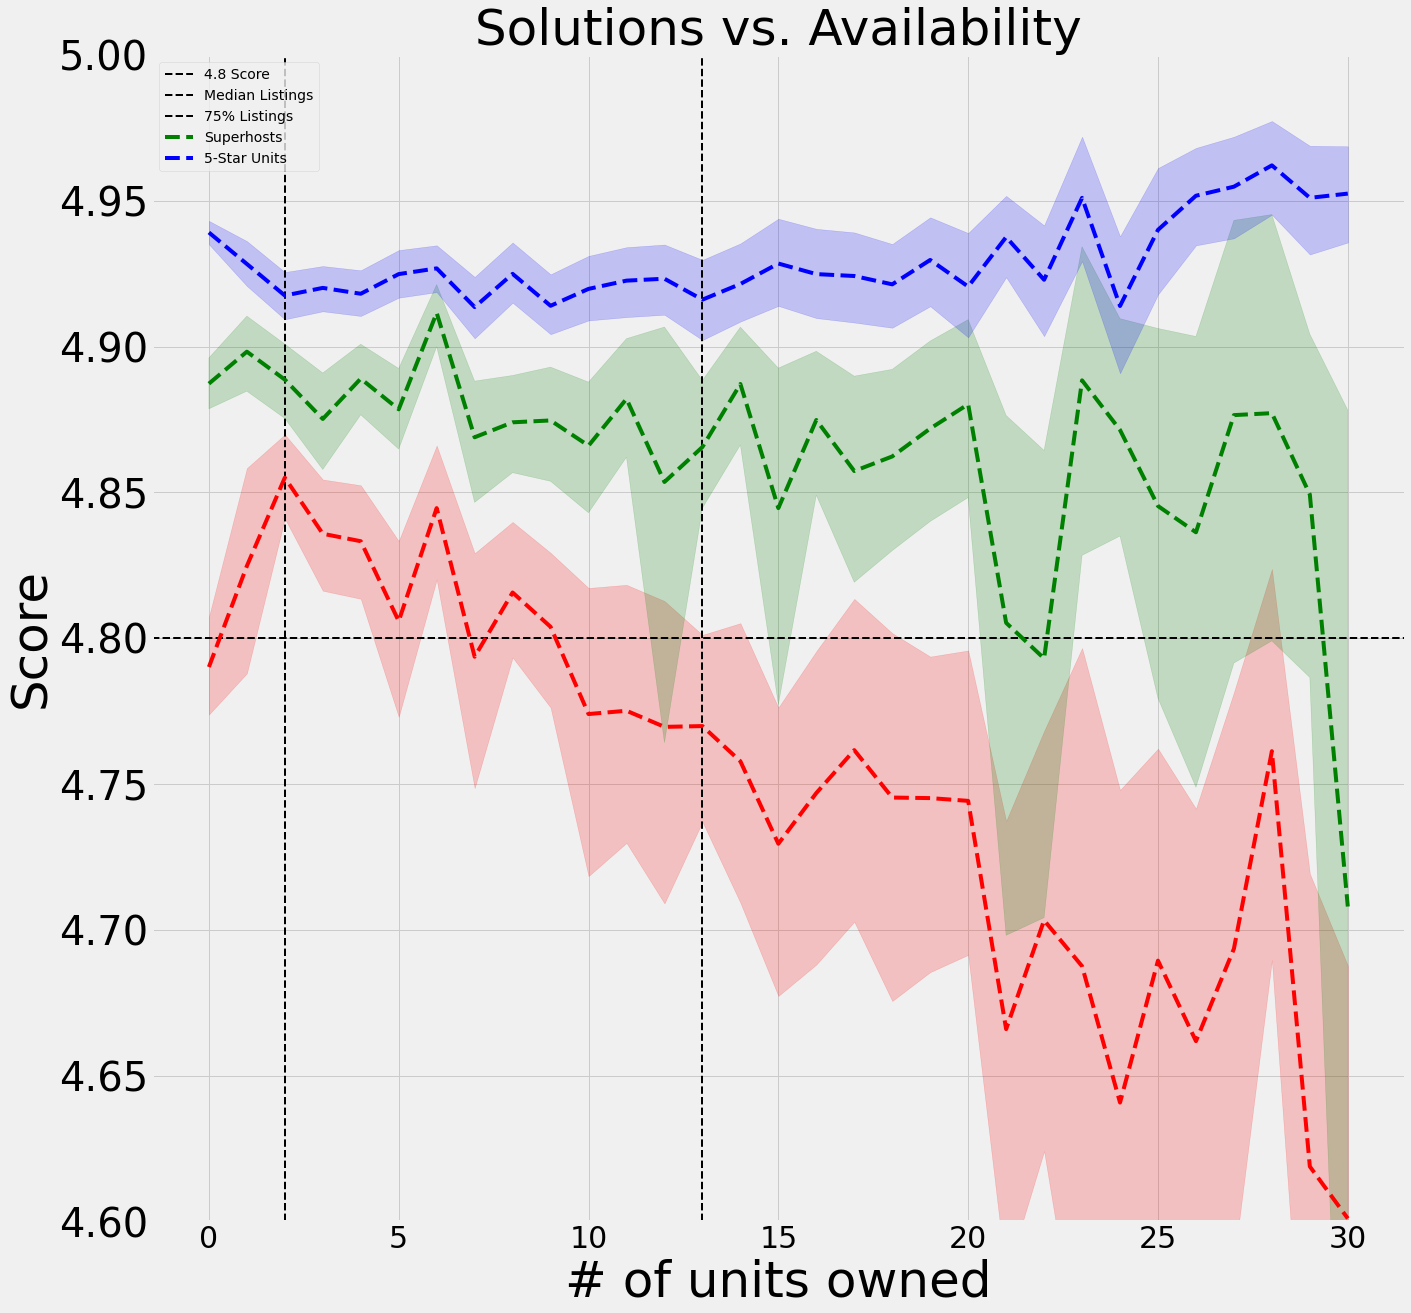

In [397]:
fig, ax = plt.subplots(figsize=(20,20))

ax.axhline(4.8, ls='--', color='black', linewidth=(2), label='4.8 Score')
ax.axvline(2, ls='--', color='black', linewidth=(2), label='Median Listings')
ax.axvline(13, ls='--', color='black', linewidth=(2), label='75% Listings')

p = sns.lineplot(data=host_listings, x='availability_30', y='review_scores_rating',
                 ls = '--', color ='red' );

p = sns.lineplot(data=superhost_df, x='availability_30', y='review_scores_rating',
                 ls = '--', color ='green', label='Superhosts' );

p = sns.lineplot(data=five_star_df, x='availability_30', y='review_scores_rating',
                 ls = '--', color ='blue', label='5-Star Units' );

#p = sns.lineplot(data=host_listings, x='calculated_host_listings_count', y='review_scores_accuracy',
#                 ls = '--', color ='brown' );


#p.set_xlim(1,14)
p.set_ylim(4.6, 5)


p.set_ylabel("Score", fontsize = 50)

p.set_xlabel("# of units owned", fontsize = 50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=40)

#ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Solutions vs. Availability", fontsize = 50)
plt.figsize=(30,20) 

plt.show();

### <b>Key Metric: Number of Units Listed </b>

In [404]:
listing_metrics = review_metrics.groupby('host_listings_5-').mean()
listing_stats = get_stats(listing_metrics)
listing_stats.sort_values(True, ascending=False)

host_listings_5-                Metric  False  True  delta
5                    host_response_100  0.560 0.834  0.274
7                               5_star  0.473 0.722  0.249
3                   bookings_above_avg  0.412 0.587  0.174
6                            superhost  0.398 0.579  0.180
2                          bedrooms_2+  0.638 0.485 -0.153
14                          price_200+  0.621 0.418 -0.203
1                          capacity_5+  0.603 0.396 -0.207
13                     communication_5  0.293 0.392  0.099
10                           checkin_5  0.296 0.380  0.085
0                     instant_bookable  0.656 0.366 -0.291
11                          location_5  0.326 0.292 -0.034
8                           accuracy_5  0.215 0.281  0.066
4                 availability_30_rate  0.398 0.272 -0.126
9                        cleanliness_5  0.212 0.247  0.035
12                             value_5  0.130 0.174  0.044

#### Analysis: Hosts who have less than 5 units listed are:
- significantly more likely to have 100% Resoonse Rate.
- significantly more likley to be a 5-Star unit.
- more likley to be a Superhost and be booked more than average.
- significantly less likely to cost $200/night`.
- significantly less likely to have capacity for more than 4 people.
- significantly less likely to use instant book feature.

## Top Features 

### <b> Top Feature #1: Accuracy </b>

In [236]:
accuracy_df = review_metrics[review_metrics['accuracy_5'] == True]

In [239]:
accuracy_df.mean()

instant_bookable       0.405
host_listings_5-       0.690
capacity_5+            0.455
bedrooms_2+            0.560
bookings_above_avg     0.517
availability_30_rate   0.333
host_response_100      0.718
superhost              0.435
5_star                 0.900
accuracy_5             1.000
cleanliness_5          0.668
checkin_5              0.806
location_5             0.715
value_5                0.531
communication_5        0.835
price_200+             0.528
dtype: float64

In [405]:
accuracy_metrics = review_metrics.groupby('accuracy_5').mean()
accuracy_stats = get_stats(accuracy_metrics)
accuracy_stats.sort_values(True, ascending=False)

accuracy_5                Metric  False  True  delta
8                         5_star  0.537 0.900  0.363
13               communication_5  0.190 0.835  0.645
10                     checkin_5  0.191 0.806  0.615
6              host_response_100  0.738 0.718 -0.019
11                    location_5  0.162 0.715  0.553
1               host_listings_5-  0.609 0.690  0.081
9                  cleanliness_5  0.084 0.668  0.584
3                    bedrooms_2+  0.535 0.560  0.024
12                       value_5  0.029 0.531  0.502
14                    price_200+  0.480 0.528  0.048
4             bookings_above_avg  0.524 0.517 -0.006
2                    capacity_5+  0.479 0.455 -0.024
7                      superhost  0.539 0.435 -0.103
0               instant_bookable  0.497 0.405 -0.092
5           availability_30_rate  0.314 0.333  0.019

In [240]:
accuracy_stats.head(6)

accuracy_5           Metric  False  True  delta
13          communication_5  0.190 0.835  0.645
10                checkin_5  0.191 0.806  0.615
9             cleanliness_5  0.084 0.668  0.584
11               location_5  0.162 0.715  0.553
12                  value_5  0.029 0.531  0.502
8                    5_star  0.537 0.900  0.363

#### Analysis: 
- This matches what I found in my research. The most important aspect of renting an AirBnb is that the listing is accurate, to ensure that Guest expectations are met.
- Nearly all units that have an accuracy score of 5 also scored high in the other 5 review metrics.
- Nearly all units that did not have an accuracy score of 5 did not score highly on others as well.
- <b>90% of units that scored 5.0 on accuracy were in our target 5-star range.</b>
- They are less likely to use the instant book feature or be a superhost, although about 40% of units with 5.0 accuracy do each.

<b>Also</b>
They are also less likely to be Superhosts, use Instant Booking, and have less than 5 listings.

### LinePlot: Accuracy vs. Availability

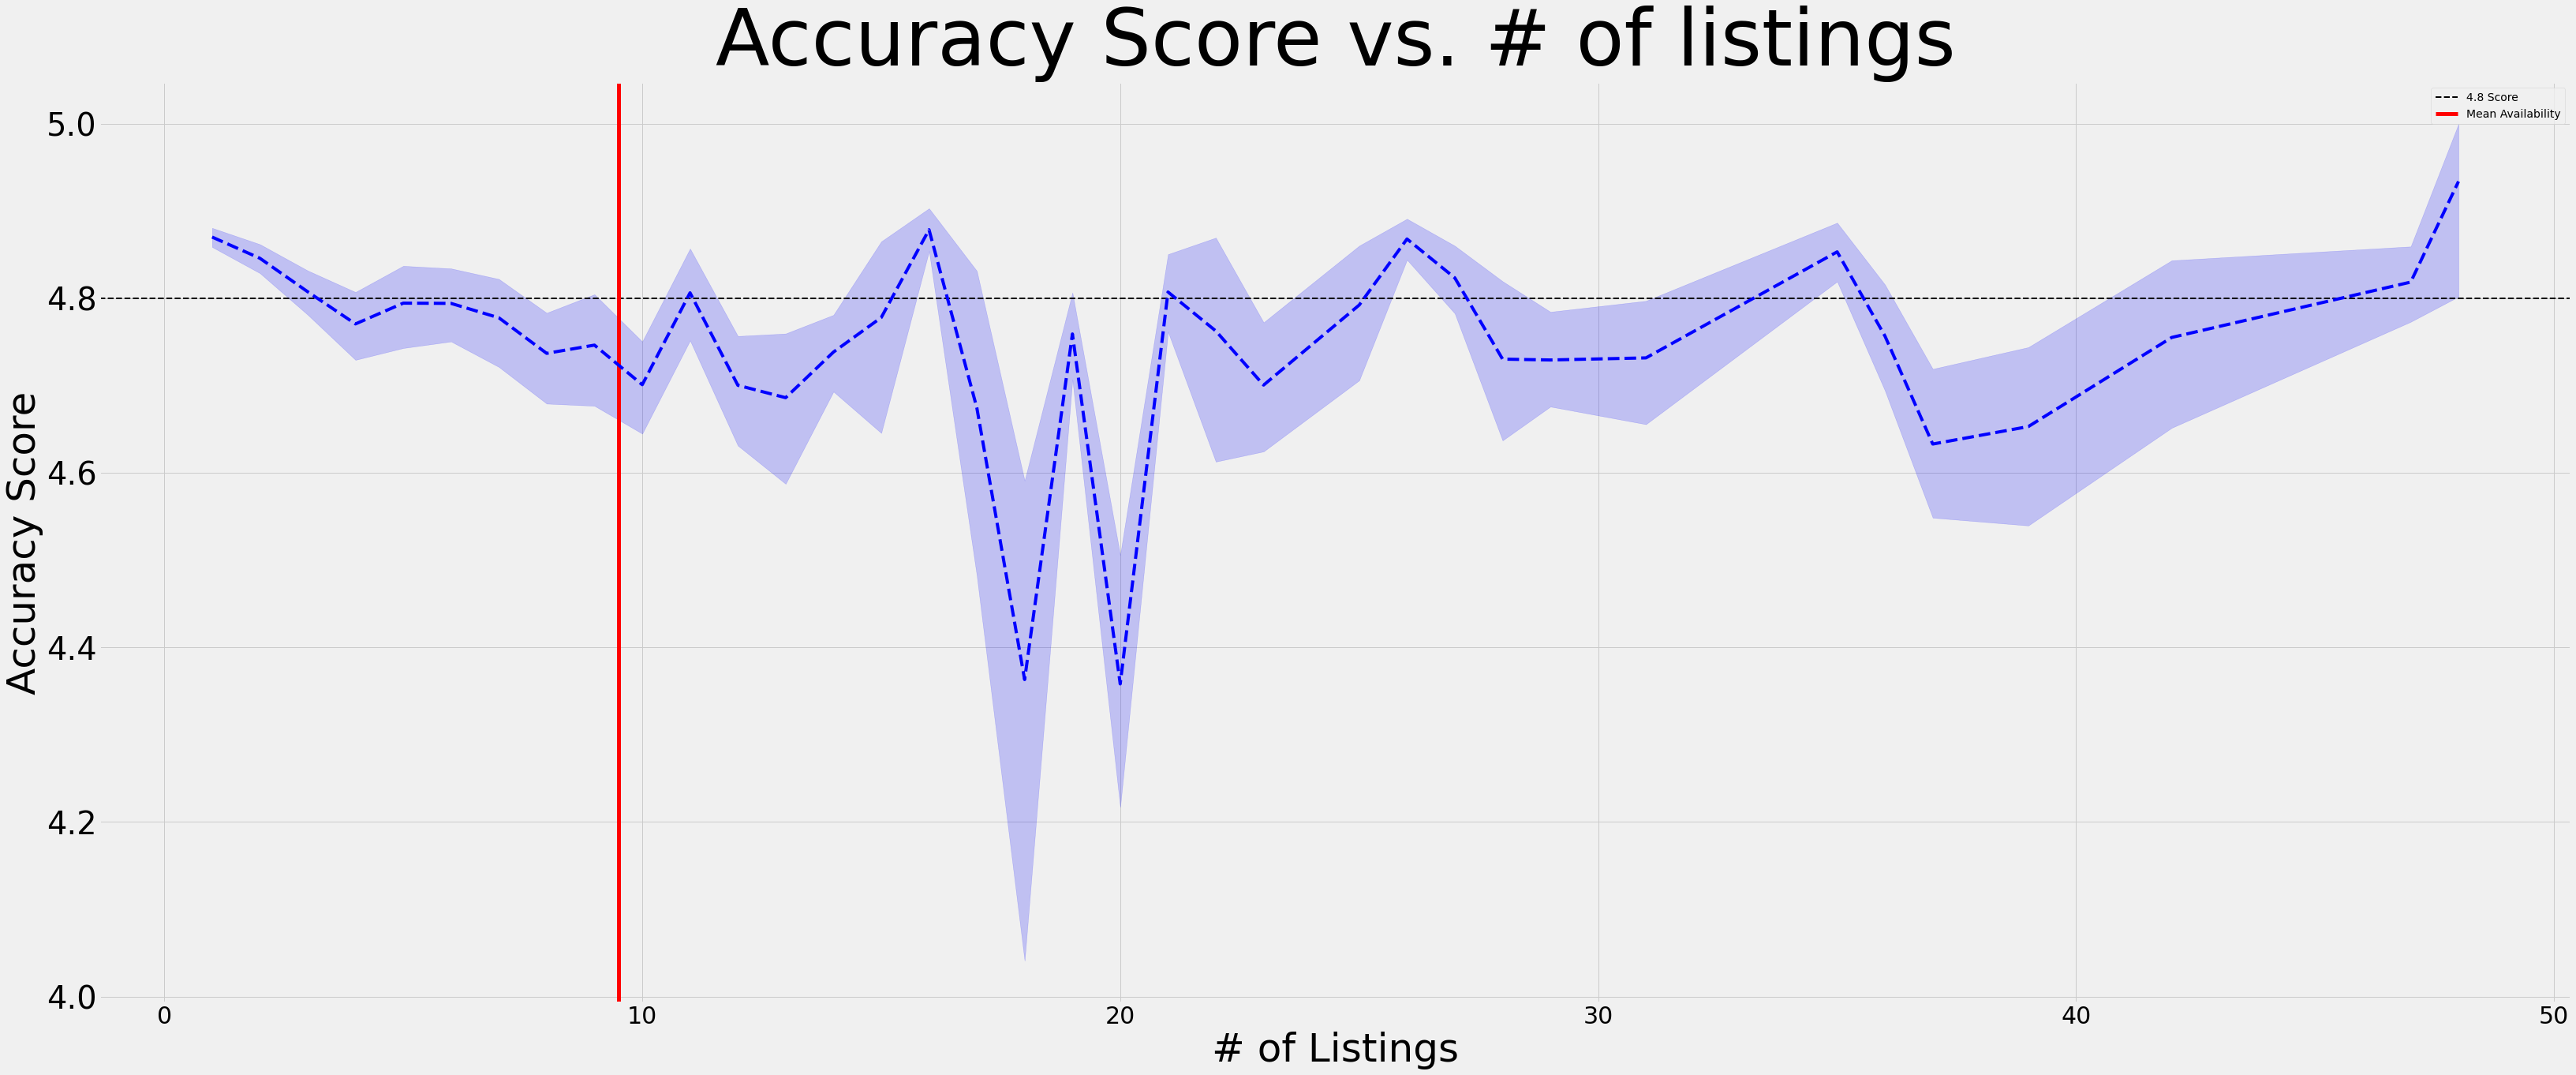

In [412]:
fig, ax = plt.subplots(figsize=(50,20))

ax.axhline(4.8, ls='--', color='black', linewidth=(2), label='4.8 Score')
ax.axvline(9.5 , color='red', linewidth=(5), label='Mean Availability')
#ax.invert_xaxis()

p = sns.lineplot(data=host_listings, x='calculated_host_listings_count', y='review_scores_accuracy',
                 ls = '--', color ='blue' );

#p = sns.lineplot(data=superhost_df, x='calculated_host_listings_count', y='review_scores_cleanliness',
#                 ls = '--', color ='green' );

#p = sns.lineplot(data=instant_bookable_df, x='calculated_host_listings_count', y='review_scores_cleanliness',
#                 ls = '--', color ='red' );


p.set_ylabel("Accuracy Score", fontsize = 50)

p.set_xlabel("# of Listings", fontsize = 50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=40)

#ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Accuracy Score vs. # of listings", fontsize = 100)
plt.figsize=(30,20) 

plt.show();

### <b>Top Feature #2: SuperHost</b>

In [406]:
superhost_metrics = review_metrics.groupby('superhost').mean()
superhost_stats = get_stats(superhost_metrics)
superhost_stats.sort_values(True, ascending=False)

superhost                Metric  False  True  delta
6             host_response_100  0.646 0.815  0.169
7                        5_star  0.438 0.812  0.373
1              host_listings_5-  0.544 0.712  0.168
4            bookings_above_avg  0.473 0.569  0.095
3                   bedrooms_2+  0.564 0.521 -0.043
14                   price_200+  0.498 0.488 -0.010
2                   capacity_5+  0.492 0.455 -0.037
0              instant_bookable  0.502 0.446 -0.056
13              communication_5  0.366 0.345 -0.020
10                    checkin_5  0.376 0.324 -0.052
5          availability_30_rate  0.354 0.285 -0.069
11                   location_5  0.372 0.240 -0.131
8                    accuracy_5  0.297 0.218 -0.079
9                 cleanliness_5  0.272 0.198 -0.074
12                      value_5  0.214 0.104 -0.109

#### Analysis: 
- <b>Superhosts have a more likely to be 5-Star Units than non-superhosts.</b>
- They also have a higher response rate than non-superhosts. Since this is a requirement of the superhost program, this isn't a surprise.
- There isn't much of a difference in the communication level of superhosts and non-superhosts.
- For most review metrics, Superhosts have a <b> lower </b> average rate than those of non-superhosts.
- Superhosts are more likely to have less than 5 listings.

## <b>New Model = Accuracy Target</b>
- Since Accuracy so important to being a 5-star unit, I have decided to rerun my models to target units with a 5.0 Accuracy Score.
- I have also dropped the 5-star unit classifier from the dataset so that I can truely isolate Accuracy apart from Overall Rating.

In [367]:
balanced_df = cleaned_df.copy()

#dropping 5_star as well as that assumed to be unknown
X = balanced_df.drop(['5_star_True', 'accuracy_5_True'], axis=1)
y = balanced_df['accuracy_5_True']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, stratify=y, random_state=23)

smote = SMOTE(random_state=23)
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 

In [333]:
#Baseline Decision Tree searching for Accuracy
dt3 = DecisionTreeClassifier(random_state=23, class_weight="balanced")
dt3.fit(X_train_resampled, y_train_resampled)
dt3_y_pred = dt3.predict(X_test)
get_metrics(dt3, dt3_y_pred)

Precision is :71.91489361702128
F1 Score is :69.61894953656025
ROC AUC is :0.79
Cross Validation Score is :0.881


In [334]:
#Refined Random Forest Looking for Accuracy
rf3_clf = RandomForestClassifier(random_state=23)


rf3_grid_search= GridSearchCV(rf3_clf, rf_param_grid, scoring = 'precision', cv=3)
rf3_grid_search.fit(X_train_resampled, y_train_resampled)

print("")
print(f"Random Forest  Optimal Parameters: {rf3_grid_search.best_params_}")


Random Forest  Optimal Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [335]:
#Refined Random Forest Looking for Accuracy
rf3_clf = RandomForestClassifier(criterion= 'entropy', max_depth= None, min_samples_leaf= 3,
                                min_samples_split= 5, n_estimators= 100, random_state=23,
                                class_weight='balanced')
rf3_clf.fit(X_train_resampled, y_train_resampled)
rf3_y_pred = rf3_clf.predict(X_test)
get_metrics(rf3_clf, rf3_y_pred)

Precision is :72.15189873417721
F1 Score is :75.71157495256166
ROC AUC is :0.85
Cross Validation Score is :0.893


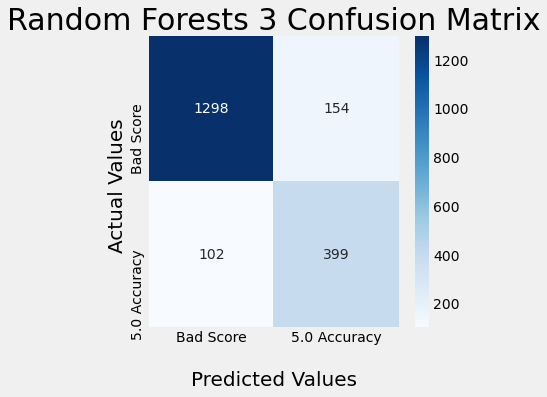

In [339]:
rf3_matrix = confusion_matrix(y_test, rf3_y_pred)

fig, ax = plt.subplots(figsize=(5,5))

ax = sns.heatmap(rf3_matrix, annot=True, cmap='Blues', fmt='d')

ax.set_title('Random Forests 3 Confusion Matrix', fontsize = 30);
ax.set_xlabel('\nPredicted Values',fontsize = 20)
ax.set_ylabel('Actual Values ', fontsize=20);

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Bad Score','5.0 Accuracy'])
ax.yaxis.set_ticklabels(['Bad Score','5.0 Accuracy'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [336]:
#Refined XGBoost Looking for Accuracy
xg3 = XGBClassifier(random_state=23)

grid_clf = GridSearchCV(xg3, boost_param_grid, scoring='precision', cv=3, n_jobs=1)
grid_clf.fit(X_train_resampled, y_train_resampled)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

Grid Search found the following optimal parameters: 
learning_rate: 0.2
max_depth: 6
min_child_weight: 1
n_estimators: 100
subsample: 0.7


In [337]:
xg3 = XGBClassifier(learning_rate= 0.2, max_depth=6, min_child_weight=1,
                                n_estimators=100, subsample=0.7, random_state=23)
xg3.fit(X_train_resampled, y_train_resampled)
xg3_y_pred = xg3.predict(X_test)
get_metrics(xg3, xg3_y_pred)

Precision is :73.76725838264299
F1 Score is :74.20634920634922
ROC AUC is :0.83
Cross Validation Score is :0.902


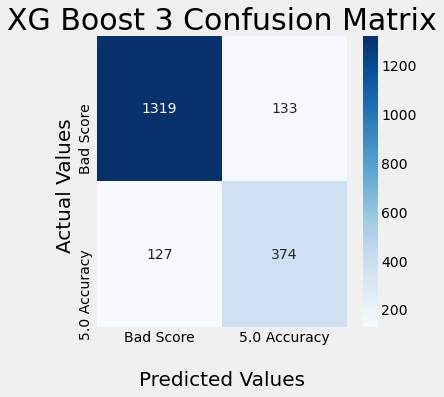

In [340]:
xg3_matrix = confusion_matrix(y_test, xg3_y_pred)

fig, ax = plt.subplots(figsize=(5,5))

ax = sns.heatmap(xg3_matrix, annot=True, cmap='Blues', fmt='d')

ax.set_title('XG Boost 3 Confusion Matrix', fontsize = 30);
ax.set_xlabel('\nPredicted Values',fontsize = 20)
ax.set_ylabel('Actual Values ', fontsize=20);

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Bad Score','5.0 Accuracy'])
ax.yaxis.set_ticklabels(['Bad Score','5.0 Accuracy'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Model Selection = Random Forests 3

In [368]:
feature_names = list(X)
rf3_importance = rf3_clf.feature_importances_

In [370]:
feature_importance_df = pd.DataFrame(rf3_importance, feature_names)
feature_importance_df= feature_importance_df.reset_index()
feature_importance_df.rename(columns={'index': 'Feature', 0: 'Importance'}, inplace=True)
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
feature_importance_df

Feature  Importance
4                communication_5_True       0.246
1                      checkin_5_True       0.162
0                  cleanliness_5_True       0.147
3                        value_5_True       0.135
2                     location_5_True       0.116
11                     superhost_True       0.031
7             bookings_above_avg_True       0.025
10              host_listings_5-_True       0.025
8               instant_bookable_True       0.023
12             host_response_100_True       0.021
13  host_response_time_within an hour       0.020
9                    capacity_5+_True       0.018
6                    bedrooms_2+_True       0.015
5           room_type_Entire home/apt       0.014

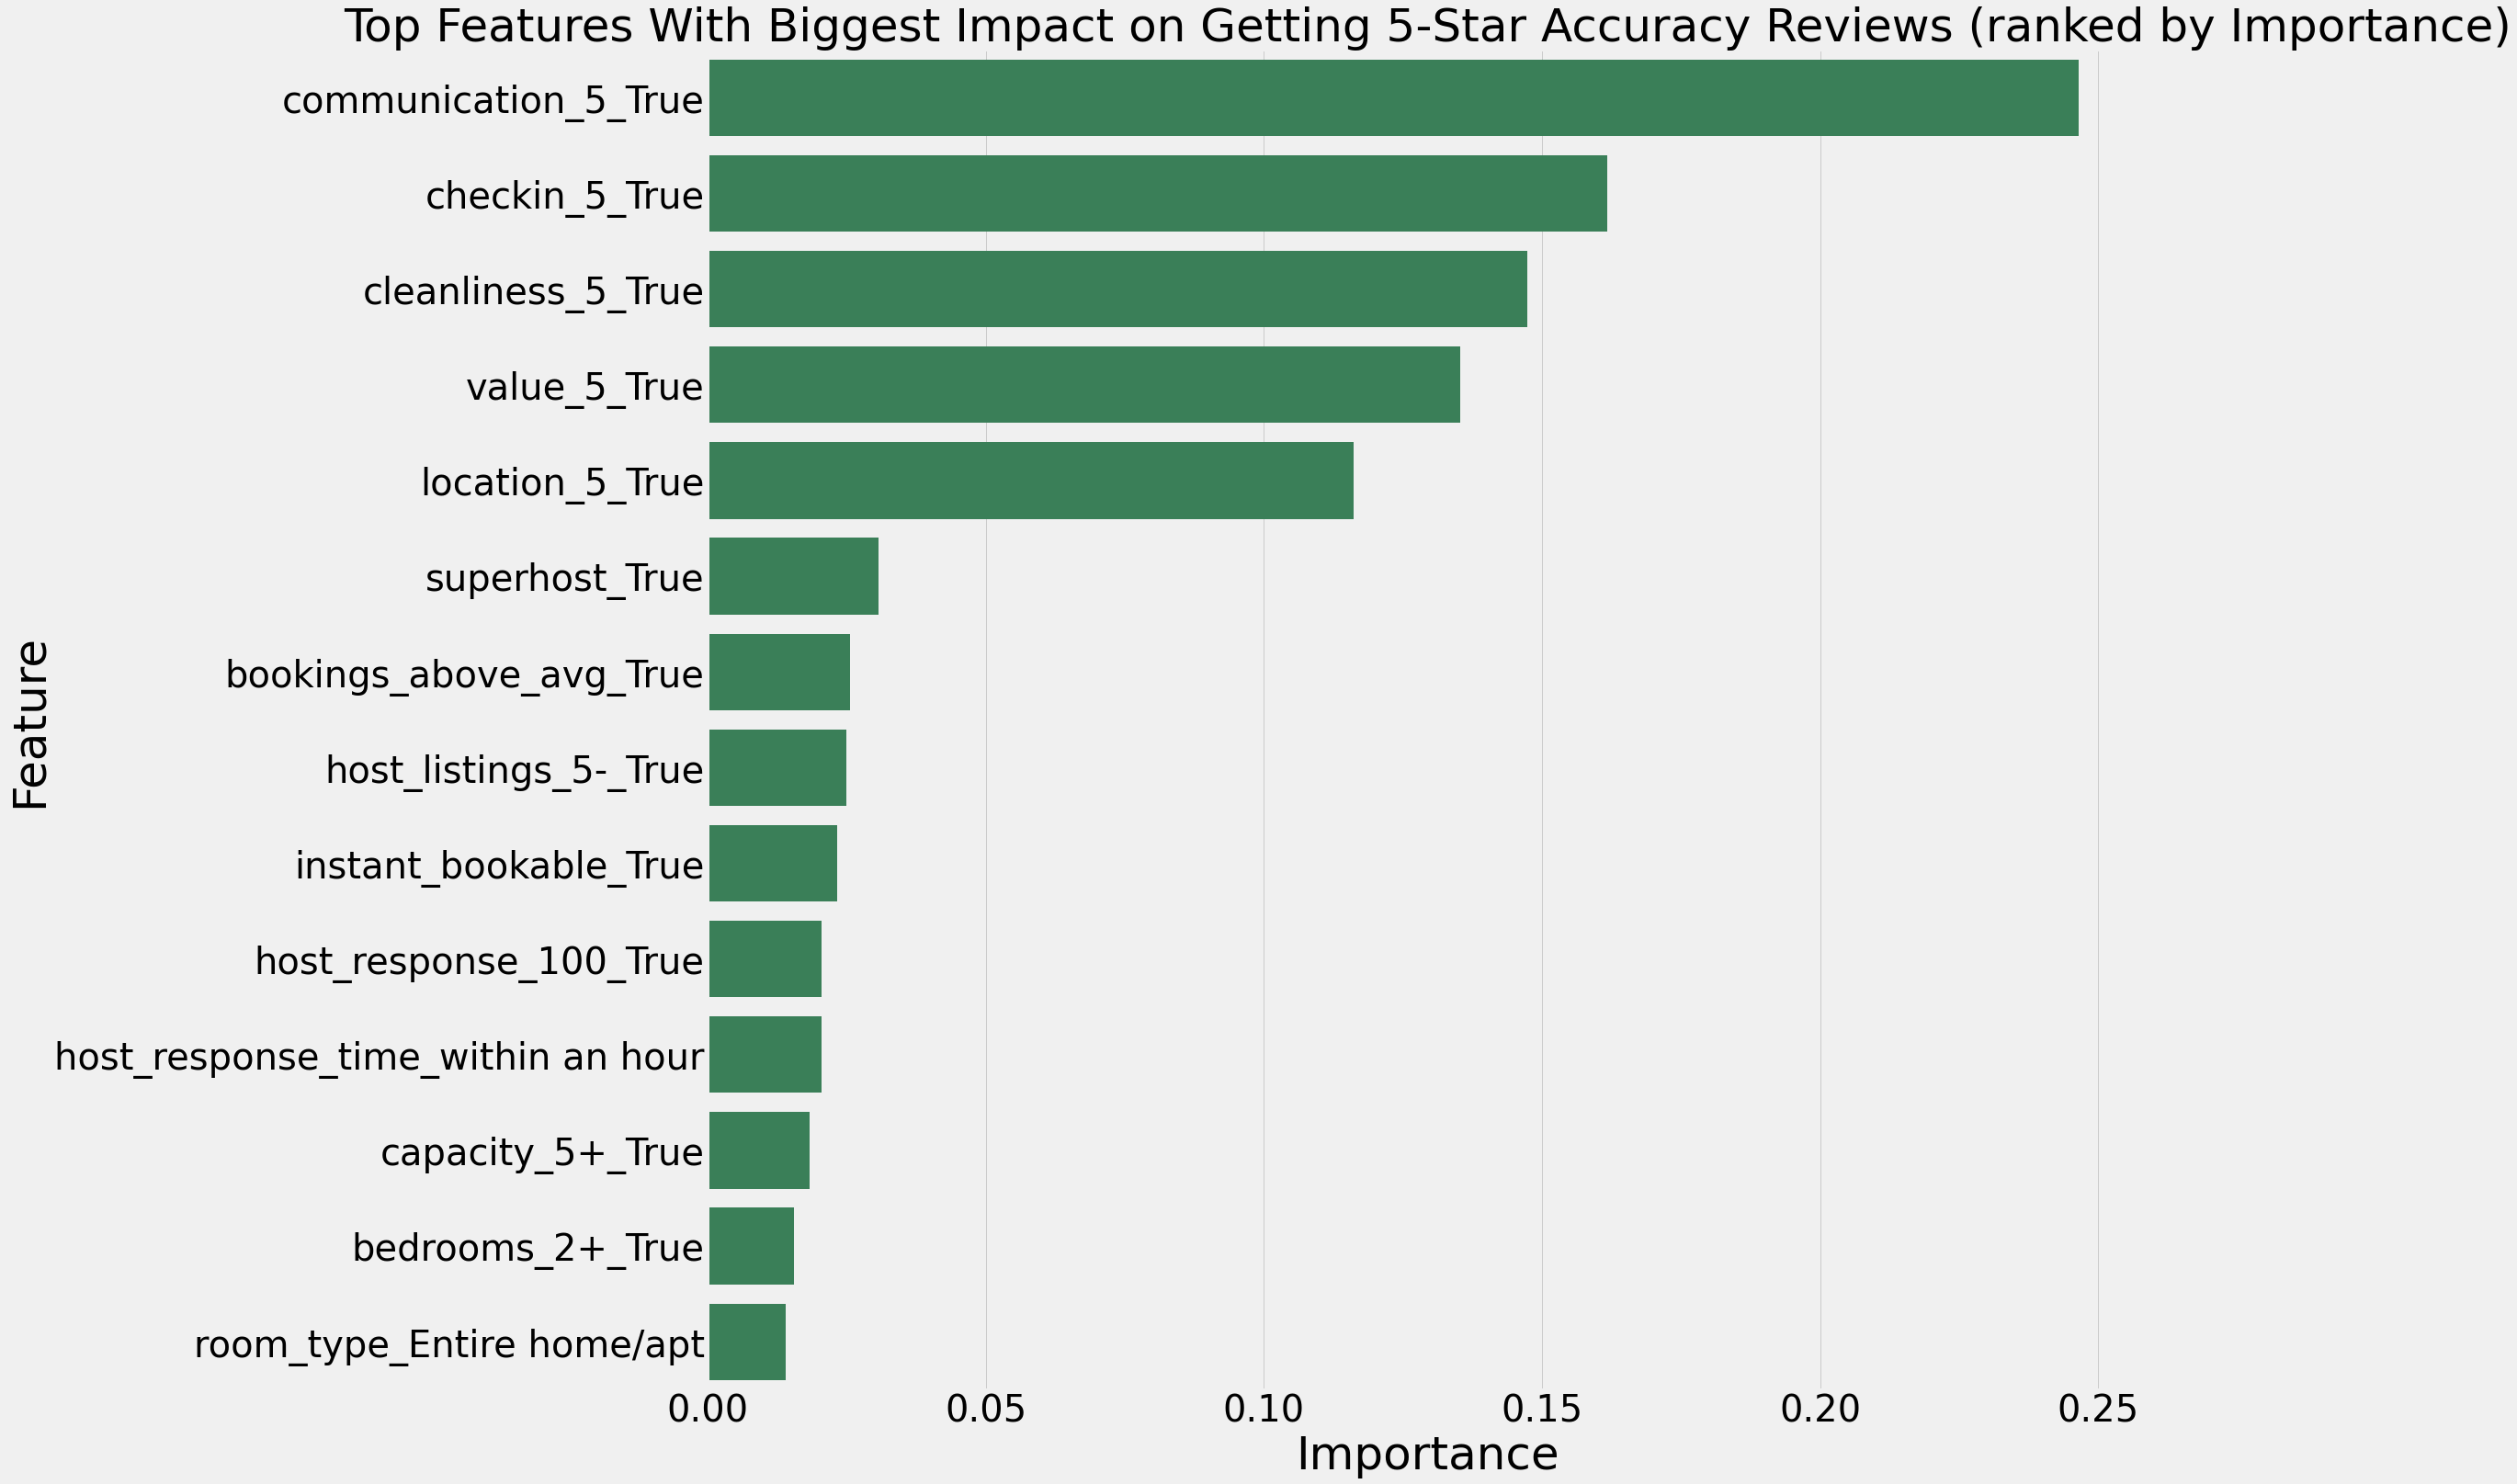

In [372]:
# plot feature importance
fig, ax = plt.subplots(figsize=(25,25))
p = sns.barplot(data=feature_importance_df, x='Importance', y='Feature', color ='seagreen' );
p.set_xlabel("Importance", fontsize = 50)

p.set_ylabel("Feature", fontsize = 50)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

p.set_title("Top Features With Biggest Impact on Getting 5-Star Accuracy Reviews (ranked by Importance)",
            fontsize = 50)
plt.figsize=(30,20) 

plt.show();

### <b>Top Feature #3: Communication <b>

In [407]:
communication_metrics = review_metrics.groupby('communication_5').mean()
communication_stats = get_stats(communication_metrics)
communication_stats.sort_values(True, ascending=False)

communication_5                Metric  False  True  delta
8                              5_star  0.514 0.840  0.326
11                          checkin_5  0.122 0.761  0.639
6                   host_response_100  0.724 0.749  0.025
1                    host_listings_5-  0.594 0.695  0.101
12                         location_5  0.135 0.611  0.476
9                          accuracy_5  0.066 0.603  0.537
3                         bedrooms_2+  0.530 0.562  0.032
4                  bookings_above_avg  0.513 0.539  0.026
10                      cleanliness_5  0.071 0.530  0.458
14                         price_200+  0.480 0.516  0.037
7                           superhost  0.520 0.498 -0.022
2                         capacity_5+  0.476 0.467 -0.009
0                    instant_bookable  0.511 0.405 -0.106
13                            value_5  0.023 0.403  0.380
5                availability_30_rate  0.318 0.319  0.001

####  Analysis: 
- Clients that communicate well have significantly better scores on other review scores than those who don't. 
- It's also noticeable that clients who scored high in communication had under 5 listings, and were less likely to use instant book for their property.
-- My assumption is that they prefer a more "hands on" approach and want to make sure that they are communicating directly to the person booking the property than having the process automated and unpersonalized.

## <b>Questions Answered</b>

- Is there a significant advantage to being a Superhost? (is it worth all the effort to get this status and maintain it?)
- <b> YES!.</b>
- The benefits of being a 5 Star overall host, vs not being one. (again, is it worth all the work to have 5 Star overall rating)
- <b> SLIGHTLY BETTER THAN SUPERHOST</b>
- What factors are most important in determining a 5 Star Overall Rating? (what aspects should they most focus on)
-- <b>ACCURACY</b>
-- <b>COMMUNICATION</b>

## <b><u>Recommendations</b></u>

### <b>Recommendation #1: OPM offer help as an outside party in listing properties accurately.</b> 
- OPM can leverage their experience to ensure that host listings are accurate and not overly embelished. Getting high Accuracy Ratings are the KEY feature with the most influence on getting a 5.0 Overall Score.

In [408]:
accuracy_stats.sort_values(True, ascending=False).head(1)

accuracy_5  Metric  False  True  delta
8           5_star  0.537 0.900  0.363

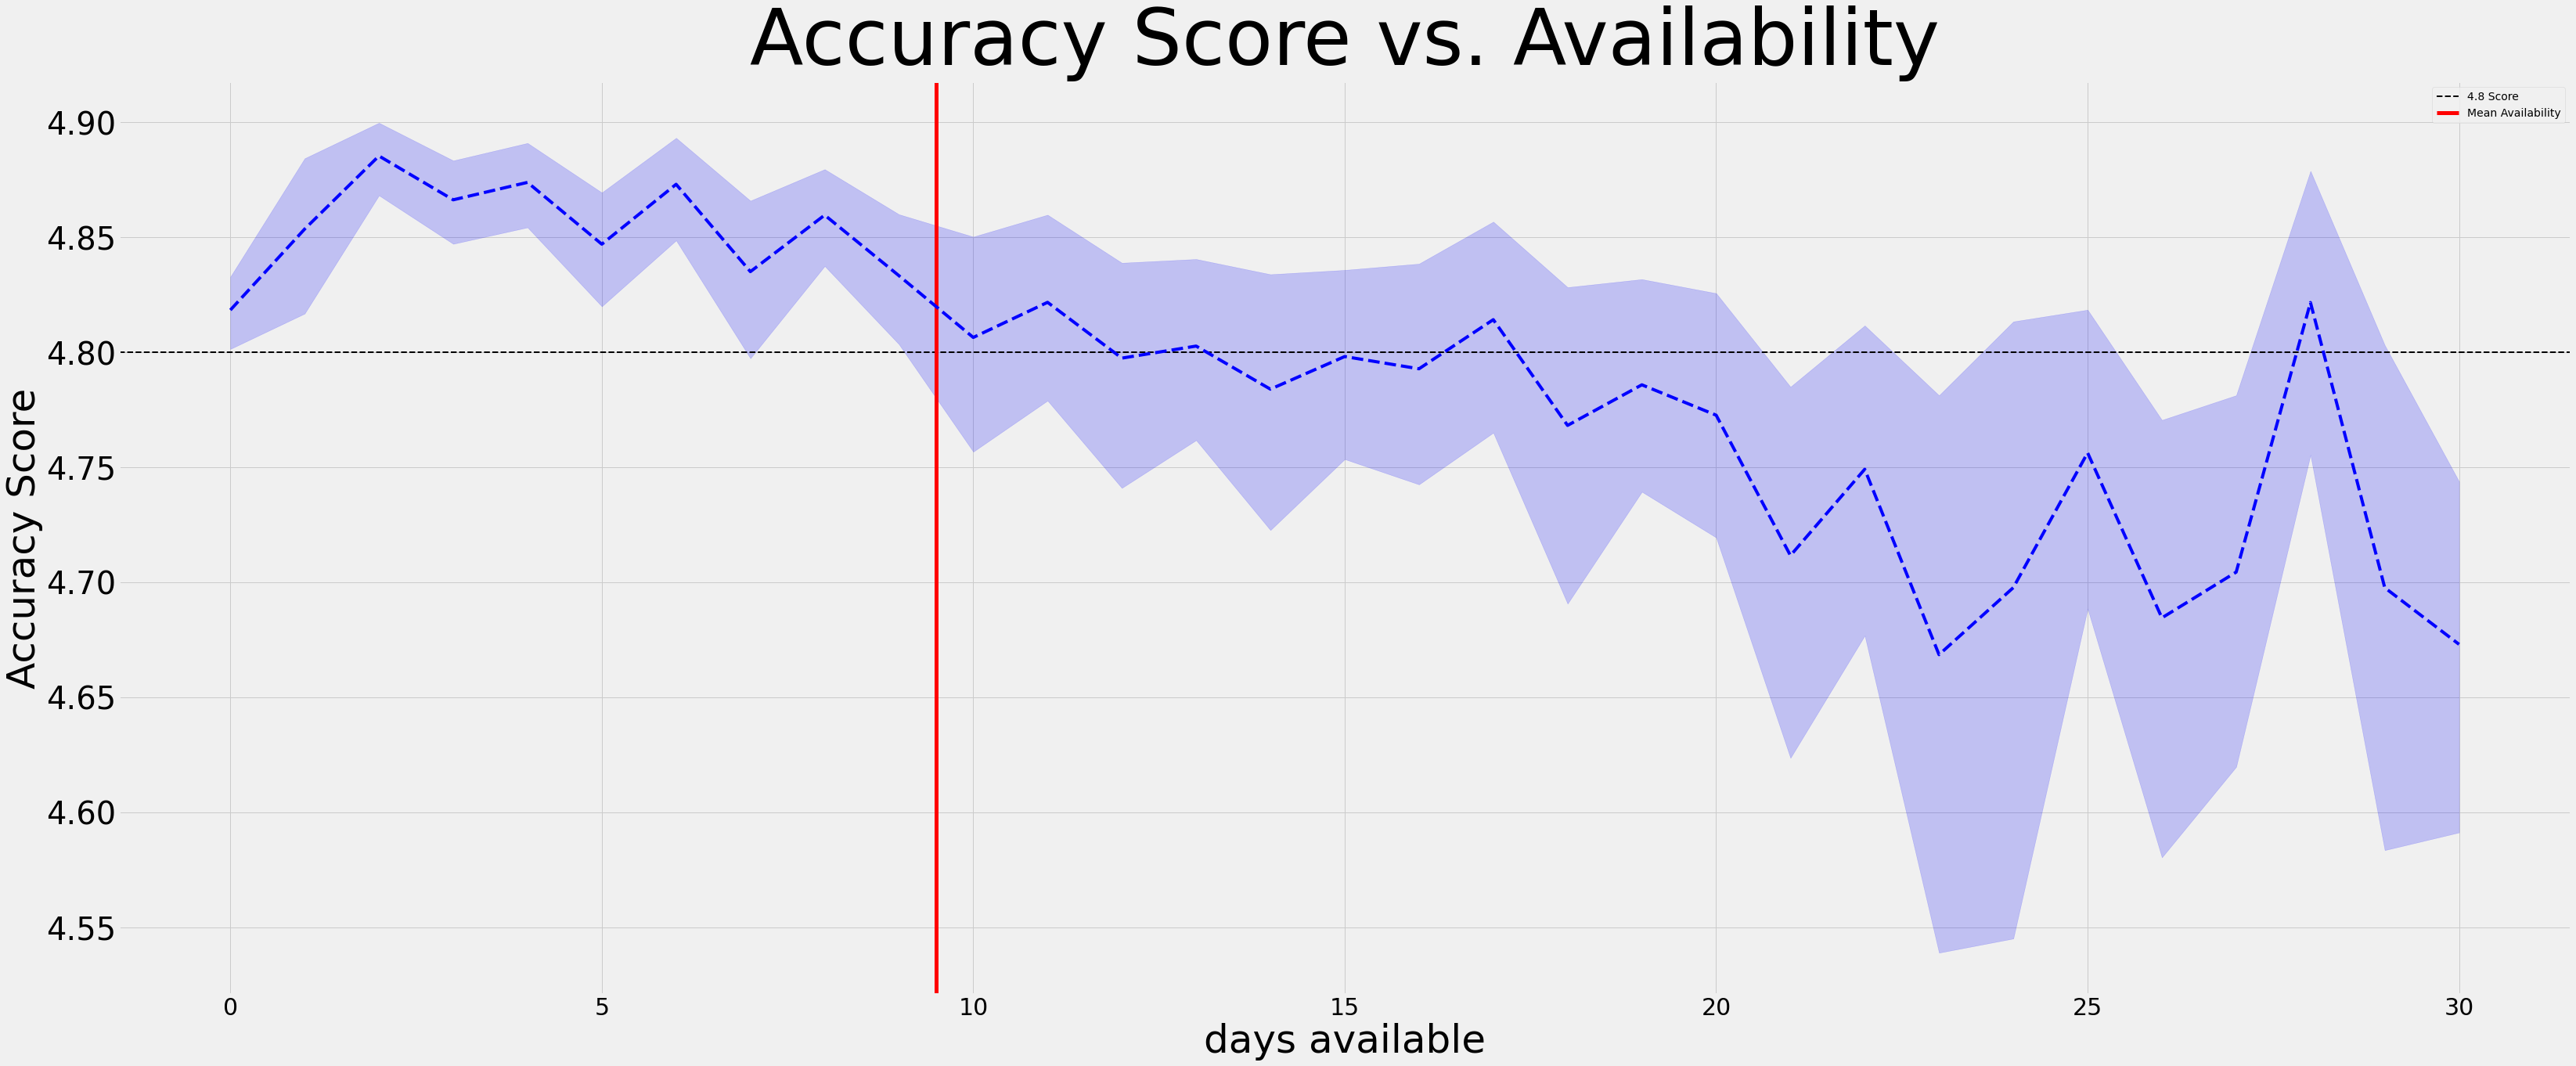

In [416]:
fig, ax = plt.subplots(figsize=(50,20))

ax.axhline(4.8, ls='--', color='black', linewidth=(2), label='4.8 Score')
ax.axvline(9.5 , color='red', linewidth=(5), label='Mean Availability')
#ax.invert_xaxis()


p = sns.lineplot(data=host_listings, x='availability_30', y='review_scores_accuracy',
                 ls = '--', color ='blue' );

#p = sns.lineplot(data=superhost_df, x='calculated_host_listings_count', y='review_scores_cleanliness',
#                 ls = '--', color ='green' );

#p = sns.lineplot(data=instant_bookable_df, x='calculated_host_listings_count', y='review_scores_cleanliness',
#                 ls = '--', color ='red' );


p.set_ylabel("Accuracy Score", fontsize = 50)

p.set_xlabel("days available", fontsize = 50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=40)

#ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Accuracy Score vs. Availability", fontsize = 100)
plt.figsize=(30,20) 

plt.show();

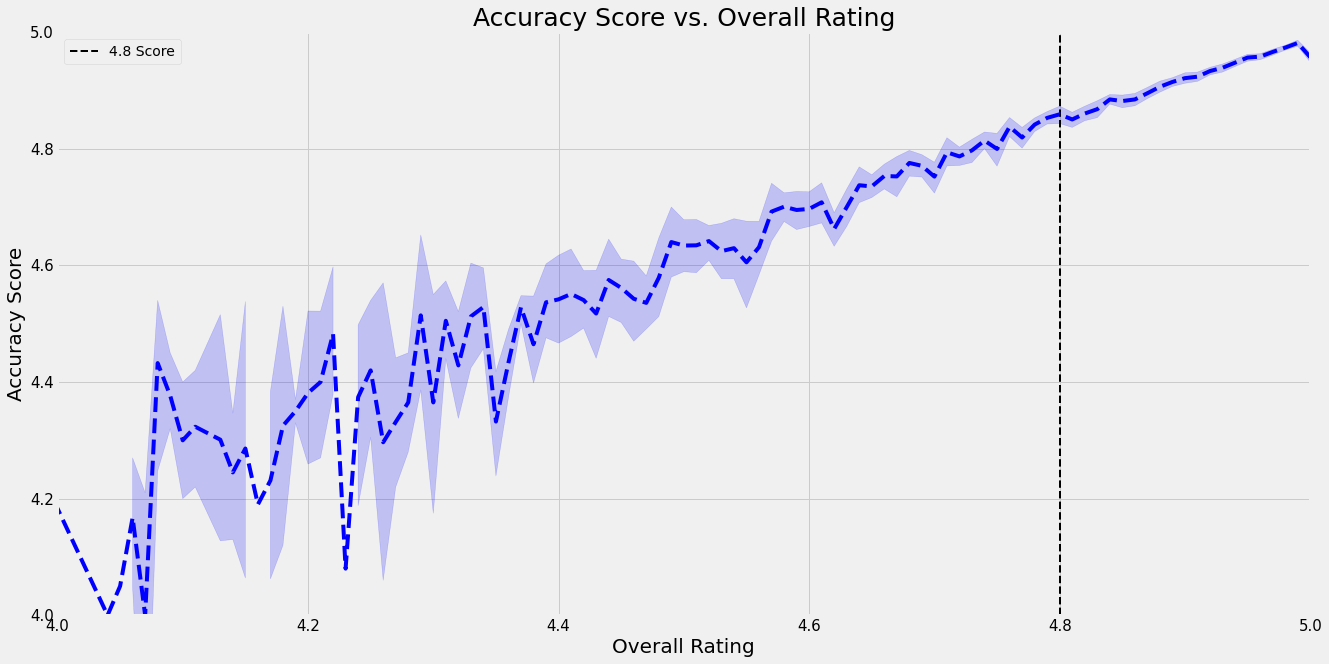

In [486]:
fig, ax = plt.subplots(figsize=(20,10))

ax.axvline(4.8, ls='--', color='black', linewidth=(2), label='4.8 Score')
#ax.axvline(9.5 , color='red', linewidth=(5), label='Mean Availability')
#ax.invert_xaxis()

ax.set_xlim(4,5)
ax.set_ylim(4,5)

p = sns.lineplot(data=host_listings, x='review_scores_rating', y='review_scores_accuracy',
                 ls = '--', color ='blue' );

#p = sns.lineplot(data=superhost_df, x='calculated_host_listings_count', y='review_scores_cleanliness',
#                 ls = '--', color ='green' );

#p = sns.lineplot(data=instant_bookable_df, x='calculated_host_listings_count', y='review_scores_cleanliness',
#                 ls = '--', color ='red' );


p.set_ylabel("Accuracy Score", fontsize = 20)

p.set_xlabel("Overall Rating", fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Accuracy Score vs. Overall Rating", fontsize = 25)
#plt.figsize=(30,20) 

plt.show();

### <b> Recommendation #2: Advise Clients to not host more properties than they can manage. </b>
- There is a general downward trend in overall rating as the number of units owned increases. 
- The bottom drops out between 12? and 20 before picking up again.
- I interpret these spikes to show when there are enough units owned to justify bringing in more help in managing them.
- As OPM will mainly be advising owners who are doing everything on their own, I would caution against having more than they can handle to the highest level of excellance.
-- or they should get help in managing their units.

#### I recommend that single owners manage no more than 8 units on their own.
- Also, I recommend that OPM offer services that help hosts to manage units once they get close to that threashold.
-- ie, prefered cleaning services, help with accurate listings, etc.

In [398]:
host_listings.groupby('calculated_host_listings_count').mean().head(10)

price  review_scores_rating  \
calculated_host_listings_count                                 
1                              265.299                 4.844   
2                              218.736                 4.812   
3                              243.046                 4.777   
4                              220.890                 4.745   
5                              239.149                 4.771   
6                              238.475                 4.760   
7                              313.227                 4.747   
8                              360.899                 4.678   
9                              372.280                 4.710   
10                             153.190                 4.640   

                                review_scores_accuracy  \
calculated_host_listings_count                           
1                                                4.870   
2                                                4.846   
3                                                4.808   
4                                                4.771   
5                                                4.795   
6                                                4.794   
7                                                4.778   
8                                                4.737   
9                                                4.746   
10                                               4.701   

                                review_scores_cleanliness  \
calculated_host_listings_count                              
1                                                   4.816   
2                                                   4.805   
3                                                   4.766   
4                                                   4.737   
5                                                   4.772   
6                                                   4.755   
7                                                   4.773   
8                                                   4.687   
9                                                   4.707   
10                                                  4.597   

                                review_scores_checkin  \
calculated_host_listings_count                          
1                                               4.917   
2                                               4.905   
3                                               4.892   
4                                               4.836   
5                                               4.877   
6                                               4.893   
7                                               4.821   
8                                               4.785   
9                                               4.841   
10                                              4.840   

                                review_scores_communication  \
calculated_host_listings_count                                
1                                                     4.915   
2                                                     4.892   
3                                                     4.872   
4                                                     4.832   
5                                                     4.869   
6                                                     4.851   
7                                                     4.835   
8                                                     4.811   
9                                                     4.774   
10                                                    4.791   

                                review_scores_location  review_scores_value  \
calculated_host_listings_count                                                
1                                                4.877                4.789   
2                                                4.863                4.767   
3                                                4.837                4.739 

#### Analysis: # of units listed before average score drops below 4.8
- Overall Rating: 2
- Accuracy: 3
- Cleanliness: 2
- Check-in: 7
- Communication: 9
- Location: 9
- Value: 0

#### <b>More info in archive</b>

### <b> #3: Make 5 Star Reviews Your Priority, Get Superhost Status if Possible</b>
- superhosts show far more consistancy across the board. (ie, having a higher # of rentals does not impact them as much, even though there is an impact)

In [456]:
five_star_stats

5_star                Metric  False  True  delta
7                  superhost  0.260 0.660  0.400
13           communication_5  0.154 0.474  0.320
8                 accuracy_5  0.070 0.367  0.297
10                 checkin_5  0.169 0.455  0.286
9              cleanliness_5  0.076 0.327  0.251
1           host_listings_5-  0.473 0.722  0.249
12                   value_5  0.033 0.231  0.198
11                location_5  0.180 0.377  0.198
6          host_response_100  0.640 0.787  0.146
4         bookings_above_avg  0.440 0.570  0.130
14                price_200+  0.487 0.496  0.010
3                bedrooms_2+  0.570 0.525 -0.045
2                capacity_5+  0.517 0.447 -0.069
5       availability_30_rate  0.373 0.287 -0.086
0           instant_bookable  0.568 0.418 -0.150

In [432]:
five_star_stats_only = five_star_stats.drop([False, 'delta'], axis=1)
not_five_star_stats_only = five_star_stats.drop([True, 'delta'], axis=1)

In [451]:
five_star_stats_only['value'] = five_star_stats_only[True]
not_five_star_stats_only['value'] = not_five_star_stats_only[False]

In [463]:
five_star_stats_only = five_star_stats_only.sort_values('value', ascending=False)

In [466]:
not_five_star_stats_only = not_five_star_stats_only.sort_values('value', ascending=False)

In [464]:
five_star_stats_only

5_star                Metric  True  value
6          host_response_100 0.787  0.787
Value       host_listings_5- 0.722  0.722
7                  superhost 0.660  0.660
4         bookings_above_avg 0.570  0.570
3                bedrooms_2+ 0.525  0.525
14                price_200+ 0.496  0.496
13           communication_5 0.474  0.474
10                 checkin_5 0.455  0.455
2                capacity_5+ 0.447  0.447
0           instant_bookable 0.418  0.418
11                location_5 0.377  0.377
8                 accuracy_5 0.367  0.367
9              cleanliness_5 0.327  0.327
5       availability_30_rate 0.287  0.287
12                   value_5 0.231  0.231

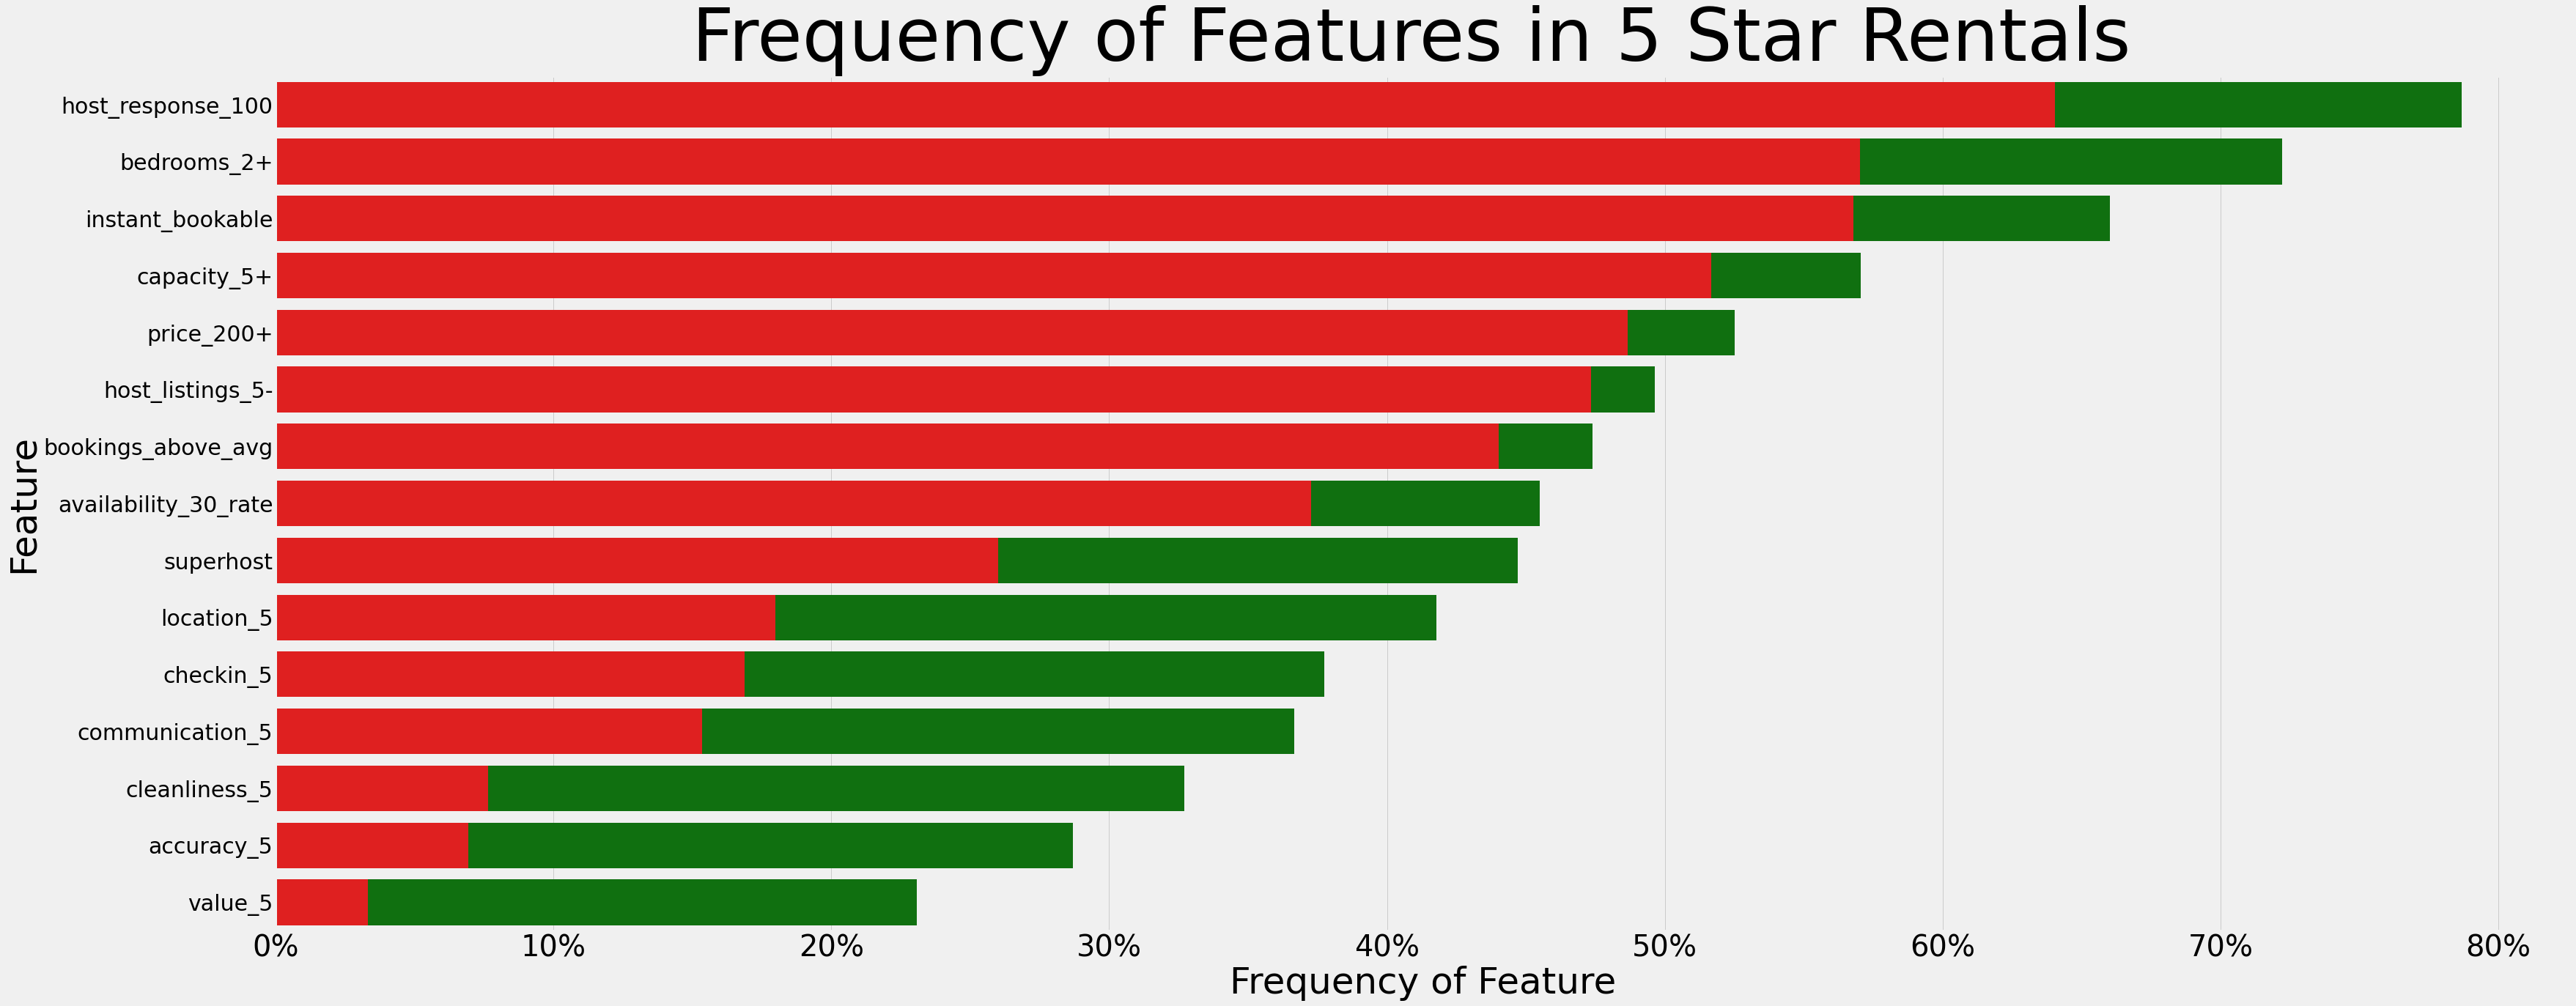

In [484]:
fig, ax = plt.subplots(figsize=(50,20))


#p = sns.lineplot(data=five_star_stats, color ='green' );
#p = sns.lineplot(data=five_star_stats_only, x='Metric', y='True', color ='green' );
p = sns.barplot(data=five_star_stats_only, x='value', y='Metric', color ='green' );
p = sns.barplot(data=not_five_star_stats_only, x='value', y='Metric', color ='red' );

#ax.set_xlim(.10, .80)




p.set_xlabel("Frequency of Feature", fontsize = 50)

p.set_ylabel("Feature", fontsize = 50)
plt.xticks(fontsize=40)
plt.yticks(fontsize=30)

ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title("Frequency of Features in 5 Star Rentals ", fontsize = 100)
plt.figsize=(30,20) 

plt.show();

### <b> #4: Communication is Critical in Setting Guest Expectations!</b>
- accurate listing
- explanation of airbnb's skewed review system.
- do this without being deceptive or cooercive.

- It doesn't matter that you have all the metrics and analysis to <b>know</b> that your unit deserves 5-star reviews. Your fate is in the hands of the reviewers. If you really care about getting 5 star reviews (and you should since they are critical to success on AirBnb), you need to explain this to your guests. 

- It is also important to do this without begging, or deceptively cooercing your guests.

- There are many great blog posts and websites dedicated to this. The best solution that I found was this one from https://medium.com/@campbellandia/how-to-avoid-the-dreaded-4-star-review-a-guide-for-airbnb-hosts-cdf482d083fe (accessed 6/21/22)



- There are many great blog posts and websites dedicated to this. The best solution that I found was this one from https://medium.com/@campbellandia/how-to-avoid-the-dreaded-4-star-review-a-guide-for-airbnb-hosts-cdf482d083fe (accessed 6/21/22)

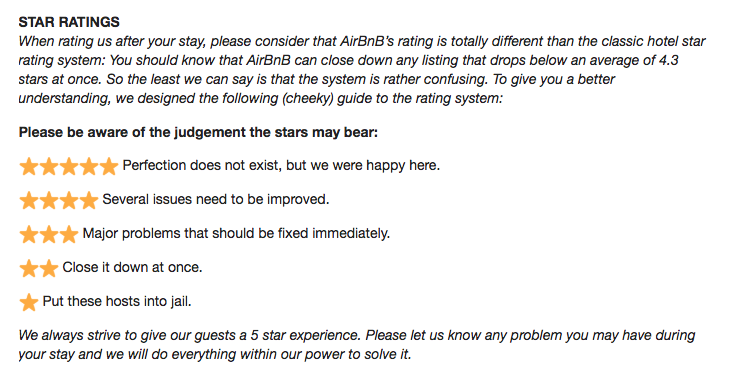

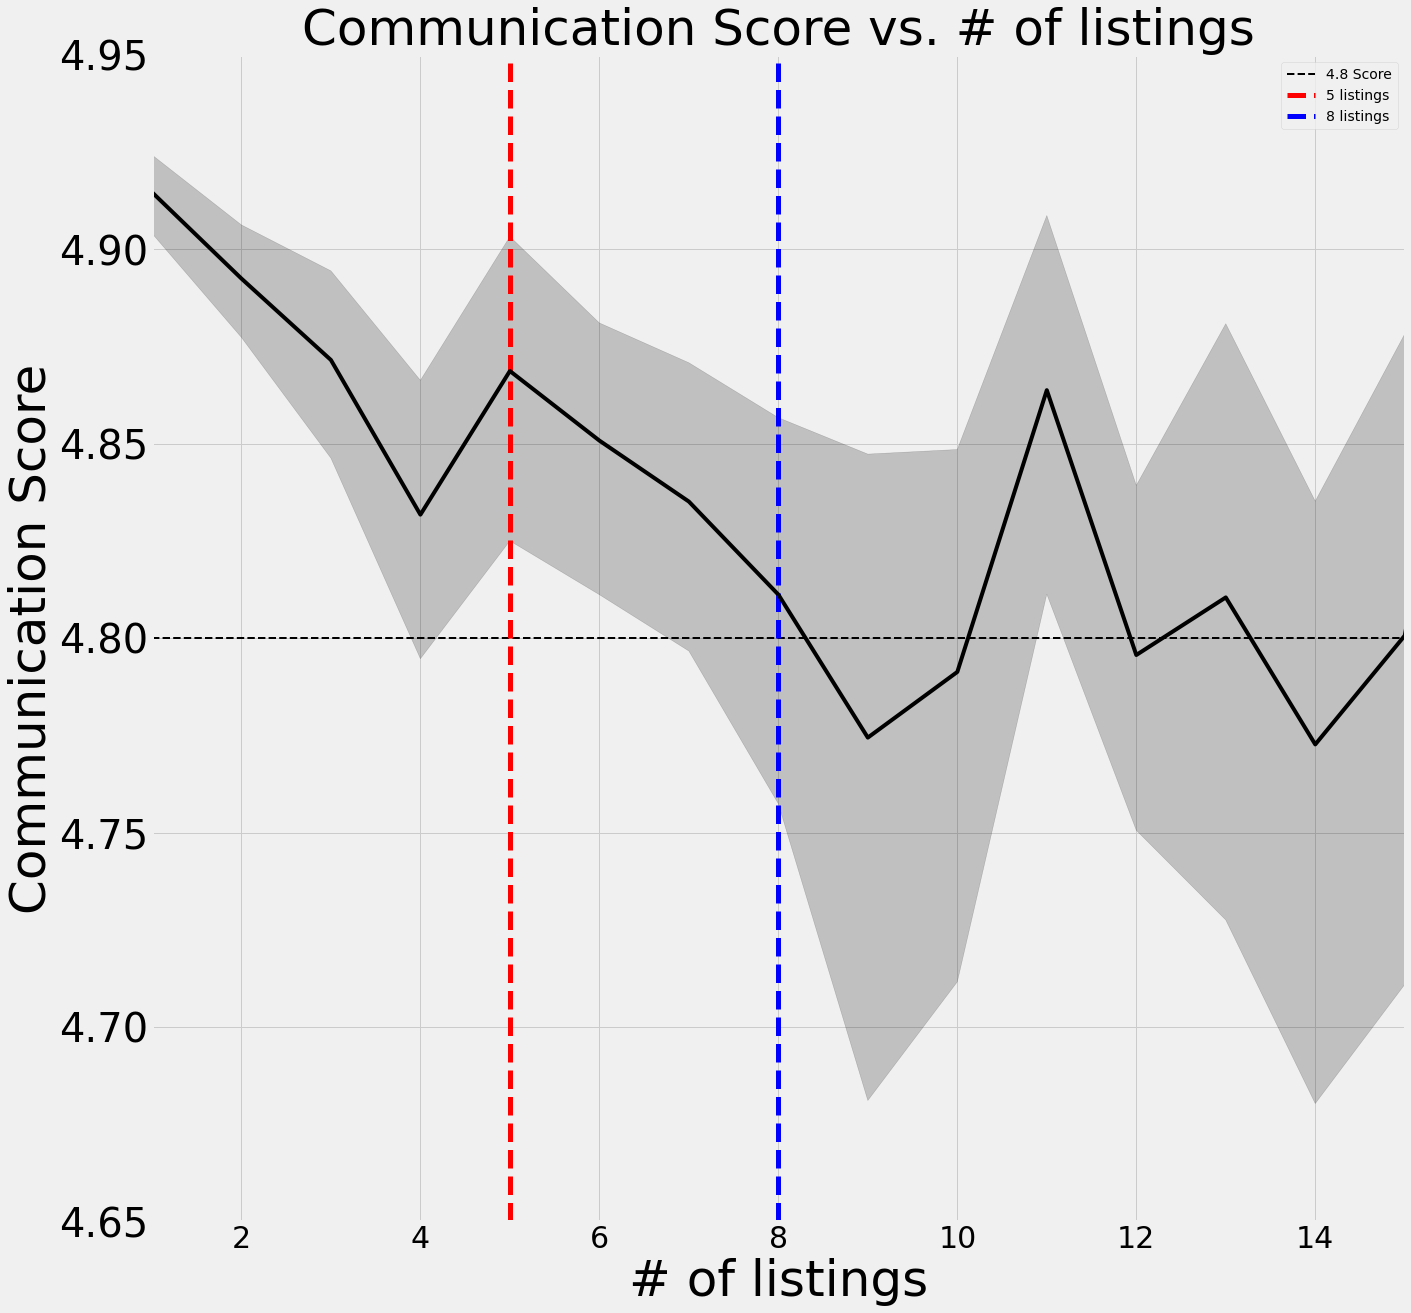

In [478]:
fig, ax = plt.subplots(figsize=(20,20))

ax.axhline(4.8, ls='--', color='black', linewidth=(2), label='4.8 Score')
ax.axvline(5, ls='--', color='red', linewidth=(5), label='5 listings')
ax.axvline(8, ls='--', color='blue', linewidth=(5), label='8 listings')

ax.set_xlim(1,15)
ax.set_ylim(4.65,4.95)

p = sns.lineplot(data=host_listings, x='calculated_host_listings_count', y='review_scores_communication',
                color ='black' );


p.set_ylabel("Communication Score", fontsize = 50)

p.set_xlabel("# of listings", fontsize = 50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=40)

#ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Communication Score vs. # of listings", fontsize = 50)
plt.figsize=(30,20) 

plt.show();

# Continue Adding Recommendations!!!!

## <b><u>New Archive Starts Here</b></u>

In [107]:
review_metrics['superhost'].value_counts()

True     3999
False    3811
Name: superhost, dtype: int64

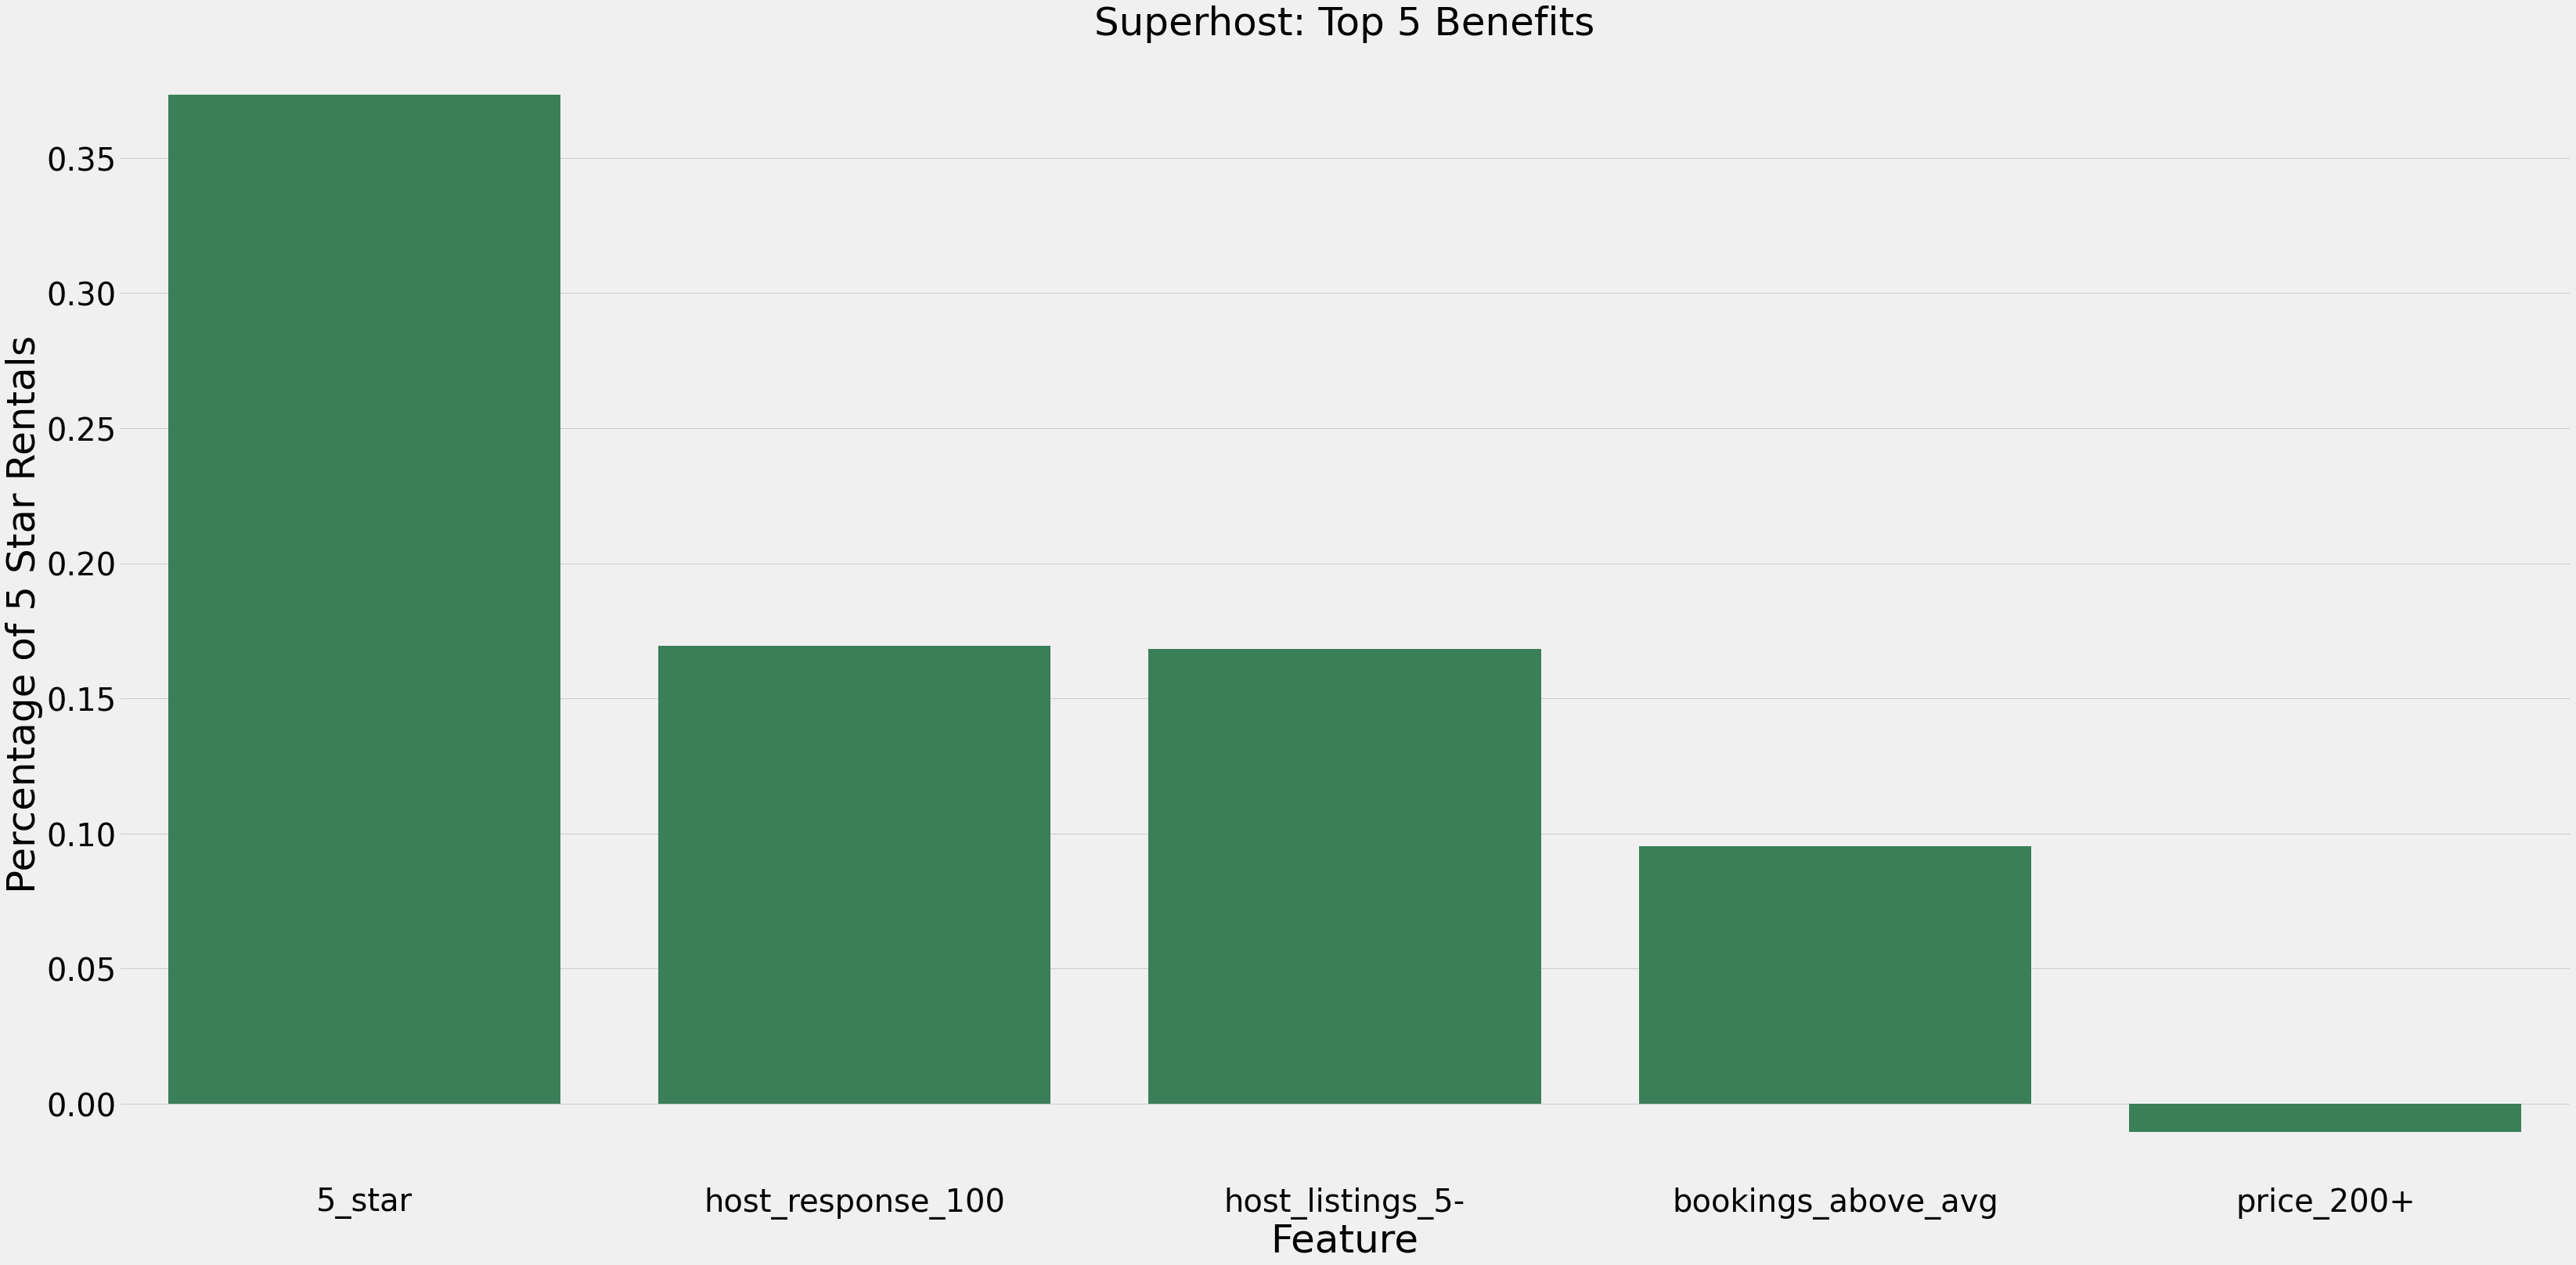

In [110]:
fig, ax = plt.subplots(figsize=(50,25))
p = sns.barplot(data=superhost_stats.head(5), x='Metric', y='delta', color ='seagreen' );
p.set_ylabel("Percentage of 5 Star Rentals", fontsize = 50)

p.set_xlabel("Feature", fontsize = 50)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

#ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title("Superhost: Top 5 Benefits", fontsize = 50)
plt.figsize=(30,20) 

plt.show();

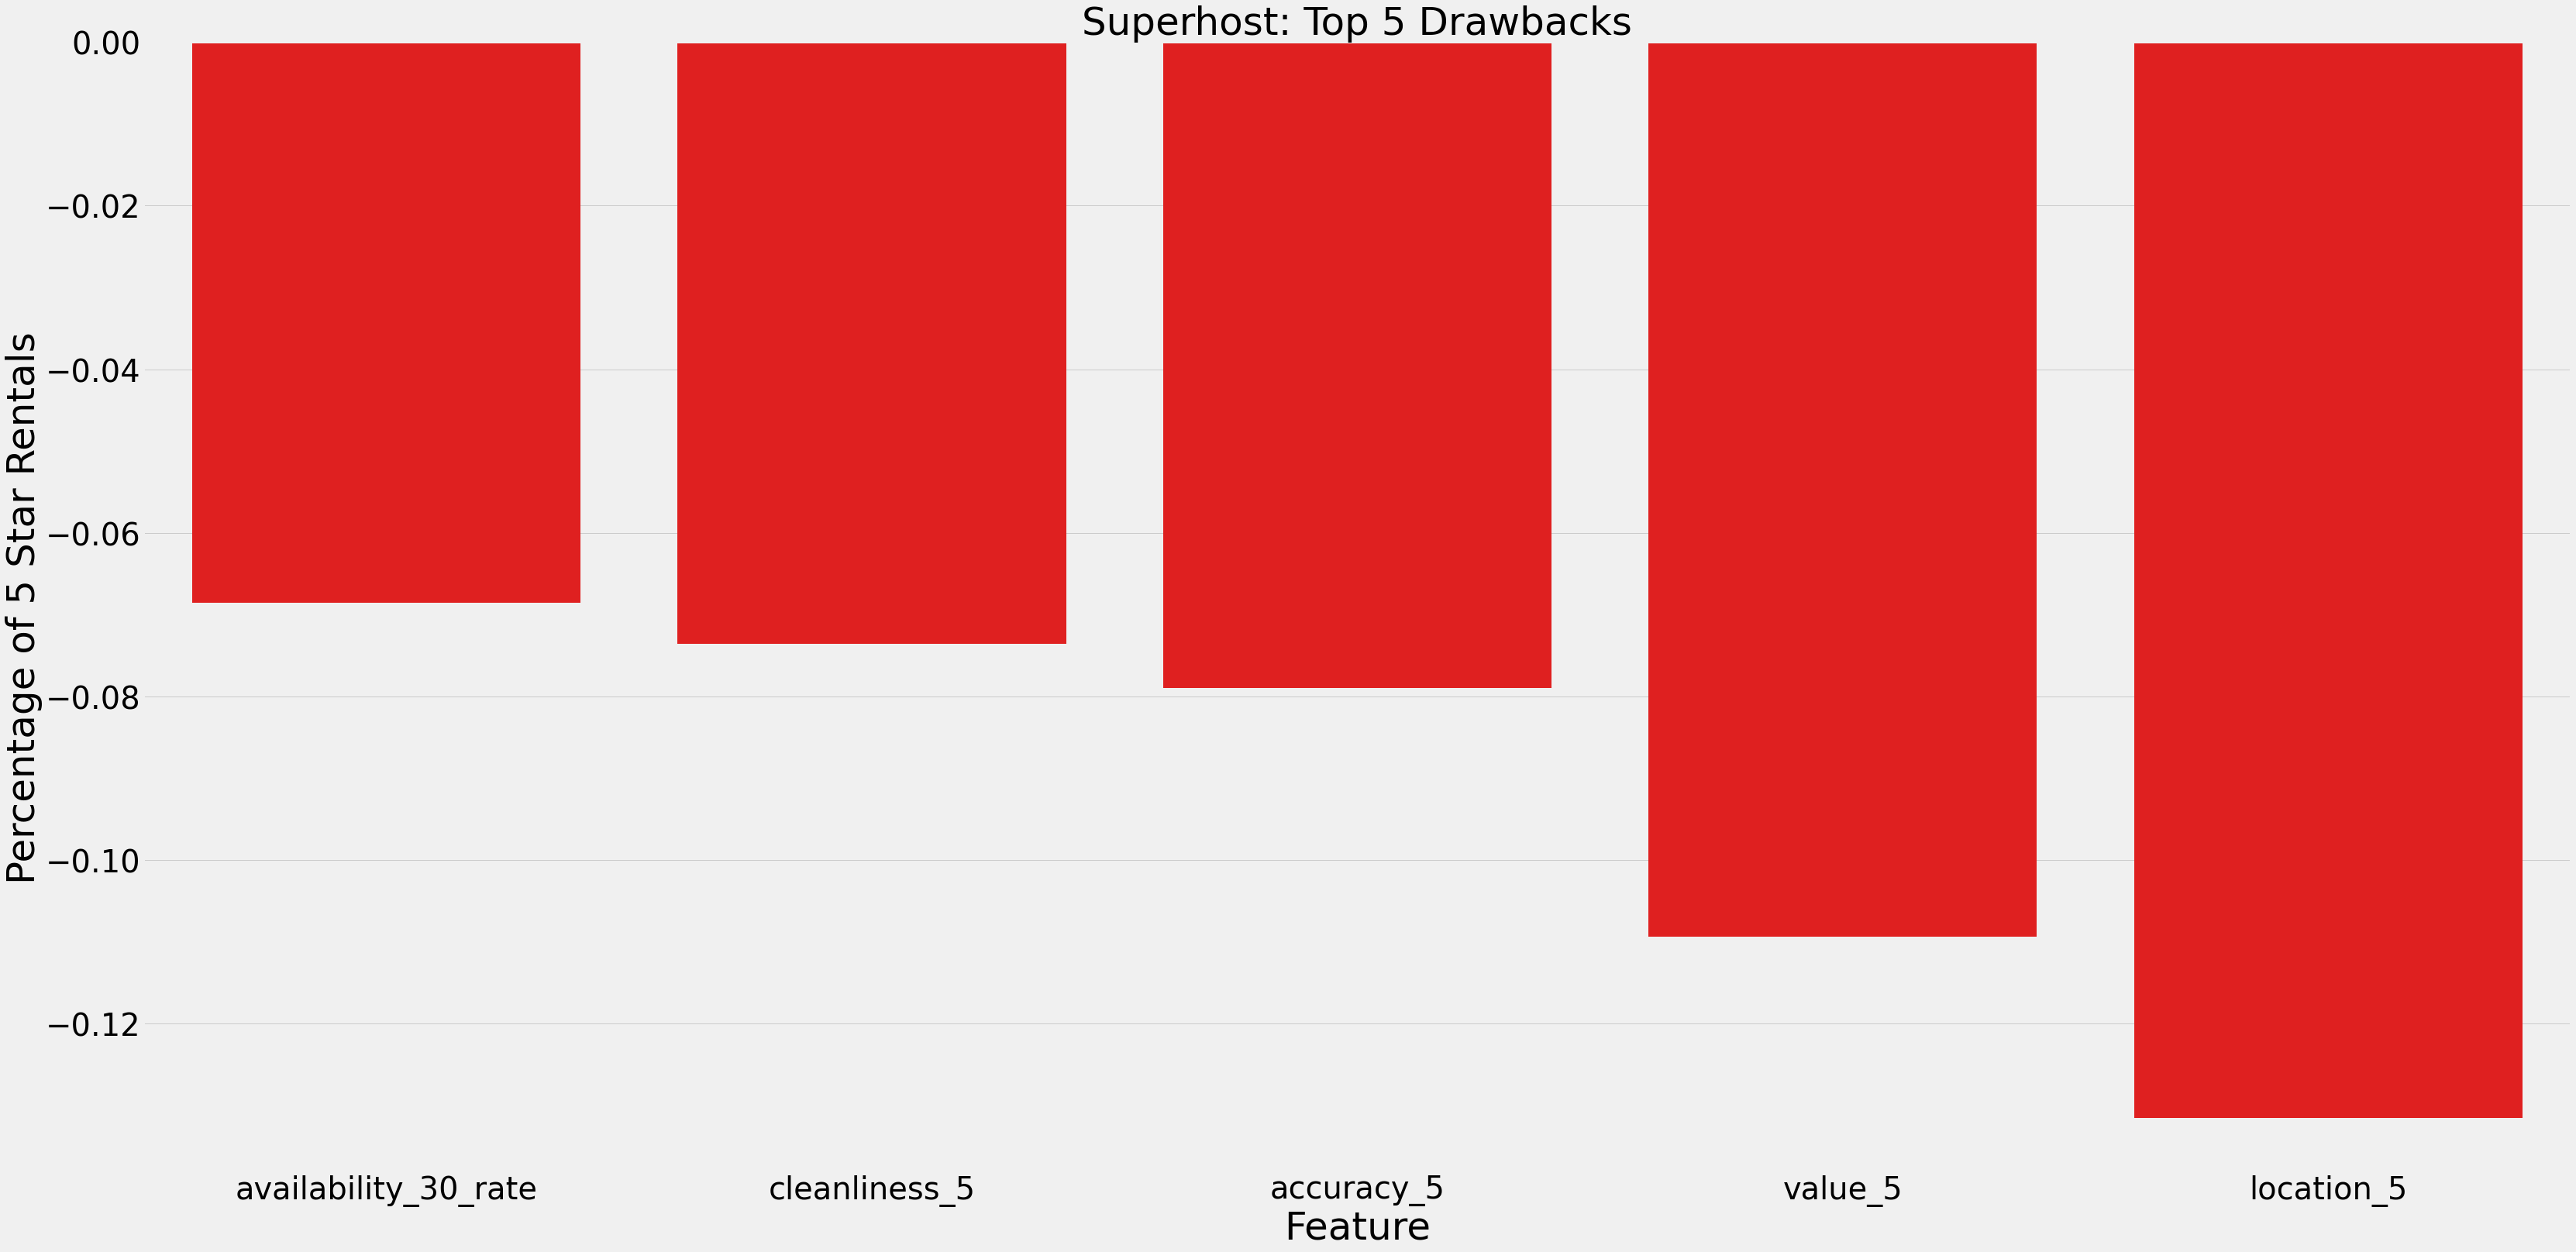

In [111]:
fig, ax = plt.subplots(figsize=(50,25))
p = sns.barplot(data=superhost_stats.tail(5), x='Metric', y='delta', color ='red' );
p.set_ylabel("Percentage of 5 Star Rentals", fontsize = 50)

p.set_xlabel("Feature", fontsize = 50)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

#ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title("Superhost: Top 5 Drawbacks", fontsize = 50)
plt.figsize=(30,20) 

plt.show();

### <b> Top Feature #3: Value</b>

In [173]:
value_metrics = review_metrics.groupby('value_5').mean()
value_stats = get_stats(value_metrics)
value_stats

value_5                Metric  False  True  delta
9                  accuracy_5  0.143 0.864  0.721
10              cleanliness_5  0.130 0.792  0.662
13            communication_5  0.252 0.907  0.655
11                  checkin_5  0.247 0.897  0.650
12                 location_5  0.204 0.842  0.638
8                      5_star  0.575 0.922  0.347
1            host_listings_5-  0.618 0.695  0.077
5        availability_30_rate  0.315 0.339  0.024
4          bookings_above_avg  0.523 0.519 -0.004
6           host_response_100  0.735 0.717 -0.018
3                 bedrooms_2+  0.545 0.522 -0.023
14                 price_200+  0.497 0.470 -0.027
2                 capacity_5+  0.482 0.422 -0.060
0            instant_bookable  0.487 0.402 -0.084
7                   superhost  0.544 0.339 -0.206

#### Analysis:
- Units with a perfect Value Score are significantly more likely to have higher scores on all review metrics.
- They are also more likely to be a 5-Star Unit, with 92% of units with high value being 5-Star Units.
- Less likely to be Superhosts, at only 34% of 5.0 Value units.

### <b> Top Feature #4: Cleanliness</b>

In [174]:
cleanliness_metrics = review_metrics.groupby('cleanliness_5').mean()
cleanliness_stats = get_stats(cleanliness_metrics)
cleanliness_stats

cleanliness_5                Metric  False  True  delta
9                        accuracy_5  0.111 0.732  0.621
13                  communication_5  0.218 0.804  0.586
10                        checkin_5  0.212 0.796  0.584
11                       location_5  0.185 0.693  0.507
12                          value_5  0.043 0.533  0.490
8                            5_star  0.553 0.879  0.326
14                       price_200+  0.482 0.529  0.047
1                  host_listings_5-  0.619 0.665  0.045
5              availability_30_rate  0.312 0.340  0.028
3                       bedrooms_2+  0.538 0.553  0.014
2                       capacity_5+  0.476 0.462 -0.014
6                 host_response_100  0.739 0.712 -0.027
4                bookings_above_avg  0.529 0.501 -0.028
0                  instant_bookable  0.492 0.411 -0.081
7                         superhost  0.536 0.434 -0.102

#### Analysis:
- More likely to scsore higher in all review metrics.
- 87% of Cleanliness 5.0 units have 5-Star Status.

### <b> Top Feature #6 : Host Listings</b>

In [175]:
listing_metrics = review_metrics.groupby('host_listings_5-').mean()
listing_stats = get_stats(listing_metrics)
listing_stats
#listing_stats.sort_values('delta', ascending=True)

host_listings_5-                Metric  False  True  delta
5                    host_response_100  0.560 0.834  0.274
7                               5_star  0.473 0.722  0.249
6                            superhost  0.398 0.579  0.180
3                   bookings_above_avg  0.412 0.587  0.174
13                     communication_5  0.293 0.392  0.099
10                           checkin_5  0.296 0.380  0.085
8                           accuracy_5  0.215 0.281  0.066
12                             value_5  0.130 0.174  0.044
9                        cleanliness_5  0.212 0.247  0.035
11                          location_5  0.326 0.292 -0.034
4                 availability_30_rate  0.398 0.272 -0.126
2                          bedrooms_2+  0.638 0.485 -0.153
14                          price_200+  0.621 0.418 -0.203
1                          capacity_5+  0.603 0.396 -0.207
0                     instant_bookable  0.656 0.366 -0.291

#### Analysis: Hosts who have less than 5 units listed are:
- significantly more likely to have 100% Resoonse Rate.
- significantly more likley to be a 5-Star unit.
- more likley to be a Superhost and be booked more than average.
- significantly less likely to cost $200/night.
- significantly less likely to have capacity for more than 4 people.
- significantly less likely to use instant book feature.

### <b>Top Feature #7:  Check-in</b>

In [118]:
checkin_metrics = review_metrics.groupby('checkin_5').mean()
checkin_stats = get_stats(checkin_metrics)
checkin_stats

checkin_5                Metric  False  True  delta
13              communication_5  0.131 0.774  0.644
9                    accuracy_5  0.076 0.593  0.516
11                   location_5  0.137 0.616  0.479
10                cleanliness_5  0.073 0.534  0.461
12                      value_5  0.025 0.405  0.380
8                        5_star  0.527 0.821  0.294
1              host_listings_5-  0.600 0.687  0.087
3                   bedrooms_2+  0.527 0.569  0.042
14                   price_200+  0.479 0.518  0.039
4            bookings_above_avg  0.517 0.532  0.016
5          availability_30_rate  0.317 0.323  0.006
2                   capacity_5+  0.473 0.472 -0.002
6             host_response_100  0.735 0.728 -0.007
7                     superhost  0.532 0.475 -0.057
0              instant_bookable  0.508 0.409 -0.099

#### Analysis
- 

In [126]:
five_star_metrics = review_metrics.groupby('5_star').mean()
five_star_stats = get_stats(five_star_metrics)
five_star_stats

5_star                Metric  False  True  delta
7                  superhost  0.260 0.660  0.400
13           communication_5  0.154 0.474  0.320
8                 accuracy_5  0.070 0.367  0.297
10                 checkin_5  0.169 0.455  0.286
9              cleanliness_5  0.076 0.327  0.251
1           host_listings_5-  0.473 0.722  0.249
12                   value_5  0.033 0.231  0.198
11                location_5  0.180 0.377  0.198
6          host_response_100  0.640 0.787  0.146
4         bookings_above_avg  0.440 0.570  0.130
14                price_200+  0.487 0.496  0.010
3                bedrooms_2+  0.570 0.525 -0.045
2                capacity_5+  0.517 0.447 -0.069
5       availability_30_rate  0.373 0.287 -0.086
0           instant_bookable  0.568 0.418 -0.150

### <b>Instant Bookable Stats</b>

In [176]:
instant_book_metrics = review_metrics.groupby('instant_bookable').mean()
instant_book_stats = get_stats(instant_book_metrics)
instant_book_stats

instant_bookable                Metric  False  True  delta
1                          capacity_5+  0.417 0.535  0.119
14                          price_200+  0.442 0.549  0.107
4                 availability_30_rate  0.280 0.362  0.082
2                          bedrooms_2+  0.504 0.584  0.080
11                          location_5  0.322 0.285 -0.037
12                             value_5  0.179 0.134 -0.045
6                            superhost  0.538 0.483 -0.056
9                        cleanliness_5  0.262 0.203 -0.058
5                    host_response_100  0.762 0.699 -0.063
8                           accuracy_5  0.290 0.219 -0.071
10                           checkin_5  0.392 0.302 -0.090
13                     communication_5  0.402 0.304 -0.098
3                   bookings_above_avg  0.579 0.459 -0.120
7                               5_star  0.696 0.556 -0.140
0                     host_listings_5-  0.759 0.487 -0.272

#### Analysis:
- more likely to be used with big units. (capacity 5 or more, more expensive, more bedrooms)
- less likley to be 5-star, book above average.
- scores lower on all review metrics.

### creating Host listings DF

In [135]:
host_listings = analysis_df[analysis_df['calculated_host_listings_count'] <= 50]
host_listings = host_listings.sort_values('calculated_host_listings_count', ascending=True)

## <b> LinePlot: Review Scores vs. number of units hosted </b>

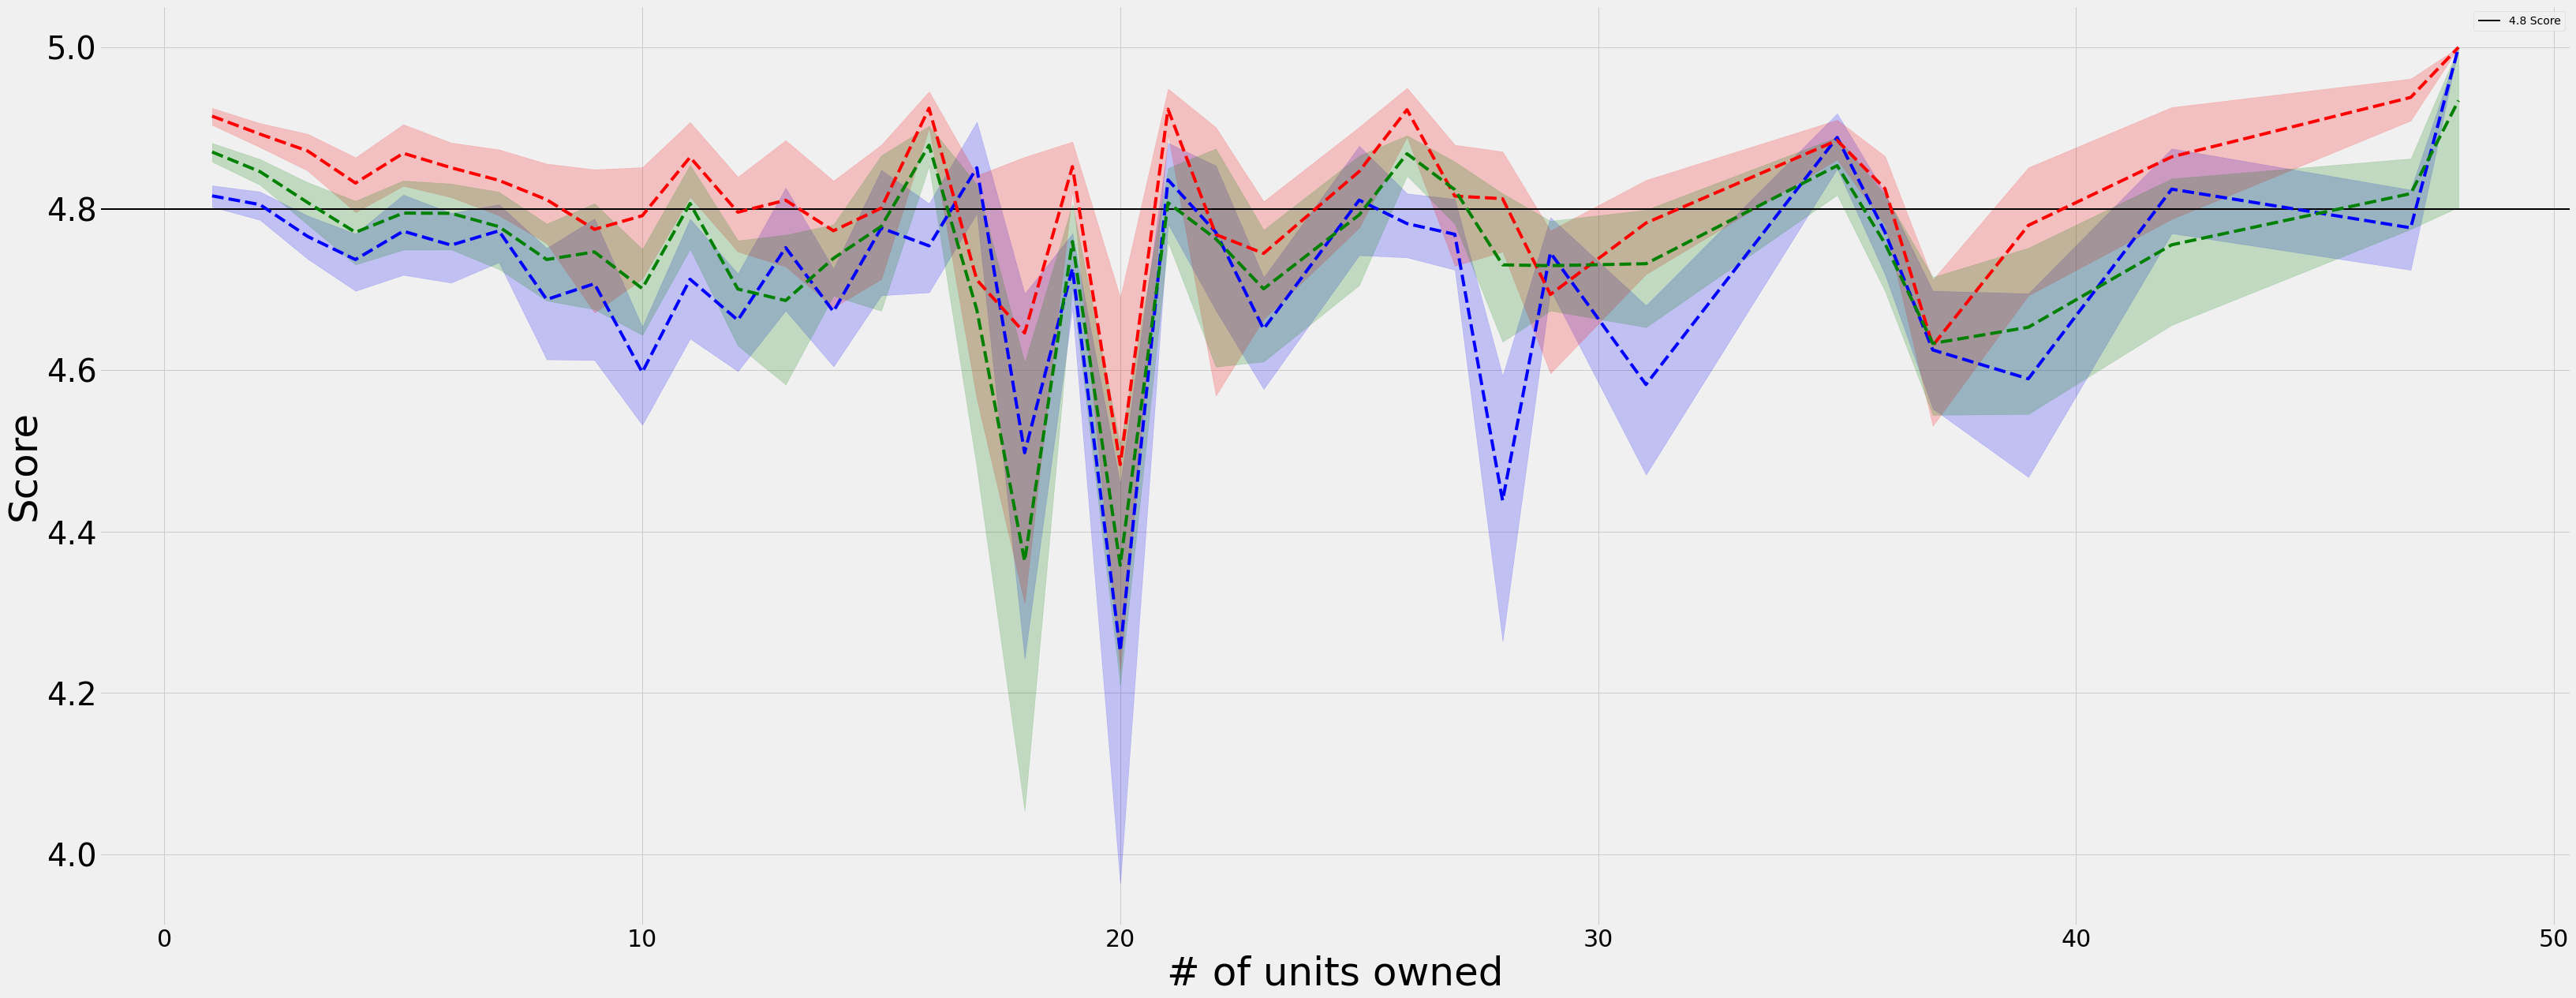

In [137]:
fig, ax = plt.subplots(figsize=(50,20))

ax.axhline(4.8, color='black', linewidth=(2), label='4.8 Score')
p = sns.lineplot(data=host_listings, x='calculated_host_listings_count', y='review_scores_cleanliness',
                 ls = '--', color ='blue' );
p = sns.lineplot(data=host_listings, x='calculated_host_listings_count', y='review_scores_communication',
                 ls = '--', color ='red' );
p = sns.lineplot(data=host_listings, x='calculated_host_listings_count', y='review_scores_accuracy',
                 ls = '--', color ='green' );
#p = sns.lineplot(data=host_listings, x='calculated_host_listings_count', y='review_scores_value',
#                 ls = '--', color ='purple' );
#p = sns.lineplot(data=host_listings, x='calculated_host_listings_count', y='review_scores_checkin',
#                 ls = '--', color ='brown' );



p.set_ylabel("Score", fontsize = 50)

p.set_xlabel("# of units owned", fontsize = 50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=40)

#ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

#p.set_title("Frequency of Features in 5 Star Rentals ", fontsize = 100)
plt.figsize=(30,20) 

plt.show();

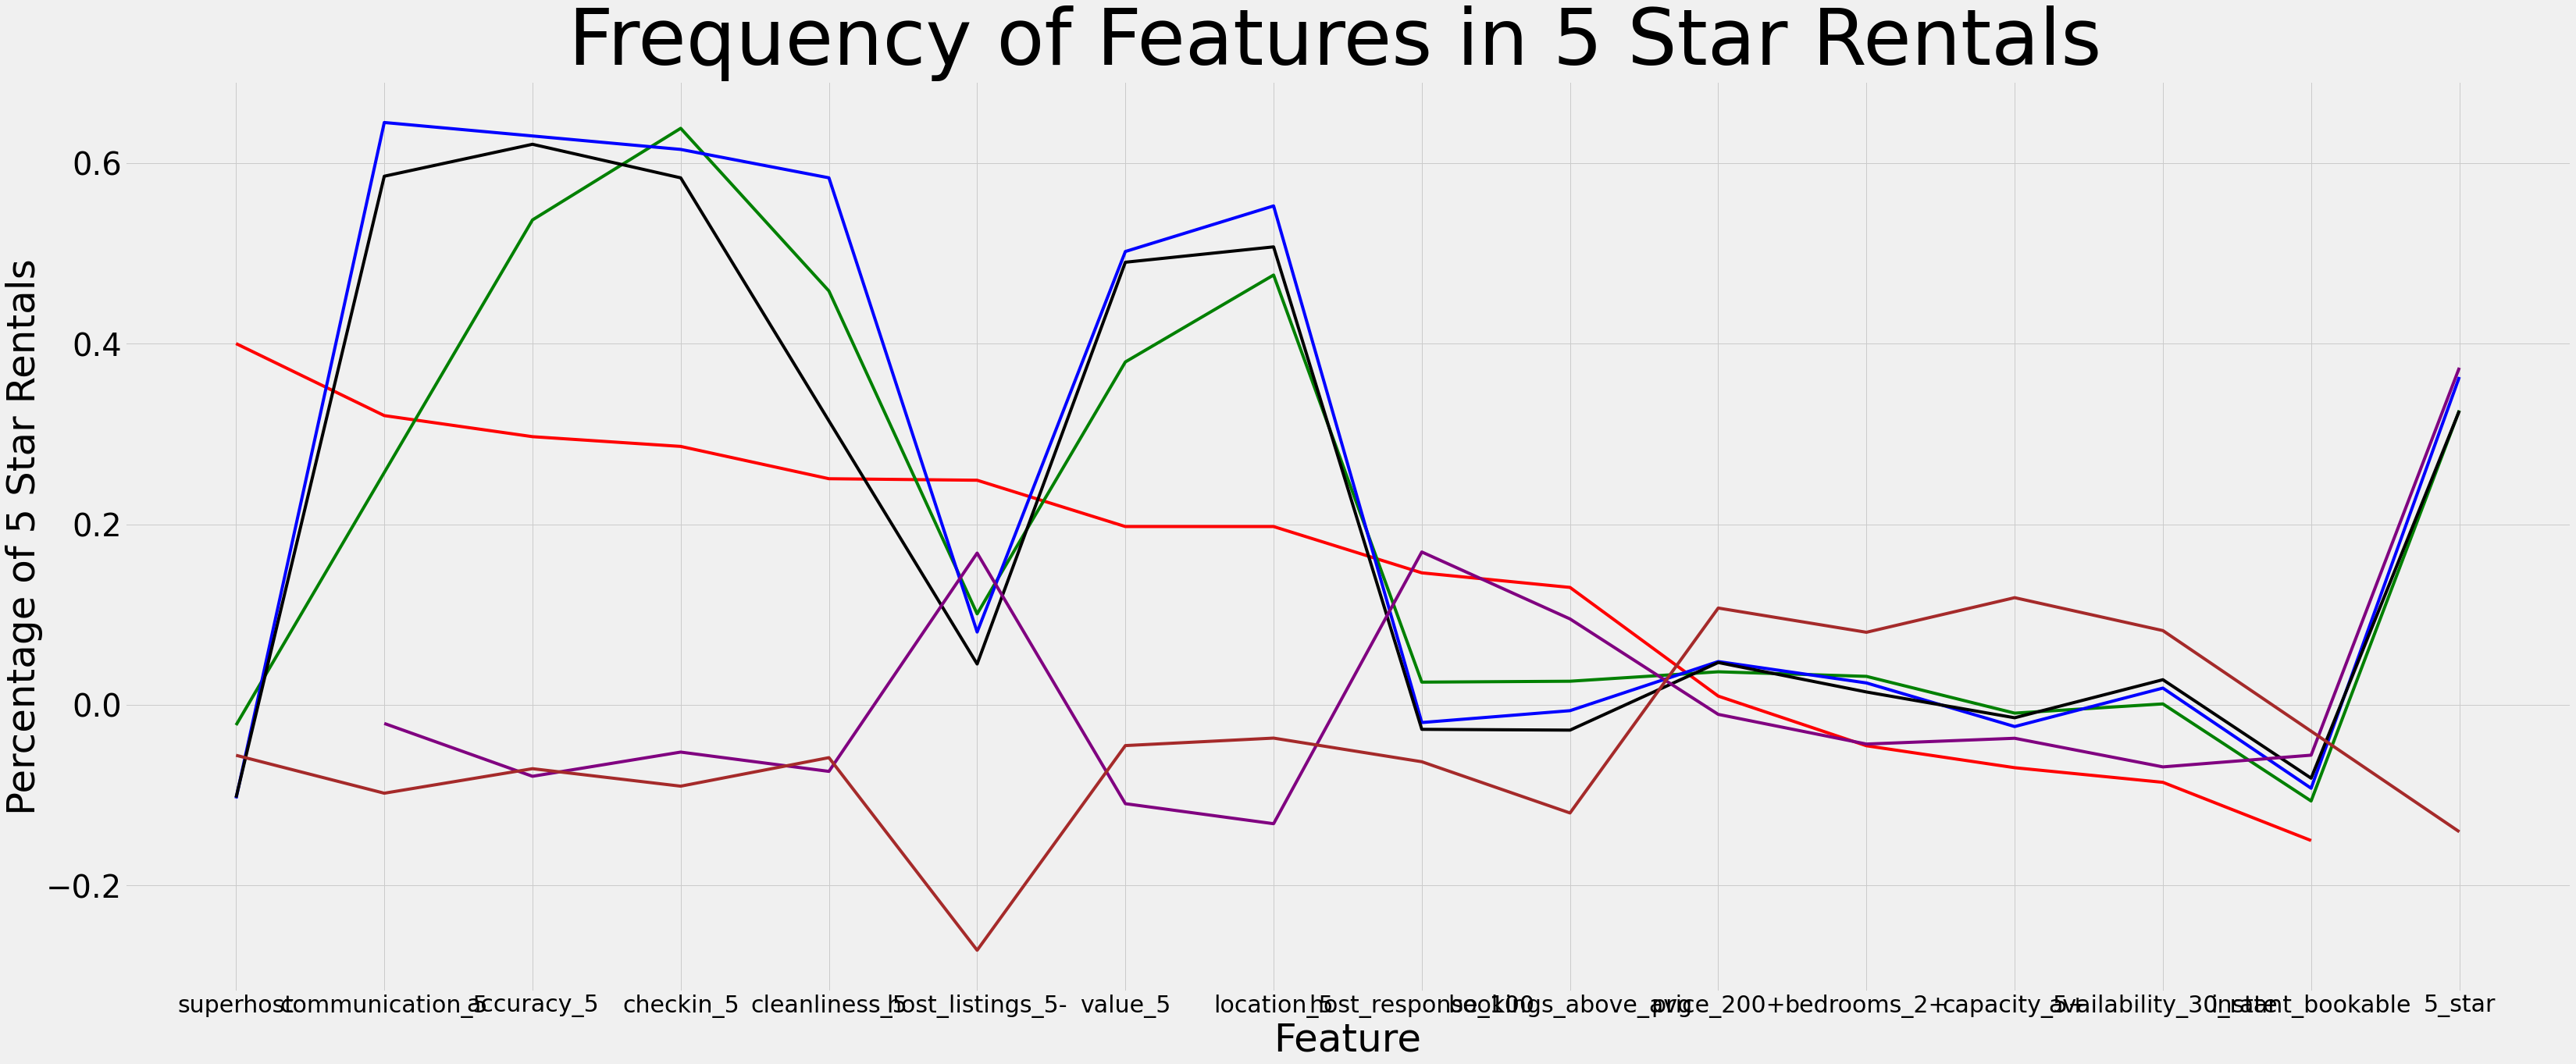

In [134]:
fig, ax = plt.subplots(figsize=(50,20))


p = sns.lineplot(data=five_star_stats, x='Metric', y='delta', color ='red' );
p = sns.lineplot(data=communication_stats, x='Metric', y='delta', color ='green' );
p = sns.lineplot(data=accuracy_stats, x='Metric', y='delta', color ='blue' );
p = sns.lineplot(data=cleanliness_stats, x='Metric', y='delta', color ='black' );
p = sns.lineplot(data=superhost_stats, x='Metric', y='delta', color ='purple' );
p = sns.lineplot(data=instant_book_stats, x='Metric', y='delta', color ='brown' );




p.set_ylabel("Percentage of 5 Star Rentals", fontsize = 50)

p.set_xlabel("Feature", fontsize = 50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=40)

#ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title("Frequency of Features in 5 Star Rentals ", fontsize = 100)
plt.figsize=(30,20) 

plt.show();

## Questions Answered

- Is there a significant advantage to being a Superhost? (is it worth all the effort to get this status and maintain it?)
- <b> YES!.</b>
- The benefits of being a 5 Star overall host, vs not being one. (again, is it worth all the work to have 5 Star overall rating)
- <b> SIMILAR TO SUPERHOST</B>
- What factors are most important in determining a 5 Star Overall Rating? (what aspects should they most focus on)

## <b><u>Observations & Recommendations</b></u>

- AIRBNB IS A CUSTOMER SERVICE INDUSTRY!
- <b>Don't have more properties than you can manage to the highest level of quality</b>.
-- sweet spot seems to be 2-4 properties.
-- hire help.

- Interface directly with your clients, and don't use instant booking.
- Be incredibly accurate in listing and communication with guests.
- Communicate well.
-- including communication about airbnbs system.
- Strive to be a superhost, but make sure that you are striving for the highest degree of quality as well.


### <b>ACCURACY IS CRUCIAL</b>

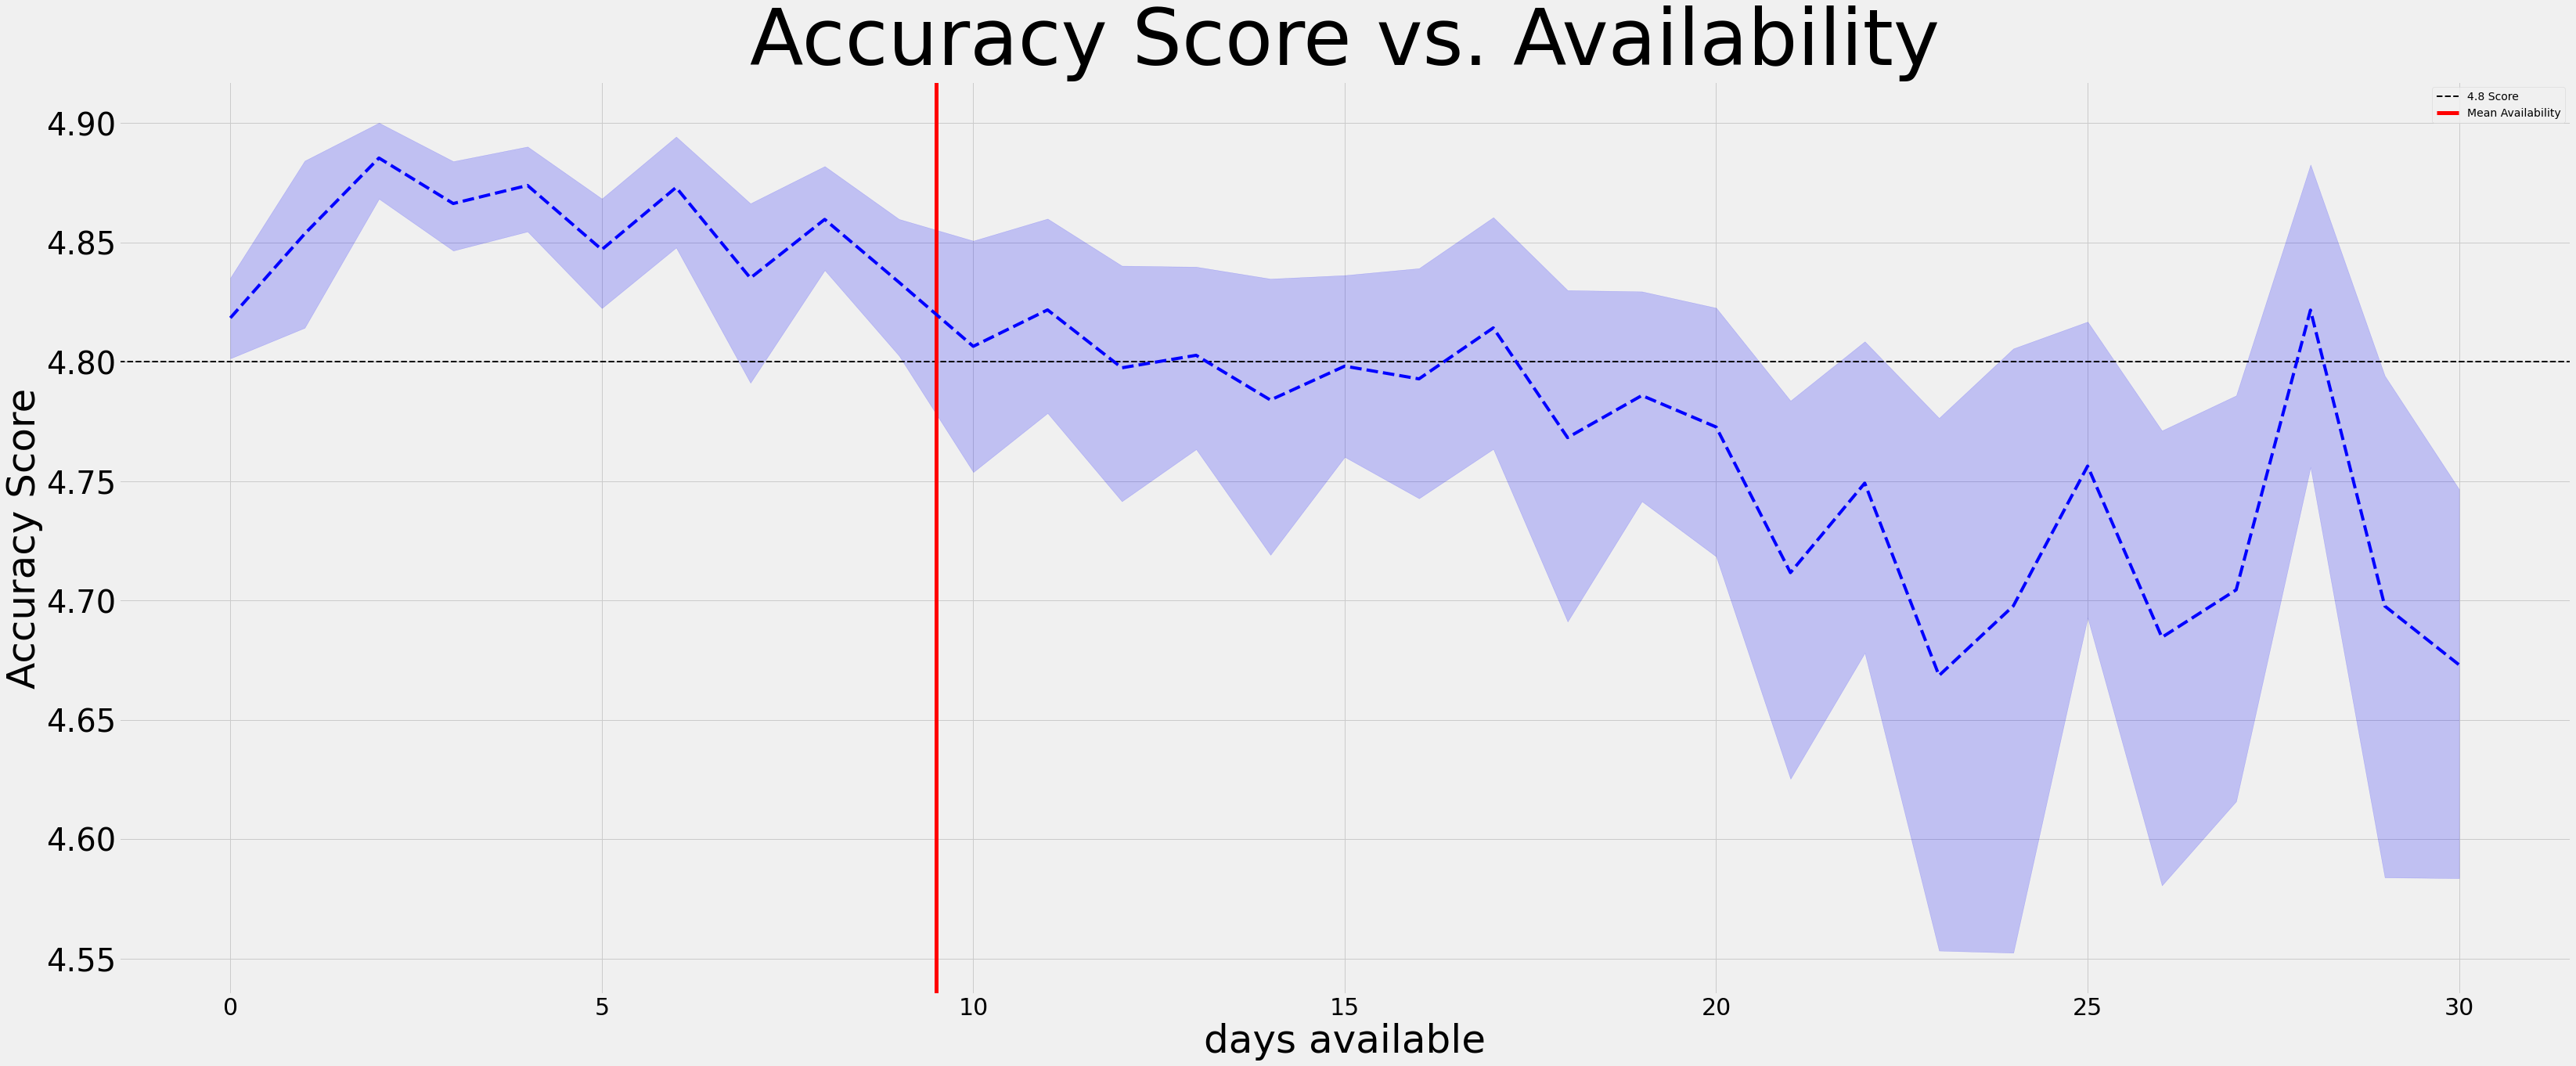

In [212]:
fig, ax = plt.subplots(figsize=(50,20))

ax.axhline(4.8, ls='--', color='black', linewidth=(2), label='4.8 Score')
ax.axvline(9.5 , color='red', linewidth=(5), label='Mean Availability')
#ax.invert_xaxis()

p = sns.lineplot(data=host_listings, x='availability_30', y='review_scores_accuracy',
                 ls = '--', color ='blue' );

#p = sns.lineplot(data=superhost_df, x='calculated_host_listings_count', y='review_scores_cleanliness',
#                 ls = '--', color ='green' );

#p = sns.lineplot(data=instant_bookable_df, x='calculated_host_listings_count', y='review_scores_cleanliness',
#                 ls = '--', color ='red' );


p.set_ylabel("Accuracy Score", fontsize = 50)

p.set_xlabel("days available", fontsize = 50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=40)

#ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Accuracy Score vs. Availability", fontsize = 100)
plt.figsize=(30,20) 

plt.show();

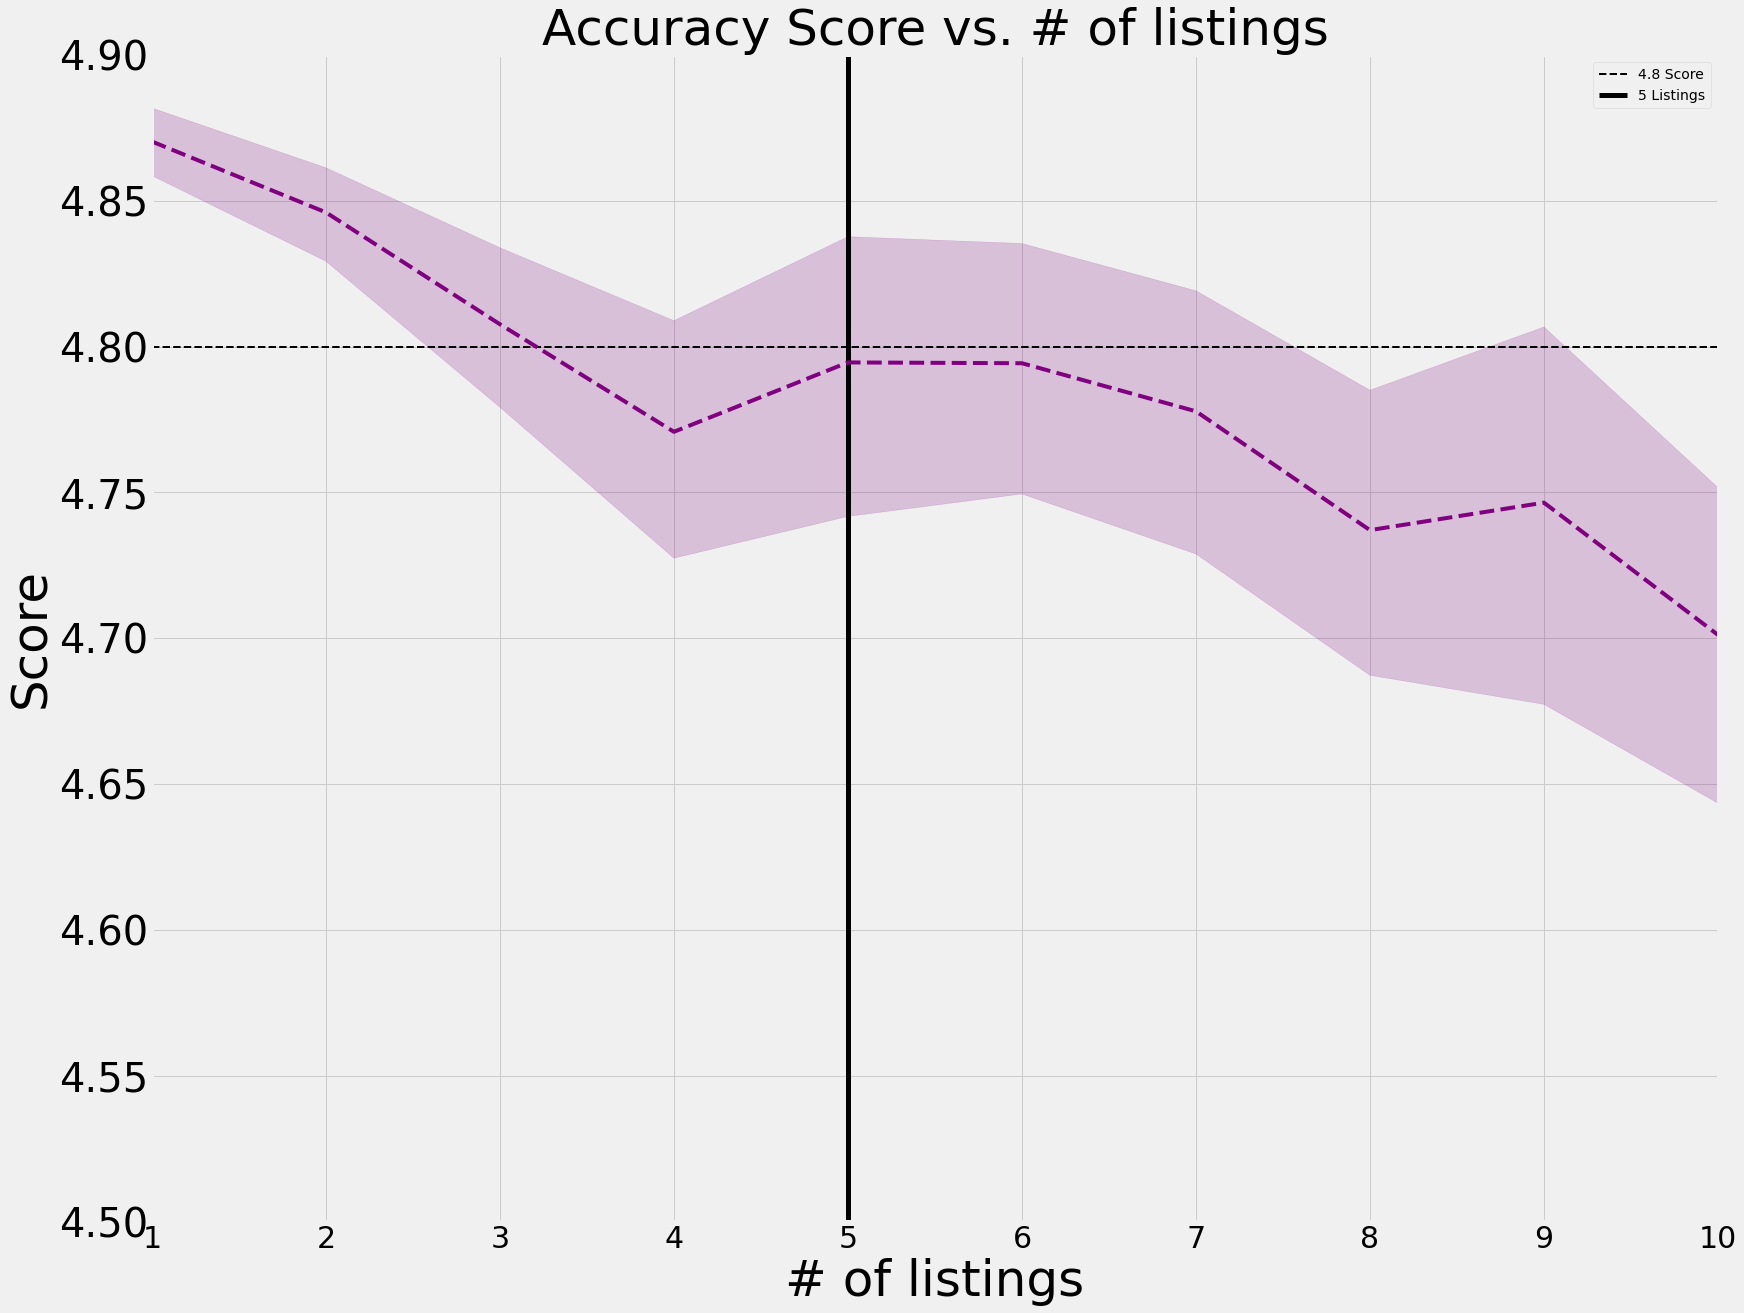

In [213]:
fig, ax = plt.subplots(figsize=(25,20))

ax.axhline(4.8, ls='--', color='black', linewidth=(2), label='4.8 Score')
ax.axvline(5, color='black', linewidth=(5), label='5 Listings')
#ax.axvline(10, color='red', linewidth=(5), label='10 Listings')
#ax.invert_xaxis()
ax.set_xlim(1,10)
ax.set_ylim(4.5, 4.9)
p = sns.lineplot(data=host_listings, x='calculated_host_listings_count', y='review_scores_accuracy',
                 ls = '--', color ='purple' );


p.set_ylabel("Score", fontsize = 50)

p.set_xlabel("# of listings", fontsize = 50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=40)

#ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Accuracy Score vs. # of listings", fontsize = 50)
plt.figsize=(30,20) 

plt.show();

### Recommendation: OPM offer help as an outside party in listing properties accurately. 
- OPM can leverage their experience to ensure that host listings are accurate and not overly embelished.

### <b> #1: Advise Clients to not host more properties than they can manage. </b>
- There is a general downward trend in overall rating as the number of units owned increases. 
- The bottom drops out between 12? and 20 before picking up again.
- I interpret these spikes to show when there are enough units owned to justify bringing in more help in managing them.
- As OPM will mainly be advising owners who are doing everything on their own, I would caution against having more than they can handle to the highest level of excellance.
-- or they should get help in managing their units.

In [139]:
host_listings['calculated_host_listings_count'].value_counts().head(10)

1     2441
2     1109
3      627
4      429
5      315
7      211
8      168
6      162
19     120
13     108
Name: calculated_host_listings_count, dtype: int64

In [140]:
blah2 = host_listings['calculated_host_listings_count'] <= 5
blah2.sum()

4921

In [141]:
host_listings['calculated_host_listings_count'].describe()

count   7038.000
mean       6.838
std        9.617
min        1.000
25%        1.000
50%        2.000
75%        7.000
max       48.000
Name: calculated_host_listings_count, dtype: float64

In [142]:
host_listings.groupby('calculated_host_listings_count').mean().head(10)

price  review_scores_rating  \
calculated_host_listings_count                                 
1                              265.299                 4.844   
2                              218.736                 4.812   
3                              243.046                 4.777   
4                              220.890                 4.745   
5                              239.149                 4.771   
6                              238.475                 4.760   
7                              313.227                 4.747   
8                              360.899                 4.678   
9                              372.280                 4.710   
10                             153.190                 4.640   

                                review_scores_accuracy  \
calculated_host_listings_count                           
1                                                4.870   
2                                                4.846   
3                                                4.808   
4                                                4.771   
5                                                4.795   
6                                                4.794   
7                                                4.778   
8                                                4.737   
9                                                4.746   
10                                               4.701   

                                review_scores_cleanliness  \
calculated_host_listings_count                              
1                                                   4.816   
2                                                   4.805   
3                                                   4.766   
4                                                   4.737   
5                                                   4.772   
6                                                   4.755   
7                                                   4.773   
8                                                   4.687   
9                                                   4.707   
10                                                  4.597   

                                review_scores_checkin  \
calculated_host_listings_count                          
1                                               4.917   
2                                               4.905   
3                                               4.892   
4                                               4.836   
5                                               4.877   
6                                               4.893   
7                                               4.821   
8                                               4.785   
9                                               4.841   
10                                              4.840   

                                review_scores_communication  \
calculated_host_listings_count                                
1                                                     4.915   
2                                                     4.892   
3                                                     4.872   
4                                                     4.832   
5                                                     4.869   
6                                                     4.851   
7                                                     4.835   
8                                                     4.811   
9                                                     4.774   
10                                                    4.791   

                                review_scores_location  review_scores_value  \
calculated_host_listings_count                                                
1                                                4.877                4.789   
2                                                4.863                4.767   
3                                                4.837                4.739 

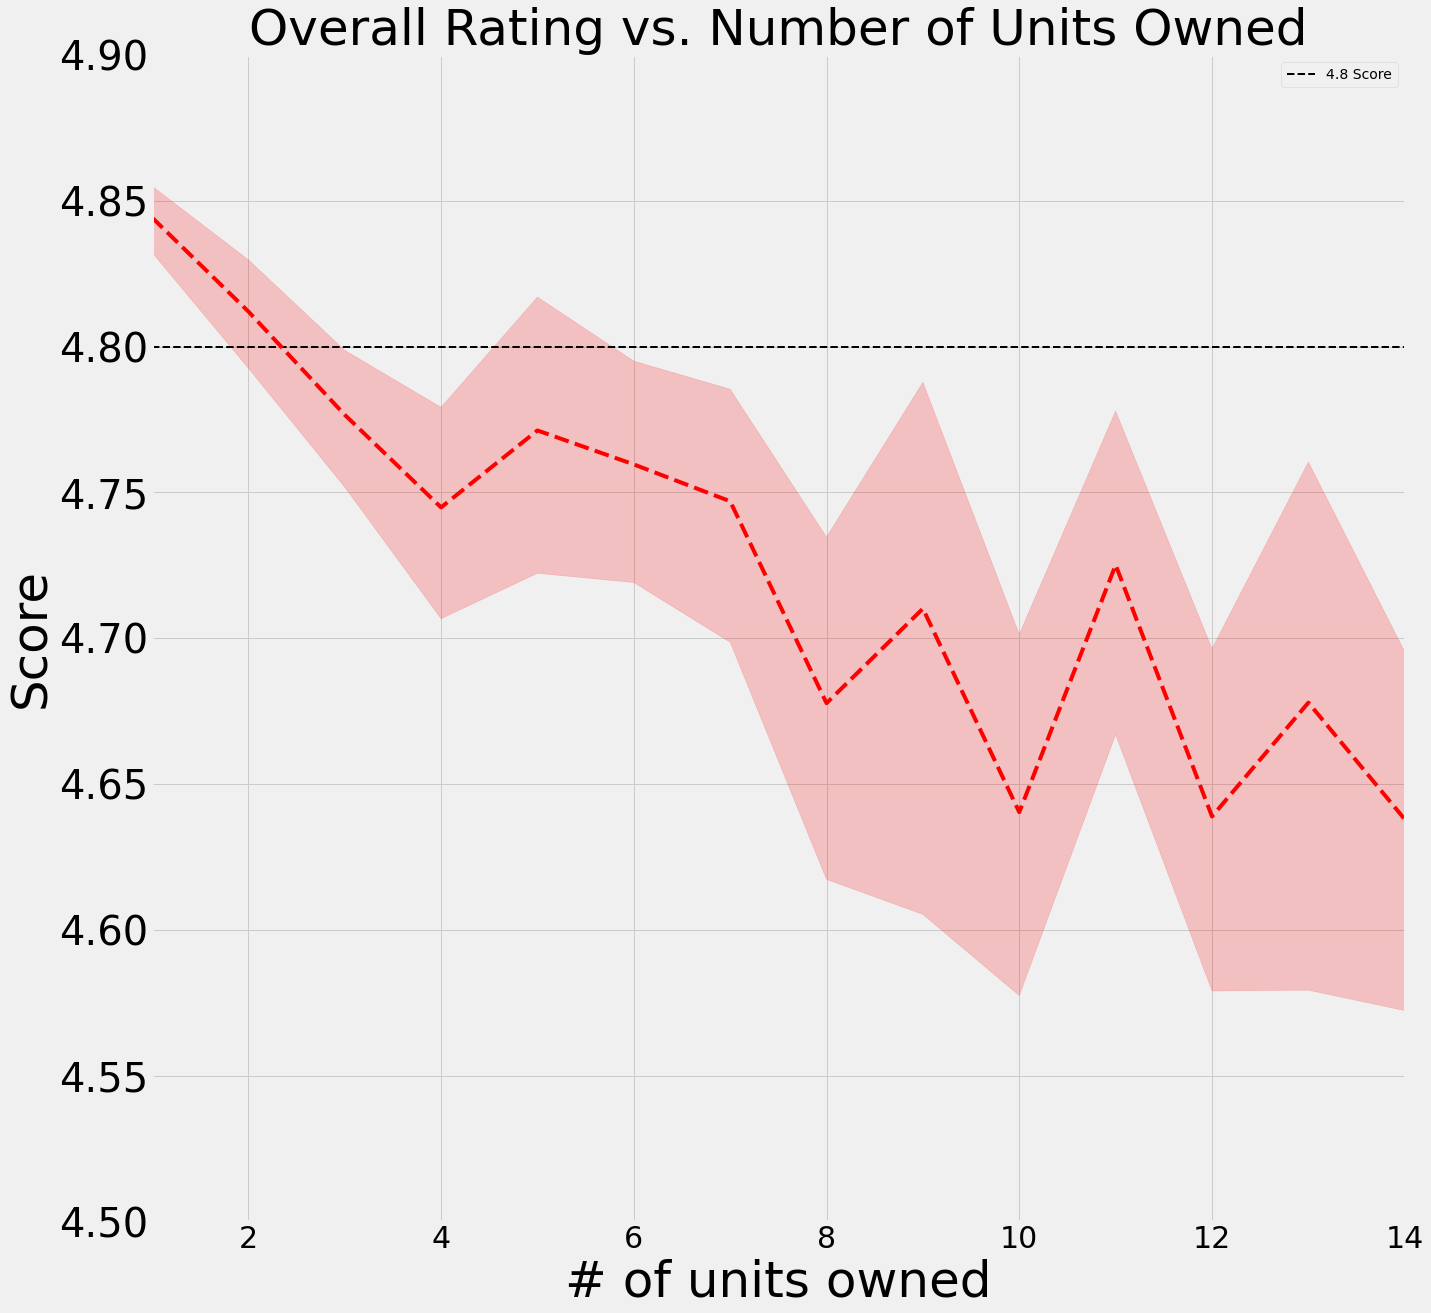

In [221]:
fig, ax = plt.subplots(figsize=(20,20))

ax.axhline(4.8, ls='--', color='black', linewidth=(2), label='4.8 Score')

p = sns.lineplot(data=host_listings, x='calculated_host_listings_count', y='review_scores_rating',
                 ls = '--', color ='red' );

p.set_xlim(1,14)
p.set_ylim(4.5,4.9)


p.set_ylabel("Score", fontsize = 50)

p.set_xlabel("# of units owned", fontsize = 50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=40)

#ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Overall Rating vs. Number of Units Owned", fontsize = 50)
plt.figsize=(30,20) 

plt.show();

### I recommend that single owners manage no more than 8 units on their own.
- Also, I recommend that OPM offer services that help hosts to manage units once they get close to that threashold.
-- ie, prefered cleaning services, help with accurate listings, etc.

### <b> #2: Make 5 Star Reviews Your Priority, Get Superhost Status if Possible</b>
- superhosts show far more consistancy across the board. (ie, having a higher # of rentals does not impact them as much, even though there is an impact)

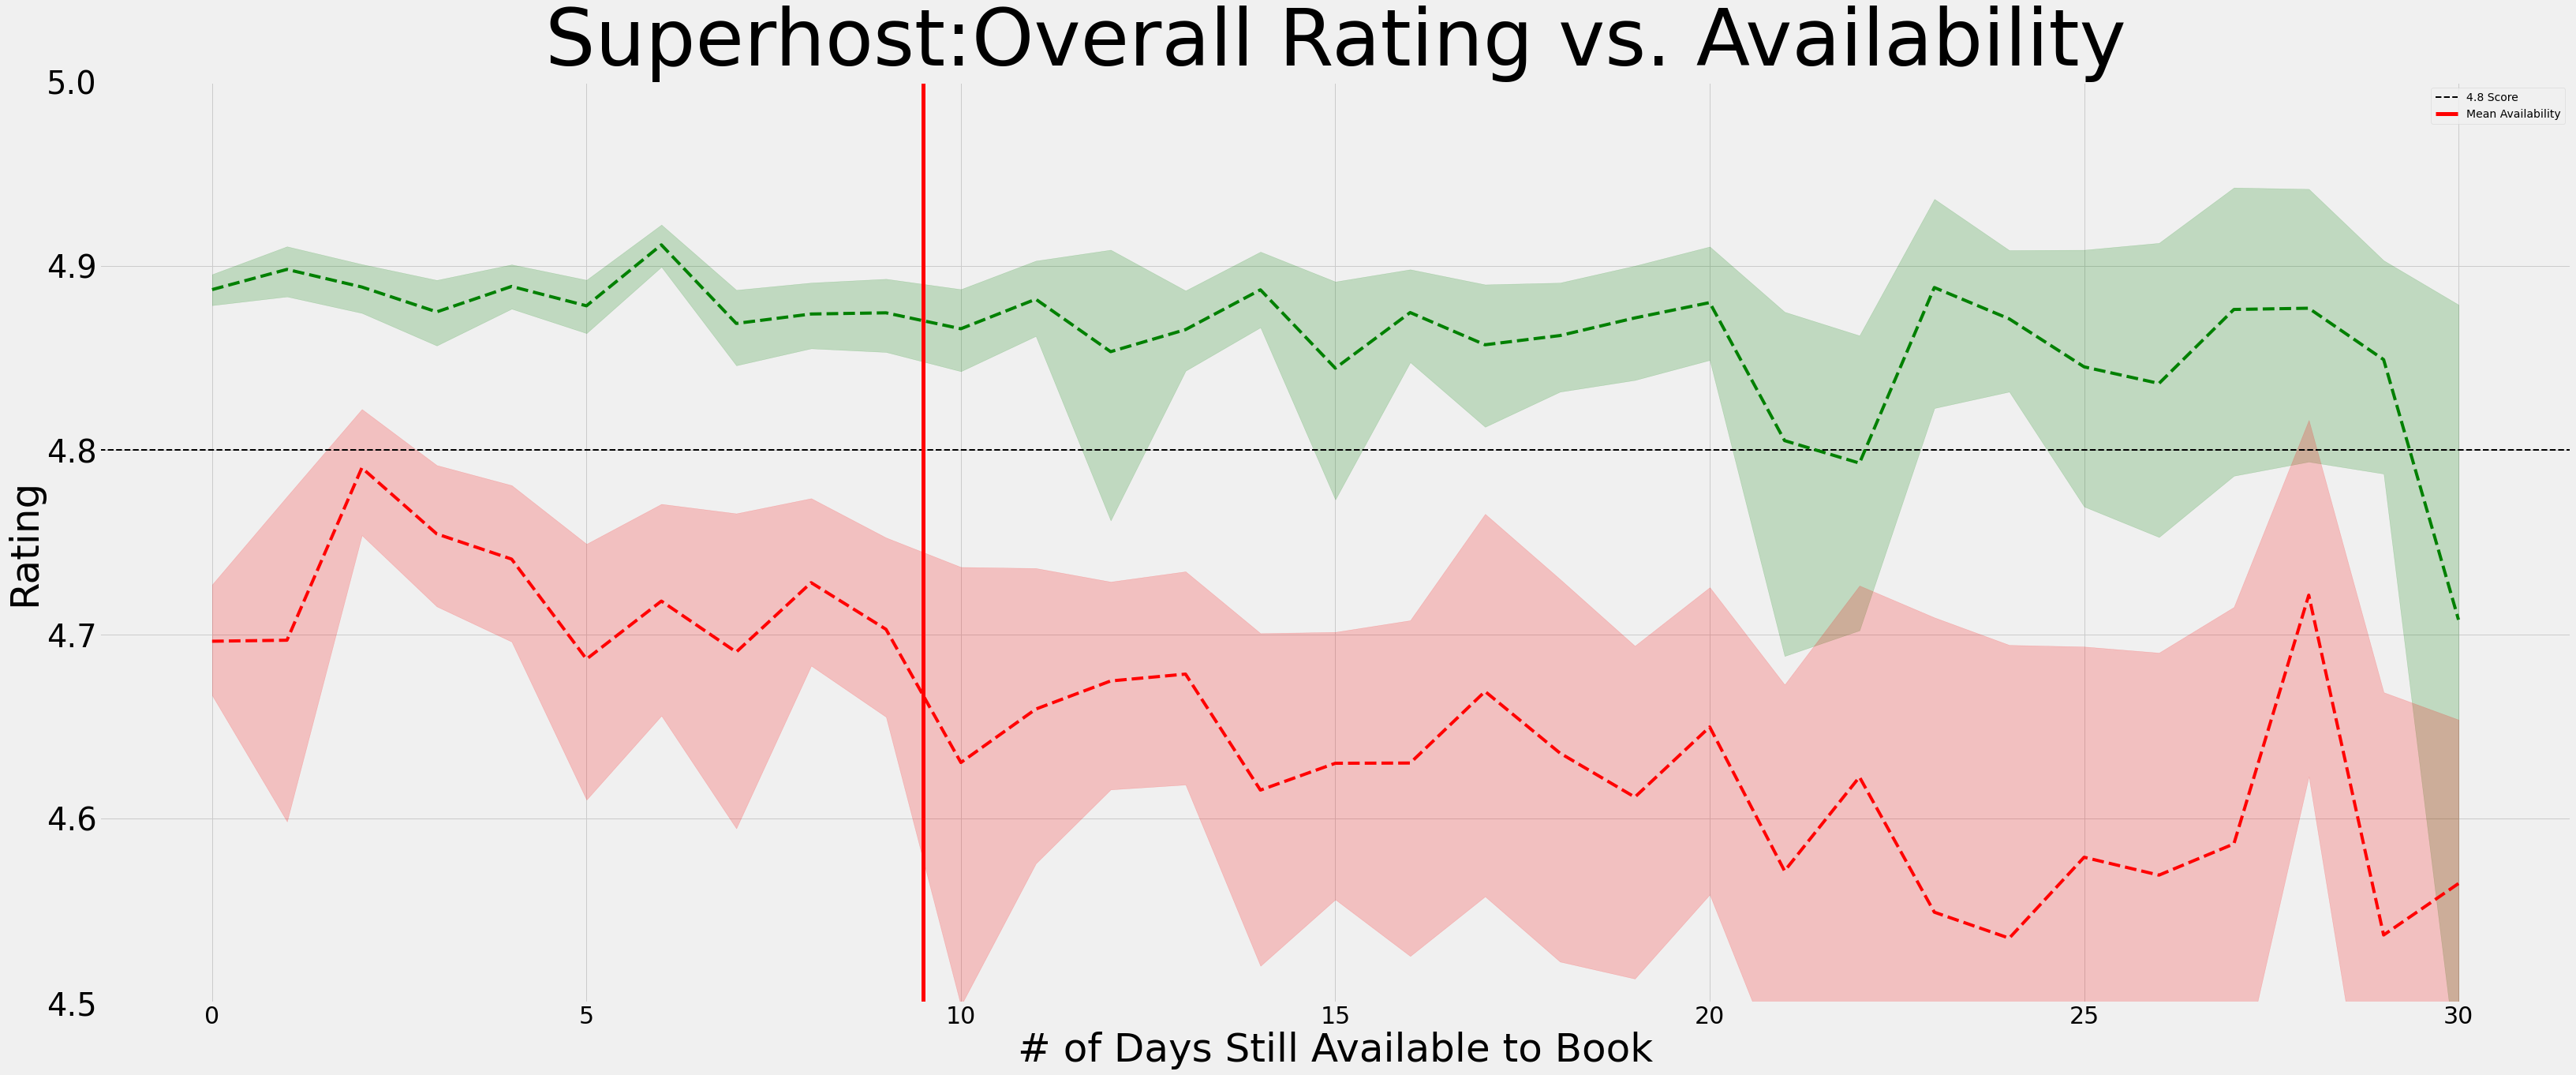

In [190]:
fig, ax = plt.subplots(figsize=(50,20))

ax.axhline(4.8, ls='--', color='black', linewidth=(2), label='4.8 Score')
ax.axvline(9.5 , color='red', linewidth=(5), label='Mean Availability')
#ax.axvline(45 , color='red', linewidth=(2), label='45 Days')
#ax.axvline(60 , color='black', linewidth=(2), label='Two Months')

#ax.invert_xaxis()
ax.set_ylim(4.5, 5)

p = sns.lineplot(data=superhost_listings, x='availability_30', y='review_scores_rating',
                 ls = '--', color ='green' );

p = sns.lineplot(data=not_superhost_listings, x='availability_30', y='review_scores_rating',
                 ls = '--', color ='red' );

#p = sns.lineplot(data=five_star_df, x='availability_30', y='review_scores_rating',
#ls = '--', color ='green' );

#p = sns.lineplot(data=superhost_df, x='calculated_host_listings_count', y='review_scores_cleanliness',
#                 ls = '--', color ='green' );

#p = sns.lineplot(data=instant_bookable_df, x='calculated_host_listings_count', y='review_scores_cleanliness',
#                 ls = '--', color ='red' );


p.set_ylabel("Rating", fontsize = 50)

p.set_xlabel("# of Days Still Available to Book", fontsize = 50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=40)

#ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Superhost:Overall Rating vs. Availability", fontsize = 100)
plt.figsize=(30,20) 

plt.show();

In [147]:
five_star_df = analysis_df[analysis_df['5_star']== True]

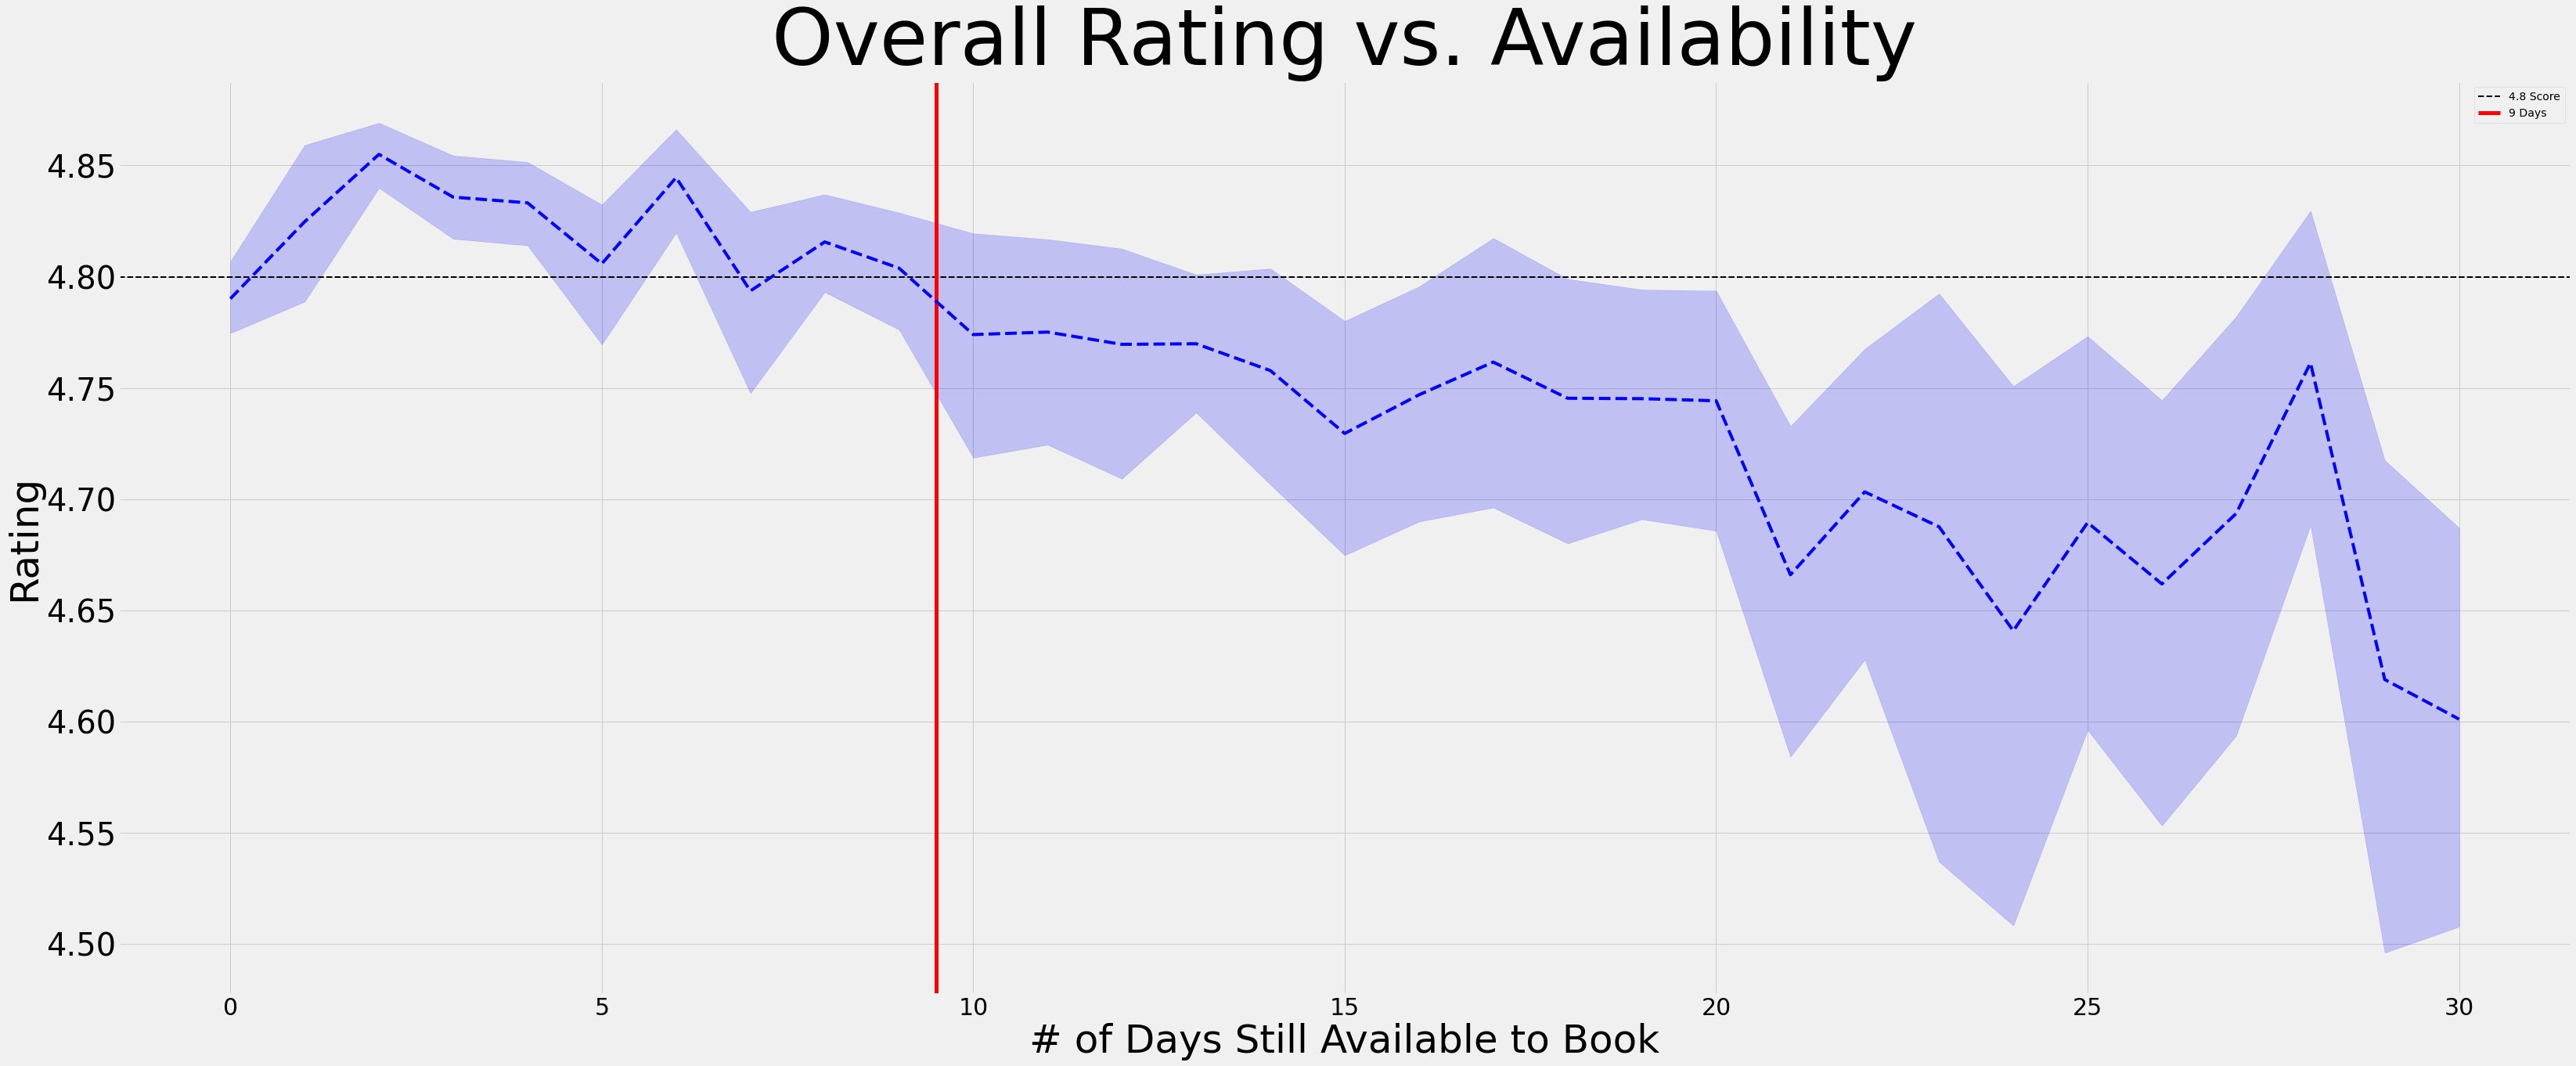

In [191]:
fig, ax = plt.subplots(figsize=(50,20))

ax.axhline(4.8, ls='--', color='black', linewidth=(2), label='4.8 Score')
ax.axvline(9.5 , color='red', linewidth=(5), label='9 Days')
#ax.axvline(45 , color='red', linewidth=(2), label='45 Days')
#ax.axvline(60 , color='black', linewidth=(2), label='Two Months')

#ax.invert_xaxis()


p = sns.lineplot(data=host_listings, x='availability_30', y='review_scores_rating',
                ls = '--', color ='blue' );


#p = sns.lineplot(data=five_star_df, x='availability_30', y='review_scores_rating',
#ls = '--', color ='green' );

#p = sns.lineplot(data=superhost_df, x='calculated_host_listings_count', y='review_scores_cleanliness',
#                 ls = '--', color ='green' );

#p = sns.lineplot(data=instant_bookable_df, x='calculated_host_listings_count', y='review_scores_cleanliness',
#                 ls = '--', color ='red' );


p.set_ylabel("Rating", fontsize = 50)

p.set_xlabel("# of Days Still Available to Book", fontsize = 50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=40)

#ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Overall Rating vs. Availability", fontsize = 100)
plt.figsize=(30,20) 

plt.show();

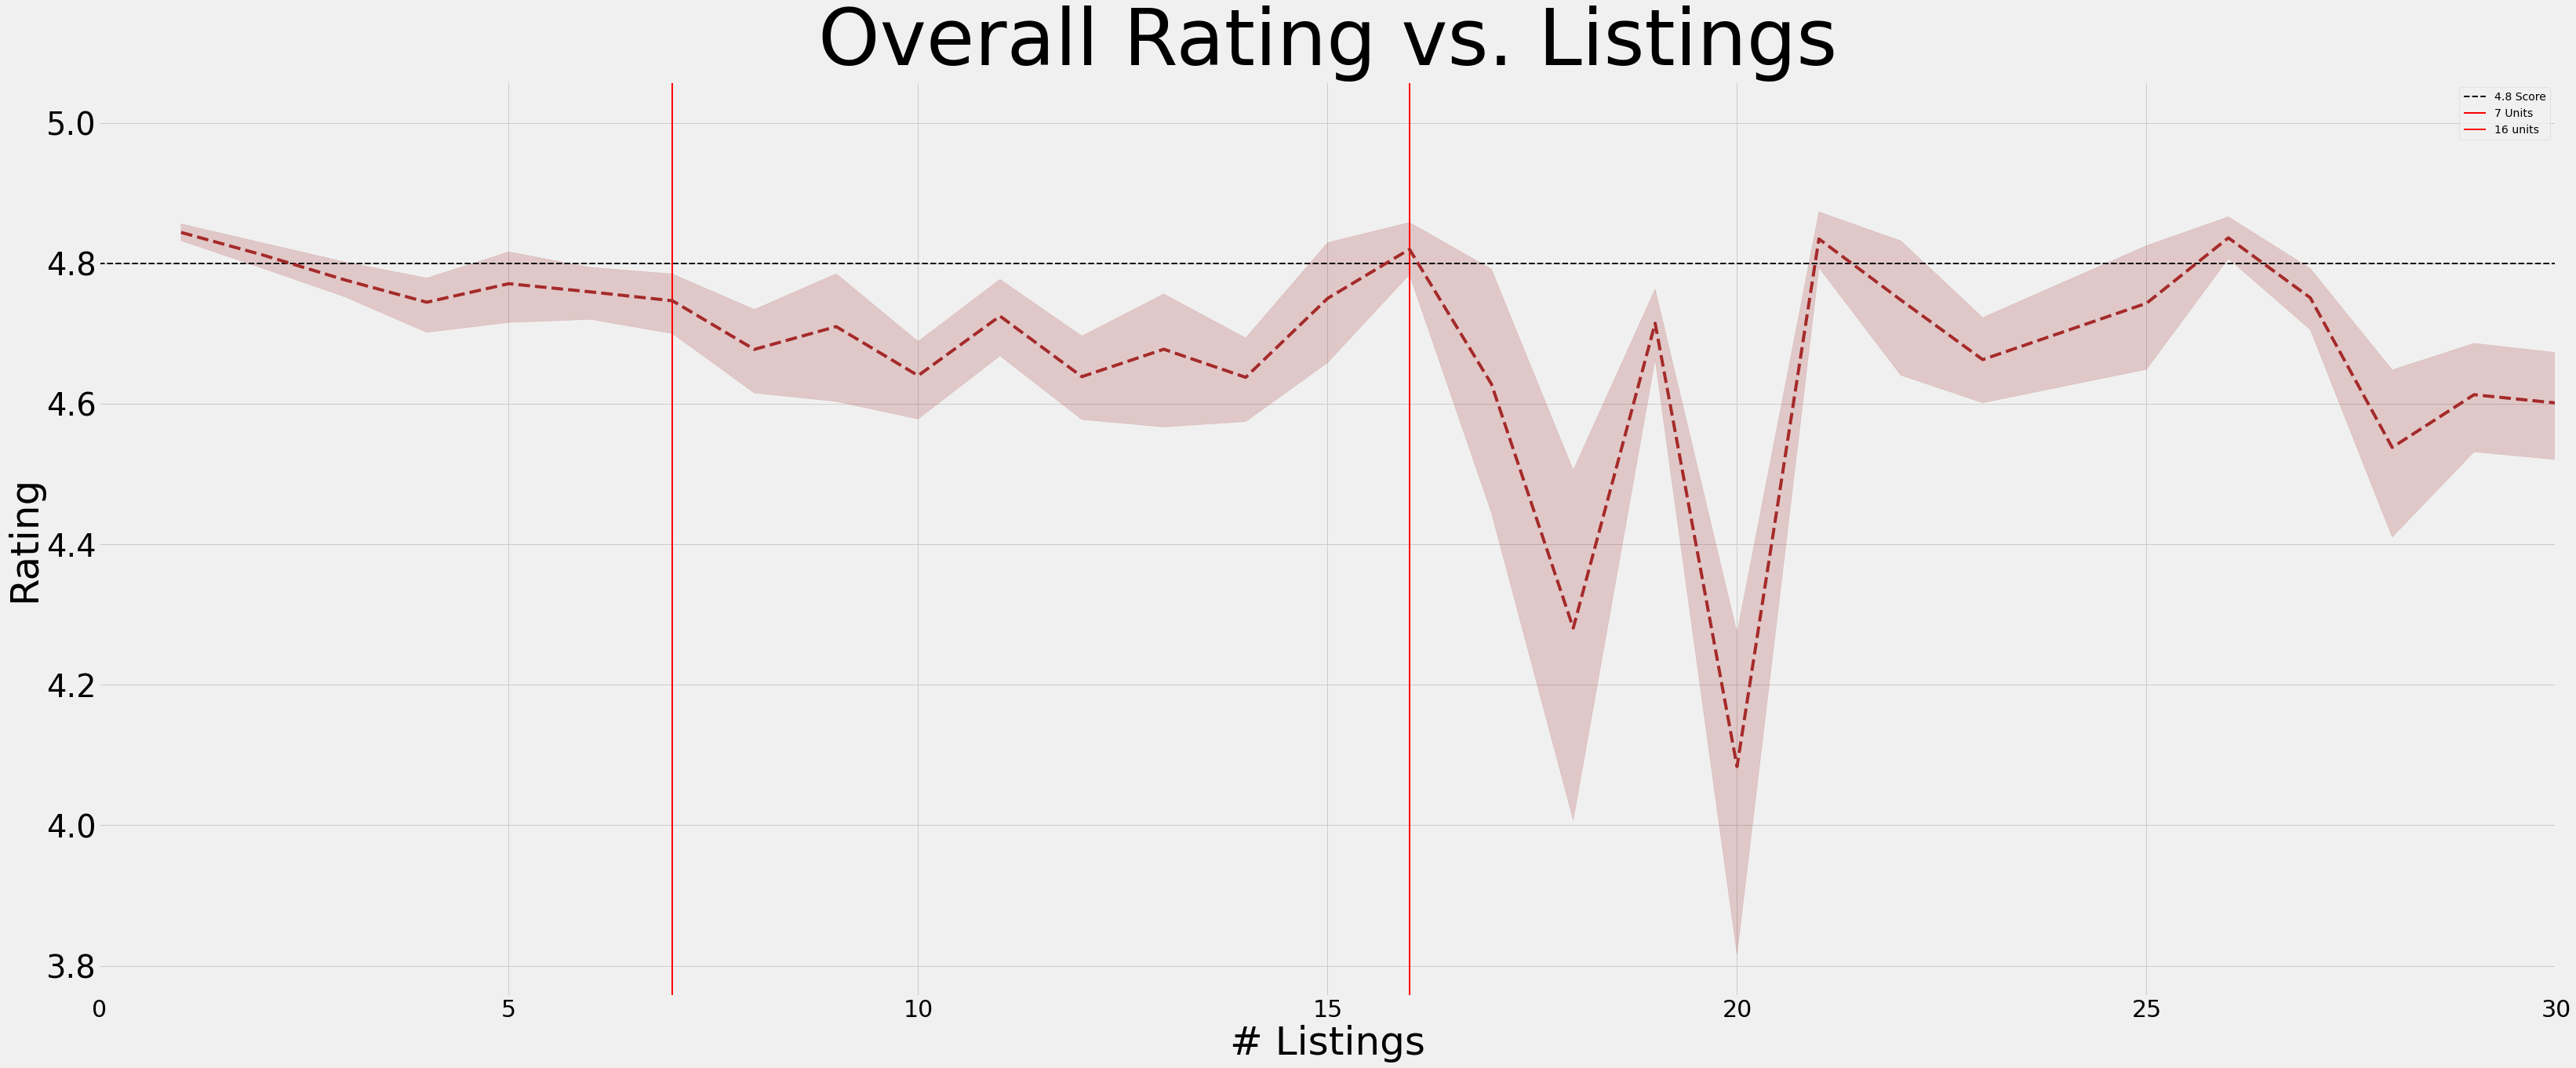

In [149]:
fig, ax = plt.subplots(figsize=(50,20))

ax.axhline(4.8, ls='--', color='black', linewidth=(2), label='4.8 Score')
ax.axvline(7 , color='red', linewidth=(2), label='7 Units')
ax.axvline(16 , color='red', linewidth=(2), label='16 units')
#ax.axvline(60 , color='black', linewidth=(2), label='Two Months')

#ax.invert_xaxis()
ax.set_xlim(0,30)

p = sns.lineplot(data=host_listings, x='calculated_host_listings_count', y='review_scores_rating',
                 ls = '--', color ='brown' );

p.set_ylabel("Rating", fontsize = 50)

p.set_xlabel("# Listings", fontsize = 50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=40)

#ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Overall Rating vs. Listings", fontsize = 100)
plt.figsize=(30,20) 

plt.show();



### Analysis:
- The range of values varies a lot with the lower ratings. However, once you get to 9 days of availability, that range narrows and for the most part is above the 4.8 line.

In [150]:
five_star_df['availability_30'].mean()

8.610004066693778

In [151]:
analysis_df['availability_30'].mean()

9.56158770806658

In [152]:
superhost_listings = host_listings[host_listings['superhost'] == True]

In [153]:
not_superhost_listings = host_listings[host_listings['superhost'] == False]

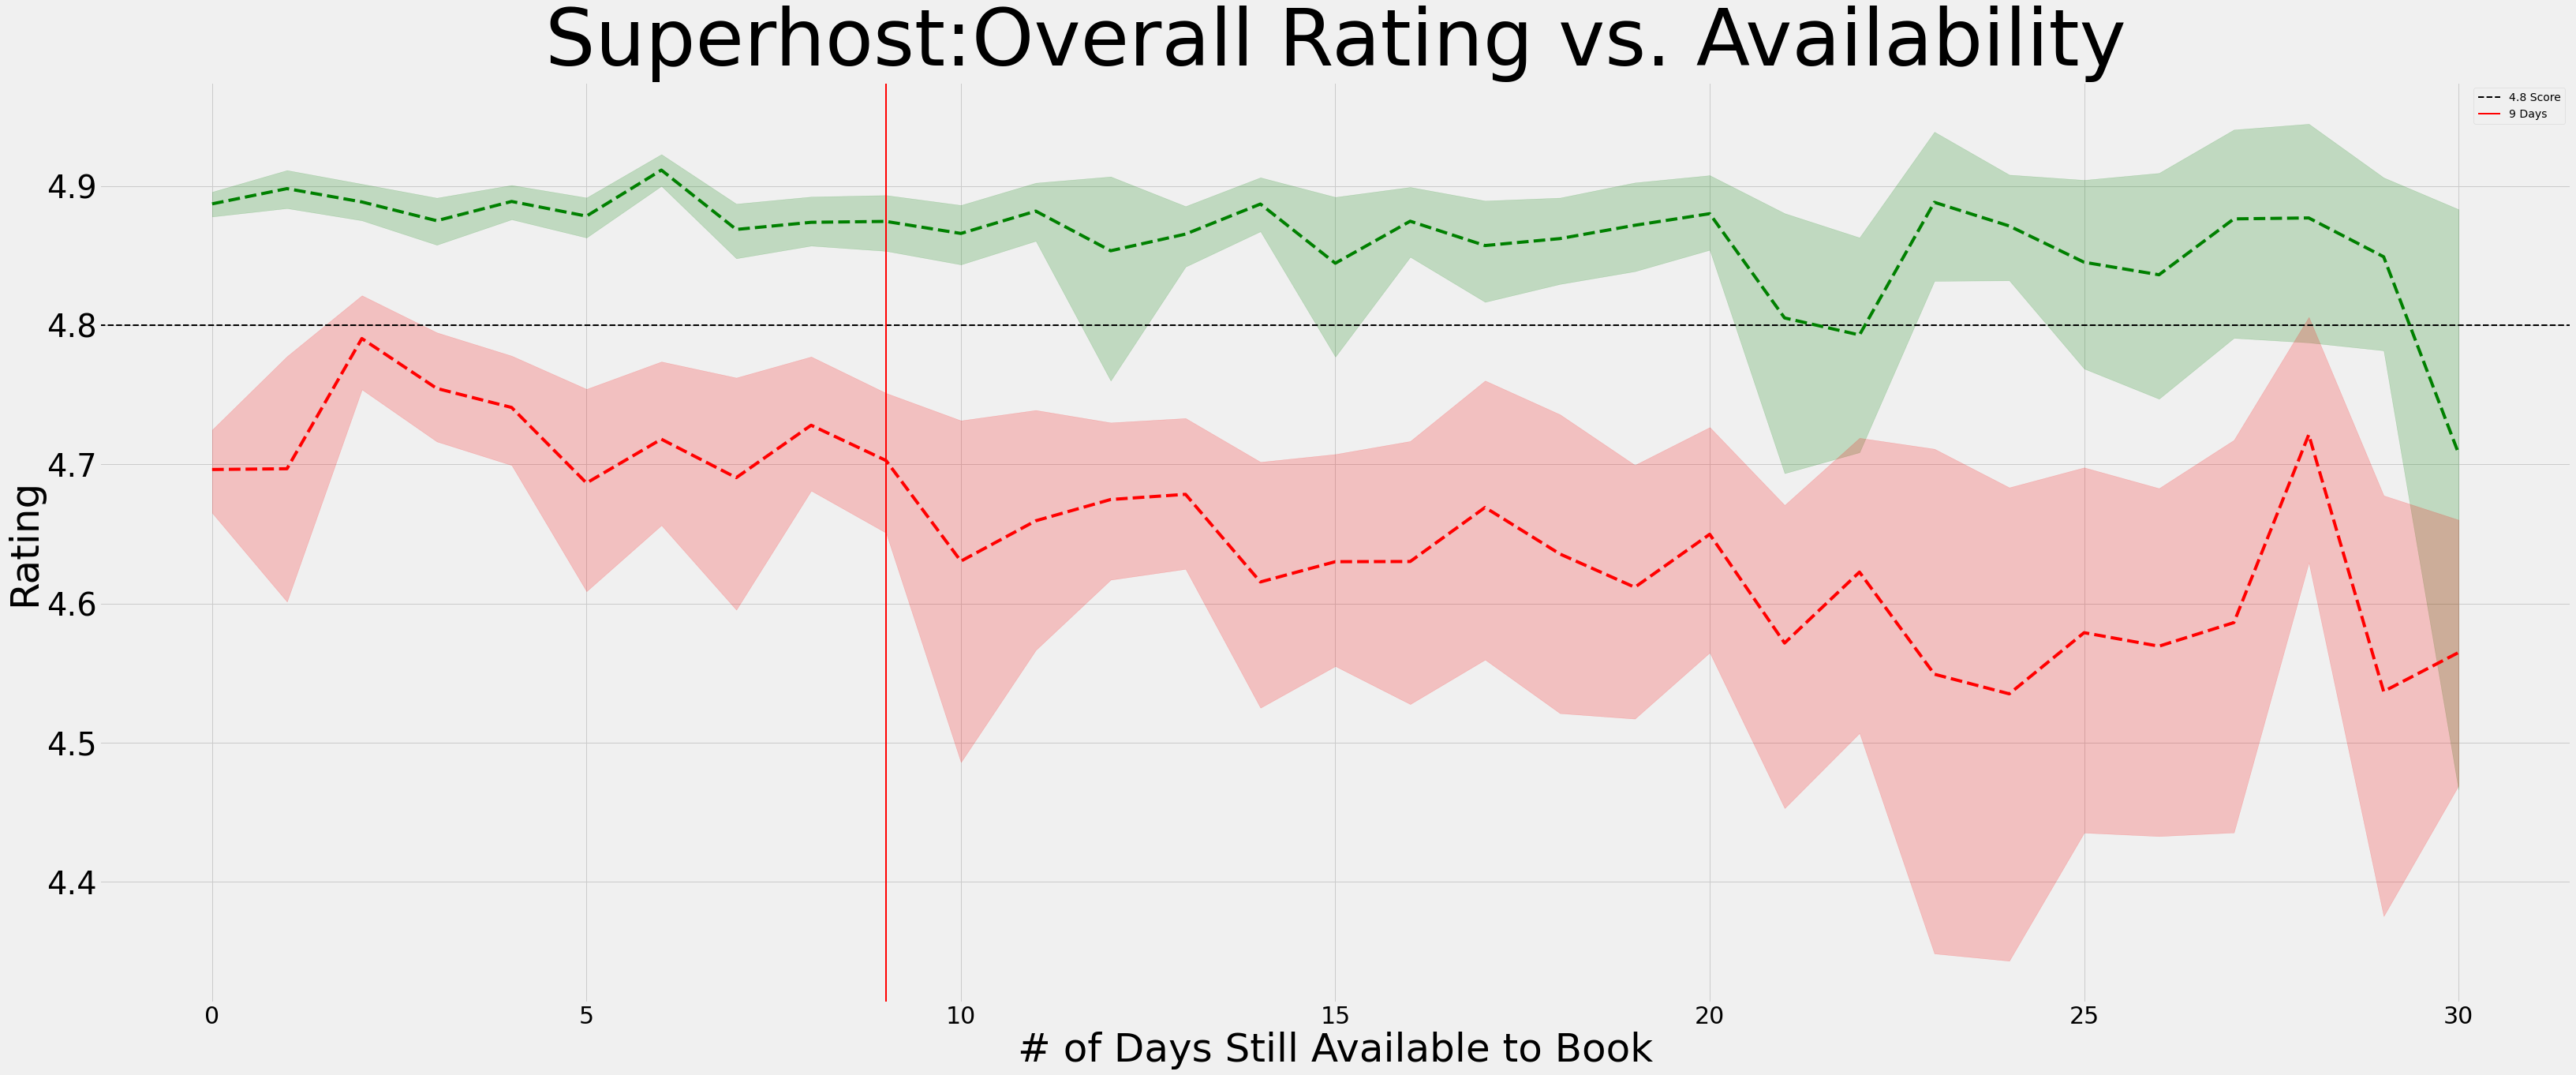

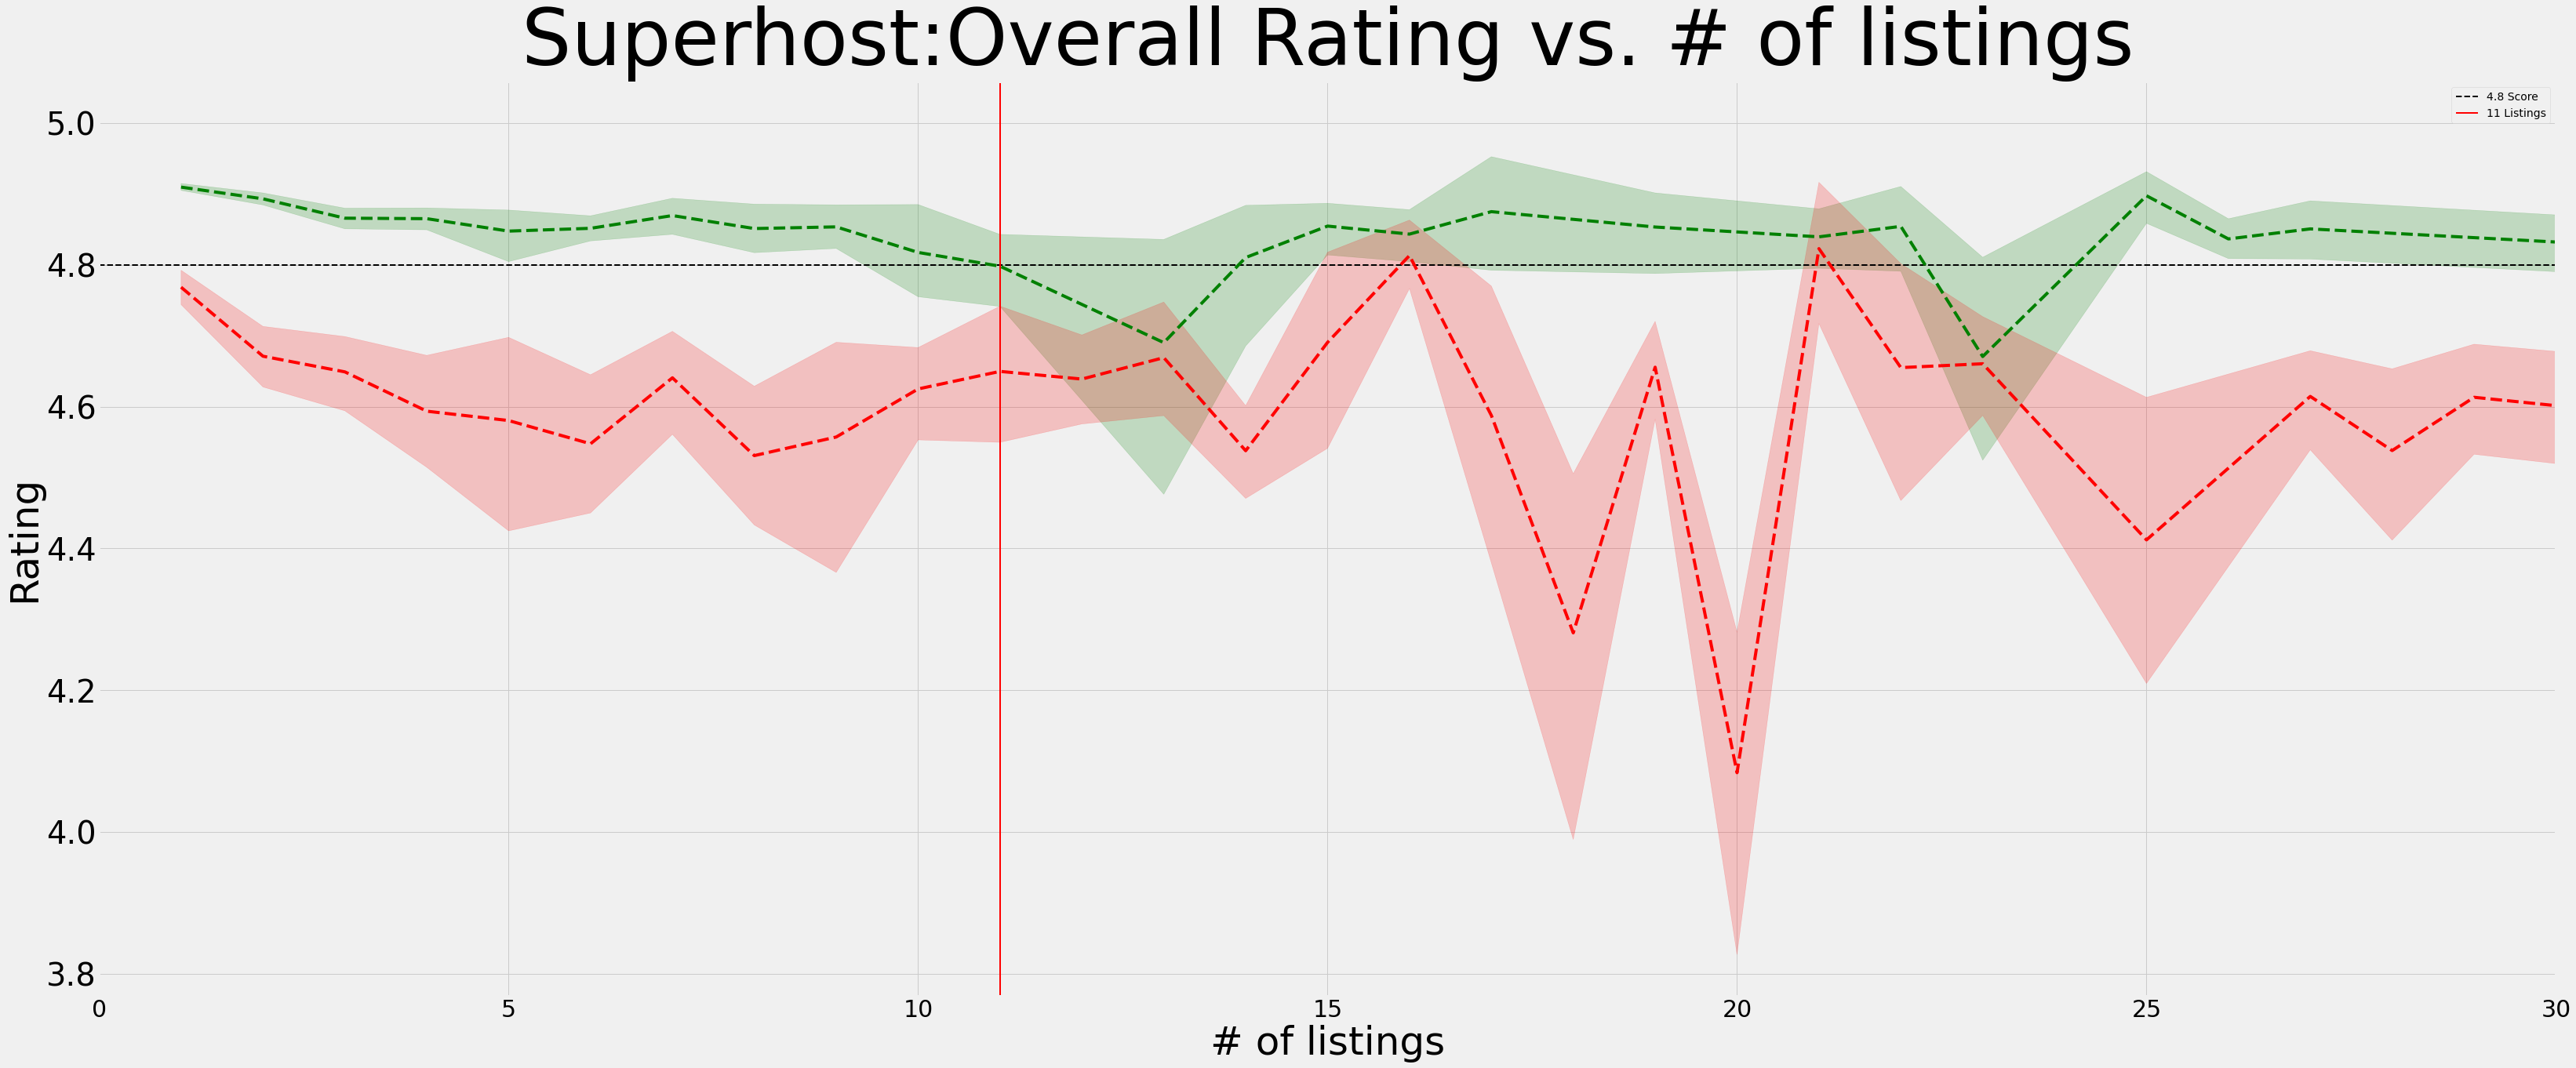

In [155]:
fig, ax = plt.subplots(figsize=(50,20))

ax.axhline(4.8, ls='--', color='black', linewidth=(2), label='4.8 Score')
ax.axvline(11 , color='red', linewidth=(2), label='11 Listings')
#ax.axvline(45 , color='red', linewidth=(2), label='45 Days')
#ax.axvline(60 , color='black', linewidth=(2), label='Two Months')

#ax.invert_xaxis()
ax.set_xlim(0,30)

p = sns.lineplot(data=superhost_listings, x='calculated_host_listings_count', y='review_scores_rating',
                 ls = '--', color ='green' );

p = sns.lineplot(data=not_superhost_listings, x='calculated_host_listings_count', y='review_scores_rating',
                 ls = '--', color ='red' );

p.set_ylabel("Rating", fontsize = 50)

p.set_xlabel("# of listings", fontsize = 50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=40)

#ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Superhost:Overall Rating vs. # of listings", fontsize = 100)
plt.figsize=(30,20) 

plt.show();

### <b> #3: Communication is Critical in Setting Guest Expectations!</b>
- accurate listing
- explanation of airbnb's skewed review system.
- do this without being deceptive or cooercive.

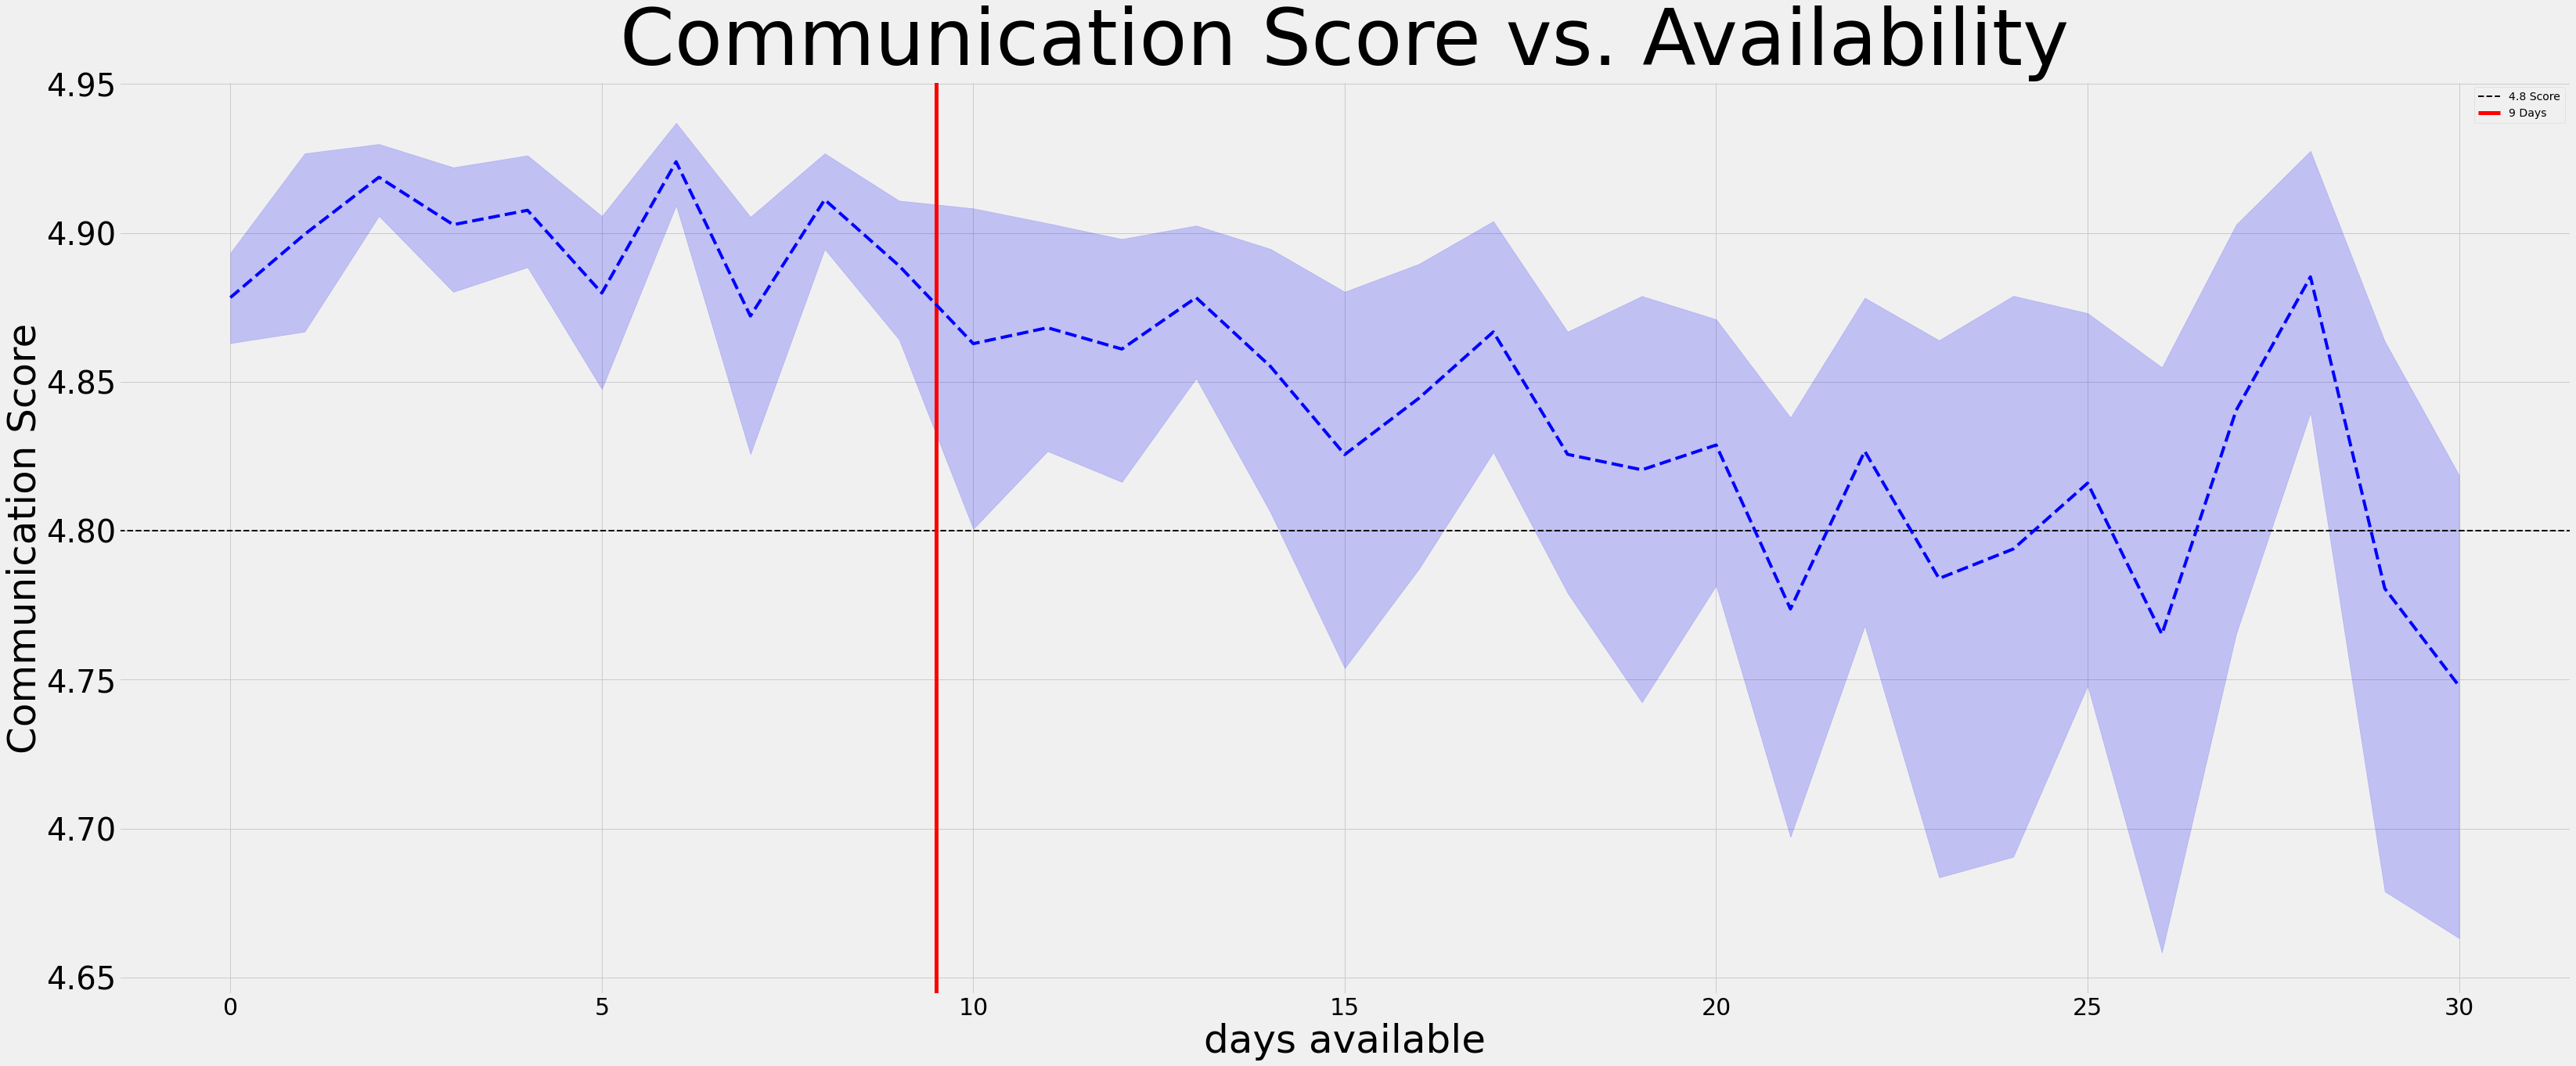

In [192]:
fig, ax = plt.subplots(figsize=(50,20))

ax.axhline(4.8, ls='--', color='black', linewidth=(2), label='4.8 Score')
ax.axvline(9.5 , color='red', linewidth=(5), label='9 Days')

p = sns.lineplot(data=host_listings, x='availability_30', y='review_scores_communication',
                 ls = '--', color ='blue' );

#p = sns.lineplot(data=superhost_df, x='calculated_host_listings_count', y='review_scores_cleanliness',
#                 ls = '--', color ='green' );

#p = sns.lineplot(data=instant_bookable_df, x='calculated_host_listings_count', y='review_scores_cleanliness',
#                 ls = '--', color ='red' );
#ax.invert_xaxis()

p.set_ylabel("Communication Score", fontsize = 50)

p.set_xlabel("days available", fontsize = 50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=40)

#ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Communication Score vs. Availability", fontsize = 100)
plt.figsize=(30,20) 

plt.show();

- It doesn't matter that you have all the metrics and analysis to <b>know</b> that your unit deserves 5-star reviews. Your fate is in the hands of the reviewers. If you really care about getting 5 star reviews (and you should since they are critical to success on AirBnb), you need to explain this to your guests. 

- It is also important to do this without begging, or deceptively cooercing your guests.

- There are many great blog posts and websites dedicated to this. The best solution that I found was this one from https://medium.com/@campbellandia/how-to-avoid-the-dreaded-4-star-review-a-guide-for-airbnb-hosts-cdf482d083fe (accessed 6/21/22)

Further Sources:
- There are many great blog posts and web sites that offer great advice

In [196]:
df['calculated_host_listings_count'].describe()

count   7810.000
mean      18.090
std       40.840
min        1.000
25%        1.000
50%        3.000
75%       13.000
max      219.000
Name: calculated_host_listings_count, dtype: float64

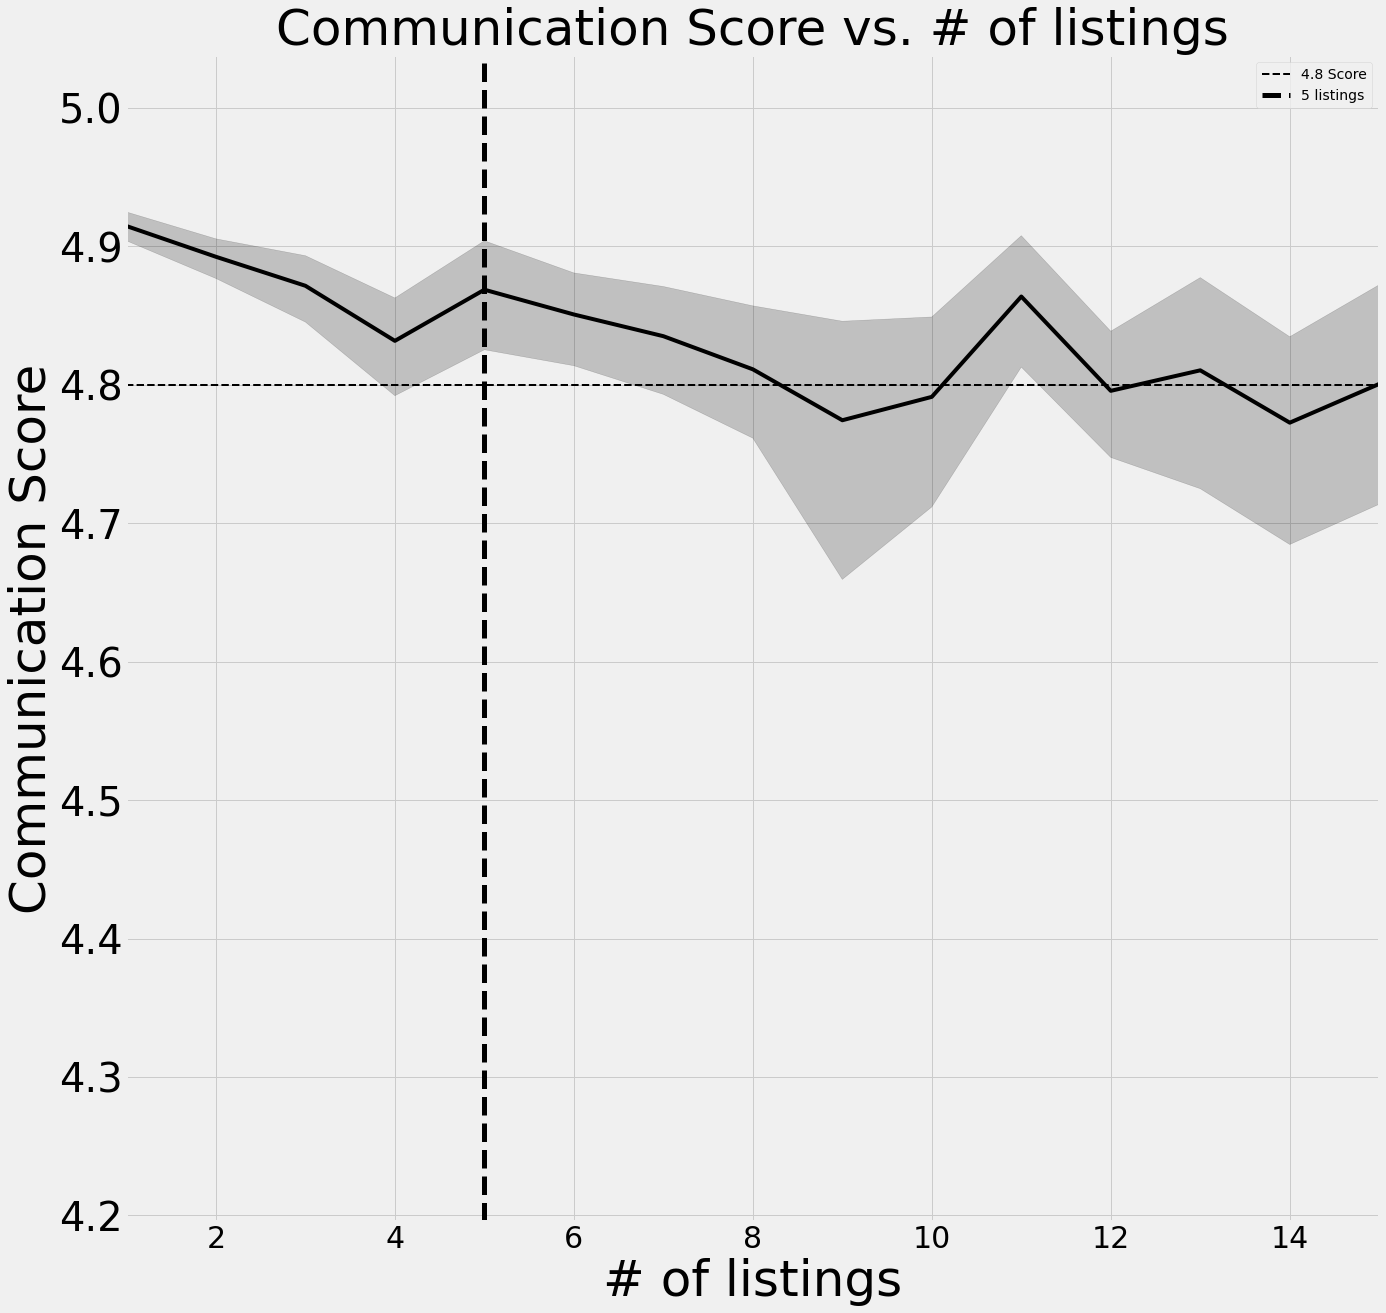

In [222]:
fig, ax = plt.subplots(figsize=(20,20))

ax.axhline(4.8, ls='--', color='black', linewidth=(2), label='4.8 Score')
ax.axvline(5, ls='--', color='black', linewidth=(5), label='5 listings')

ax.set_xlim(1,15)

p = sns.lineplot(data=host_listings, x='calculated_host_listings_count', y='review_scores_communication',
                color ='black' );


p.set_ylabel("Communication Score", fontsize = 50)

p.set_xlabel("# of listings", fontsize = 50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=40)

#ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Communication Score vs. # of listings", fontsize = 50)
plt.figsize=(30,20) 

plt.show();

### <b> #4: Keep everything clean!</b>

- Strategic advantage, as this is one area that units struggle in!
- it's hard to meet peoples expectations, but really strive to excell here.

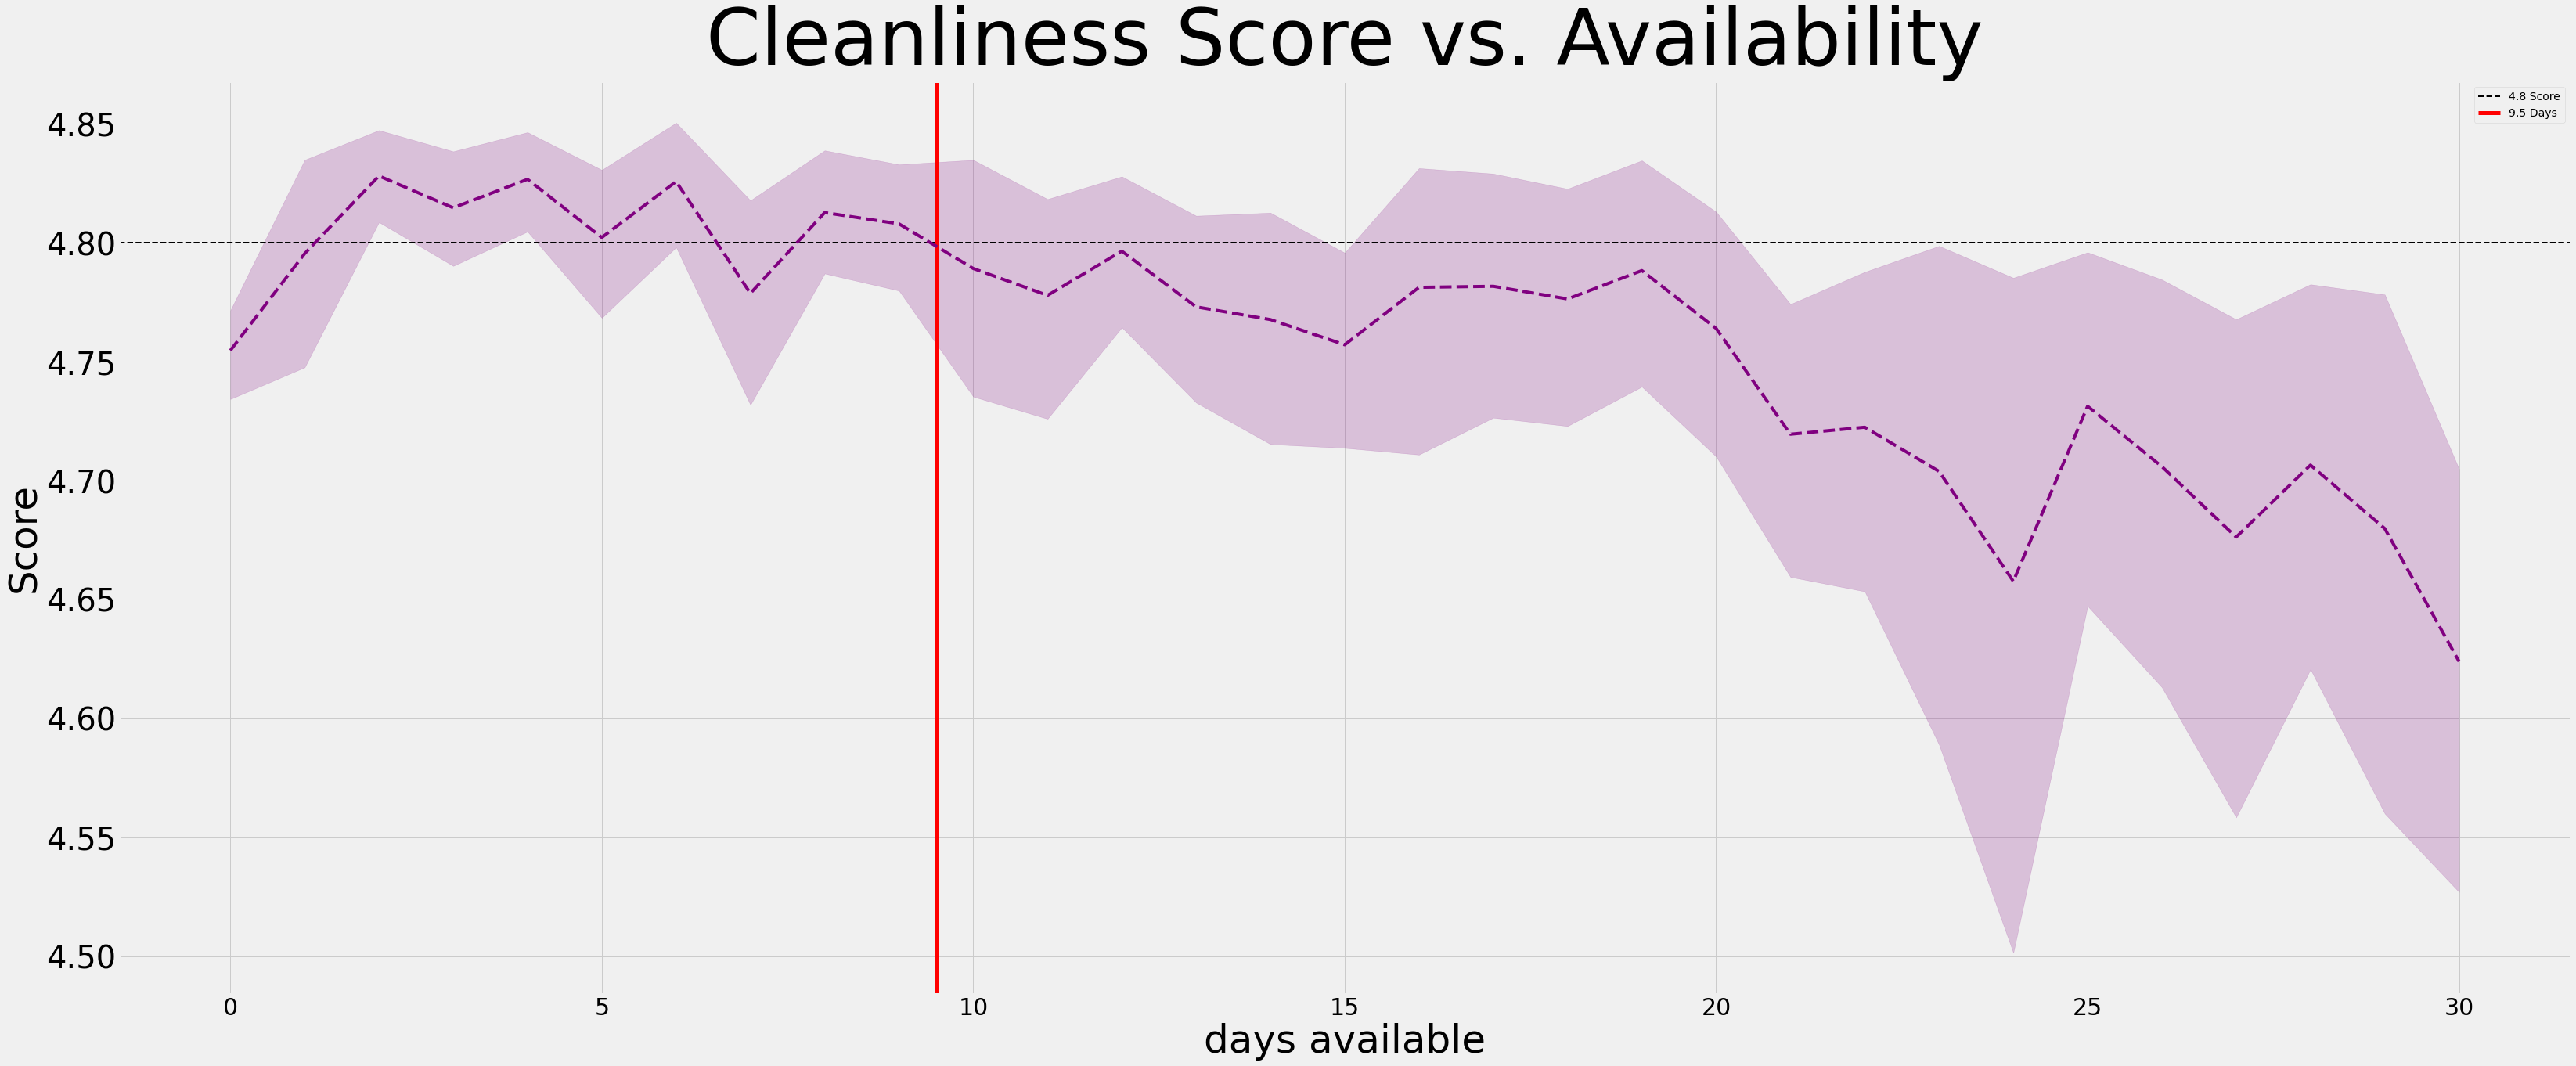

In [198]:
fig, ax = plt.subplots(figsize=(50,20))

ax.axhline(4.8, ls='--', color='black', linewidth=(2), label='4.8 Score')
ax.axvline(9.5, color='red', linewidth=(5), label='9.5 Days')
#ax.invert_xaxis()

p = sns.lineplot(data=host_listings, x='availability_30', y='review_scores_cleanliness',
                 ls = '--', color ='purple' );

#p = sns.lineplot(data=superhost_df, x='calculated_host_listings_count', y='review_scores_cleanliness',
#                 ls = '--', color ='green' );

#p = sns.lineplot(data=instant_bookable_df, x='calculated_host_listings_count', y='review_scores_cleanliness',
#                 ls = '--', color ='red' );


p.set_ylabel("Score", fontsize = 50)

p.set_xlabel("days available", fontsize = 50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=40)

#ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Cleanliness Score vs. Availability", fontsize = 100)
plt.figsize=(30,20) 

plt.show();

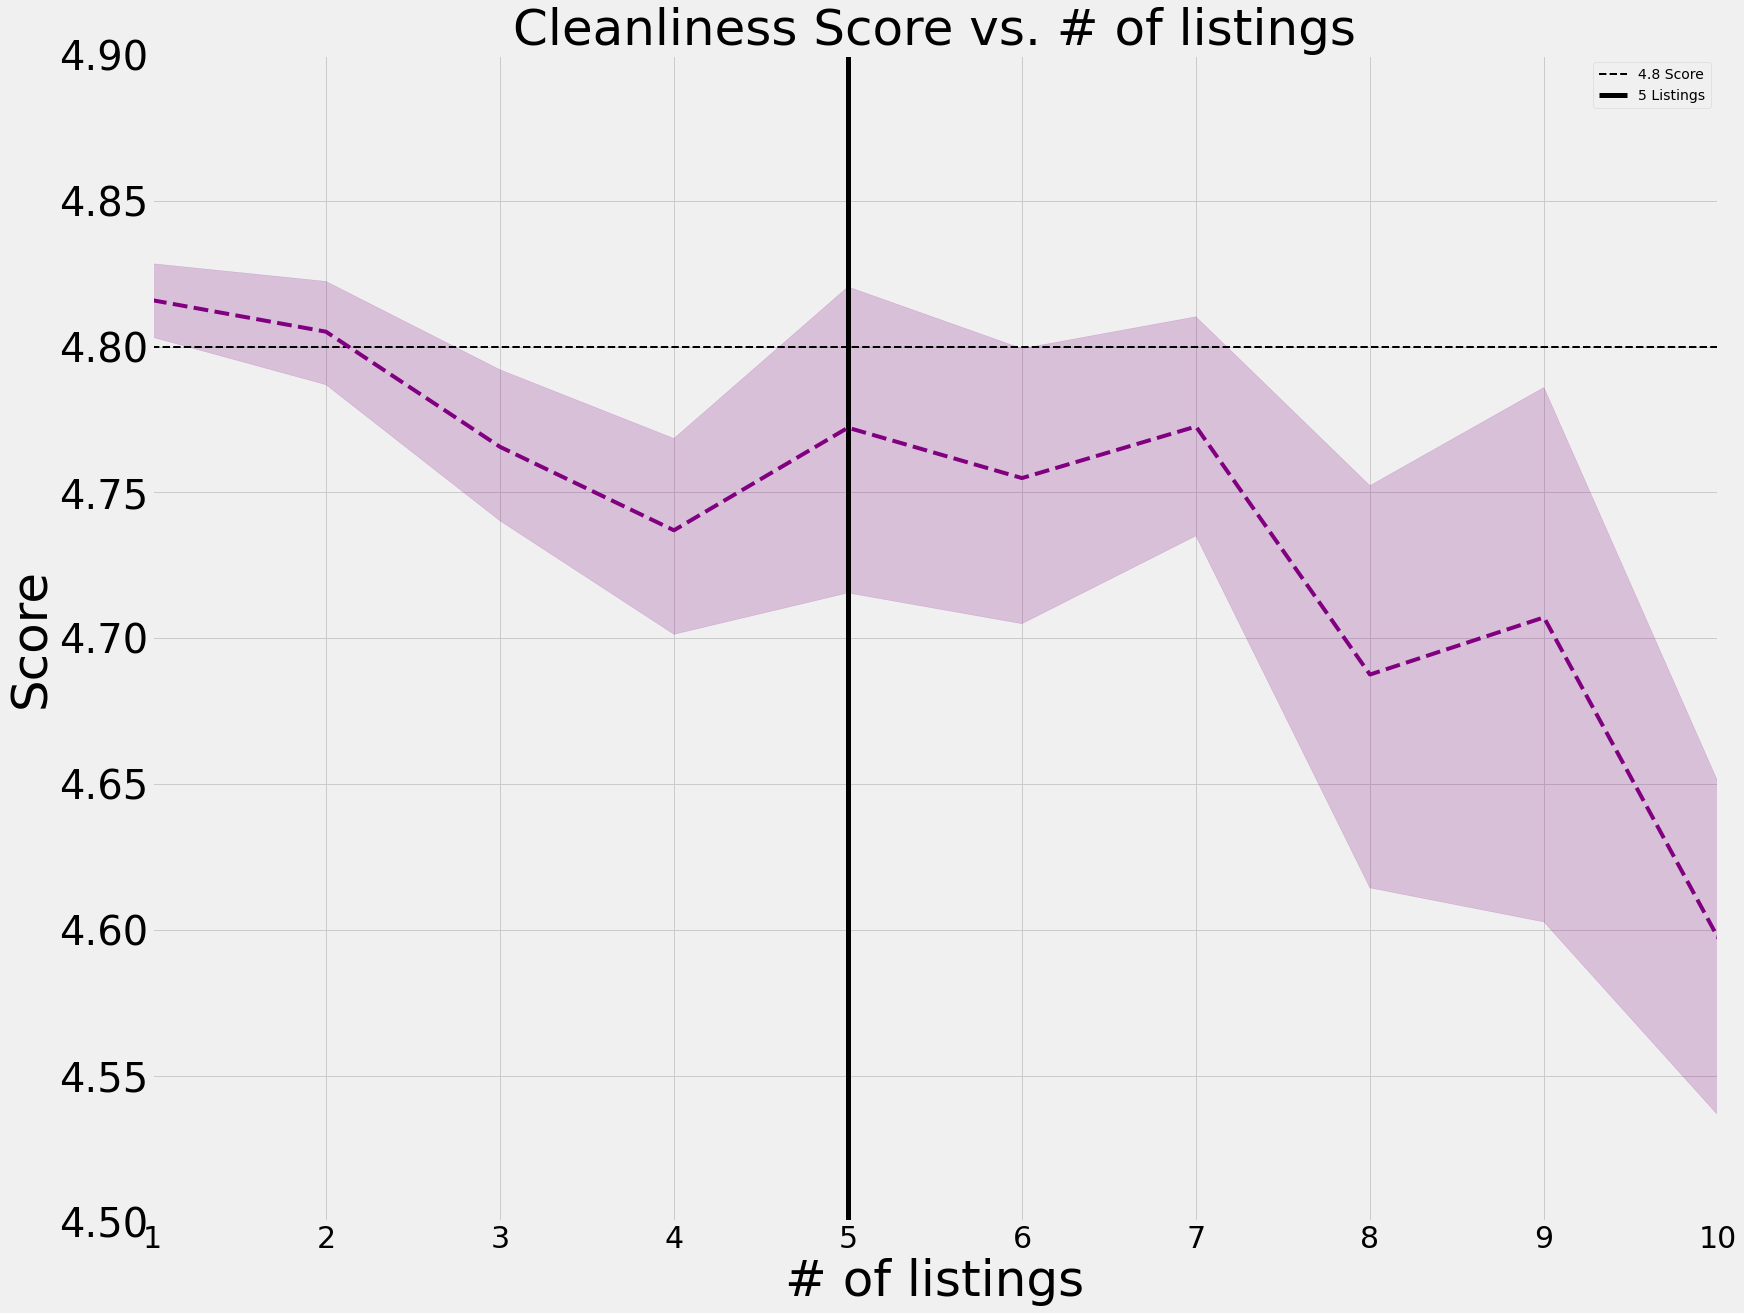

In [210]:
fig, ax = plt.subplots(figsize=(25,20))

ax.axhline(4.8, ls='--', color='black', linewidth=(2), label='4.8 Score')
ax.axvline(5, color='black', linewidth=(5), label='5 Listings')
#ax.axvline(10, color='red', linewidth=(5), label='10 Listings')
#ax.invert_xaxis()
ax.set_xlim(1,10)
ax.set_ylim(4.5, 4.9)
p = sns.lineplot(data=host_listings, x='calculated_host_listings_count', y='review_scores_cleanliness',
                 ls = '--', color ='purple' );


p.set_ylabel("Score", fontsize = 50)

p.set_xlabel("# of listings", fontsize = 50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=40)

#ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Cleanliness Score vs. # of listings", fontsize = 50)
plt.figsize=(30,20) 

plt.show();

In [160]:
host_listings

price  review_scores_rating  review_scores_accuracy  \
0     60.000                 5.000                   5.000   
4971 141.000                 4.960                   4.980   
4976 109.000                 4.830                   4.900   
4978  75.000                 1.000                   1.000   
4981  80.000                 5.000                   5.000   
...      ...                   ...                     ...   
1410 272.000                 5.000                   4.670   
4018 272.000                 5.000                   5.000   
4015 272.000                 5.000                   5.000   
2677 314.000                 5.000                   5.000   
1493 286.000                 5.000                   5.000   

      review_scores_cleanliness  review_scores_checkin  \
0                         5.000                  5.000   
4971                      4.960                  5.000   
4976                      4.860                  4.960   
4978                      1.000                  1.000   
4981                      5.000                  5.000   
...                         ...                    ...   
1410                      5.000                  4.670   
4018                      5.000                  5.000   
4015                      5.000                  5.000   
2677                      5.000                  5.000   
1493                      5.000                  5.000   

      review_scores_communication  review_scores_location  \
0                           5.000                   4.000   
4971                        5.000                   5.000   
4976                        4.960                   4.840   
4978                        1.000                   1.000   
4981                        5.000                   5.000   
...                           ...                     ...   
1410                        5.000                   4.670   
4018                        5.000                   5.000   
4015                        5.000                   5.000   
2677                        5.000                   5.000   
1493                        5.000                   5.000   

      review_scores_value  accommodates  bedrooms  ...  host_response_100  \
0                   5.000             2     1.000  ...               True   
4971                4.960             2     1.000  ...               True   
4976                4.860             5     2.000  ...               True   
4978                1.000             2     1.000  ...              False   
4981                5.000             2     1.000  ...               True   
...                   ...           ...       ...  ...                ...   
1410                4.670             6     2.000  ...               True   
4018                4.000             6     2.000  ...               True   
4015                4.000             6     2.000  ...               True   
2677                5.000             6     2.000  ...               True   
1493                5.000             6     2.000  ...               True   

      superhost 5_star accuracy_5 cleanliness_5  checkin_5  location_5  \
0         False   True       True          True       True       False   
4971       True   True      False         False       True        True   
4976       True   True      False         False      False       False   
4978      False  False      False         False      False       False   
4981      False   True       True          True       True        True   
...         ...    ...        ...           ...        ...         ...   
1410      False   True      False          True      False       False   
4018      False   True       True          True       True        True   
4015      False   True       True          True       True        True   
2677      False   True       True          True       True        True   
1493      False   True       True          True       True        True   

      value_5  com

In [163]:
host_listings

price  review_scores_rating  review_scores_accuracy  \
0     60.000                 5.000                   5.000   
4971 141.000                 4.960                   4.980   
4976 109.000                 4.830                   4.900   
4978  75.000                 1.000                   1.000   
4981  80.000                 5.000                   5.000   
...      ...                   ...                     ...   
1410 272.000                 5.000                   4.670   
4018 272.000                 5.000                   5.000   
4015 272.000                 5.000                   5.000   
2677 314.000                 5.000                   5.000   
1493 286.000                 5.000                   5.000   

      review_scores_cleanliness  review_scores_checkin  \
0                         5.000                  5.000   
4971                      4.960                  5.000   
4976                      4.860                  4.960   
4978                      1.000                  1.000   
4981                      5.000                  5.000   
...                         ...                    ...   
1410                      5.000                  4.670   
4018                      5.000                  5.000   
4015                      5.000                  5.000   
2677                      5.000                  5.000   
1493                      5.000                  5.000   

      review_scores_communication  review_scores_location  \
0                           5.000                   4.000   
4971                        5.000                   5.000   
4976                        4.960                   4.840   
4978                        1.000                   1.000   
4981                        5.000                   5.000   
...                           ...                     ...   
1410                        5.000                   4.670   
4018                        5.000                   5.000   
4015                        5.000                   5.000   
2677                        5.000                   5.000   
1493                        5.000                   5.000   

      review_scores_value  accommodates  bedrooms  ...  host_response_100  \
0                   5.000             2     1.000  ...               True   
4971                4.960             2     1.000  ...               True   
4976                4.860             5     2.000  ...               True   
4978                1.000             2     1.000  ...              False   
4981                5.000             2     1.000  ...               True   
...                   ...           ...       ...  ...                ...   
1410                4.670             6     2.000  ...               True   
4018                4.000             6     2.000  ...               True   
4015                4.000             6     2.000  ...               True   
2677                5.000             6     2.000  ...               True   
1493                5.000             6     2.000  ...               True   

      superhost 5_star accuracy_5 cleanliness_5  checkin_5  location_5  \
0         False   True       True          True       True       False   
4971       True   True      False         False       True        True   
4976       True   True      False         False      False       False   
4978      False  False      False         False      False       False   
4981      False   True       True          True       True        True   
...         ...    ...        ...           ...        ...         ...   
1410      False   True      False          True      False       False   
4018      False   True       True          True       True        True   
4015      False   True       True          True       True        True   
2677      False   True       True          True       True        True   
1493      False   True       True          True       True        True   

      value_5  com

In [164]:
instant_bookable_df = host_listings[host_listings['instant_bookable'] == True]
not_instant_bookable_df = host_listings[host_listings['instant_bookable'] == False]

In [165]:
instant_bookable_df

price  review_scores_rating  review_scores_accuracy  \
0     60.000                 5.000                   5.000   
4990 140.000                 4.780                   4.890   
4999 130.000                 4.640                   4.770   
5019  40.000                 4.440                   4.510   
5032 128.000                 4.870                   4.900   
...      ...                   ...                     ...   
4531 173.000                 4.830                   4.830   
6626 298.000                 4.580                   4.760   
6624 206.000                 4.740                   4.760   
4472 244.000                 4.710                   4.750   
670  330.000                 4.710                   4.790   

      review_scores_cleanliness  review_scores_checkin  \
0                         5.000                  5.000   
4990                      4.890                  4.940   
4999                      4.400                  4.900   
5019                      4.310                  4.540   
5032                      4.850                  4.930   
...                         ...                    ...   
4531                      4.880                  4.930   
6626                      4.550                  4.910   
6624                      4.760                  5.000   
4472                      4.780                  4.880   
670                       4.660                  4.920   

      review_scores_communication  review_scores_location  \
0                           5.000                   4.000   
4990                        4.560                   4.780   
4999                        4.790                   4.860   
5019                        4.720                   4.690   
5032                        4.900                   4.930   
...                           ...                     ...   
4531                        4.930                   4.950   
6626                        4.940                   4.970   
6624                        4.950                   5.000   
4472                        4.980                   4.950   
670                         4.950                   4.840   

      review_scores_value  accommodates  bedrooms  ...  host_response_100  \
0                   5.000             2     1.000  ...               True   
4990                4.670             2     1.000  ...              False   
4999                4.650             4     1.000  ...              False   
5019                4.590             4     1.000  ...              False   
5032                4.860             2     1.000  ...               True   
...                   ...           ...       ...  ...                ...   
4531                4.730             3     1.000  ...               True   
6626                4.580             5     2.000  ...               True   
6624                4.660             4     1.000  ...               True   
4472                4.740             5     2.000  ...               True   
670                 4.740             6     3.000  ...               True   

      superhost 5_star accuracy_5 cleanliness_5  checkin_5  location_5  \
0         False   True       True          True       True       False   
4990       True  False      False         False      False       False   
4999      False  False      False         False      False       False   
5019      False  False      False         False      False       False   
5032       True   True      False         False      False       False   
...         ...    ...        ...           ...        ...         ...   
4531       True   True      False         False      False       False   
6626       True  False      False         False      False       False   
6624       True  False      False         False       True        True   
4472       True  False      False         False      False       False   
670        True  False      False         False      False       False   

      value_5  com

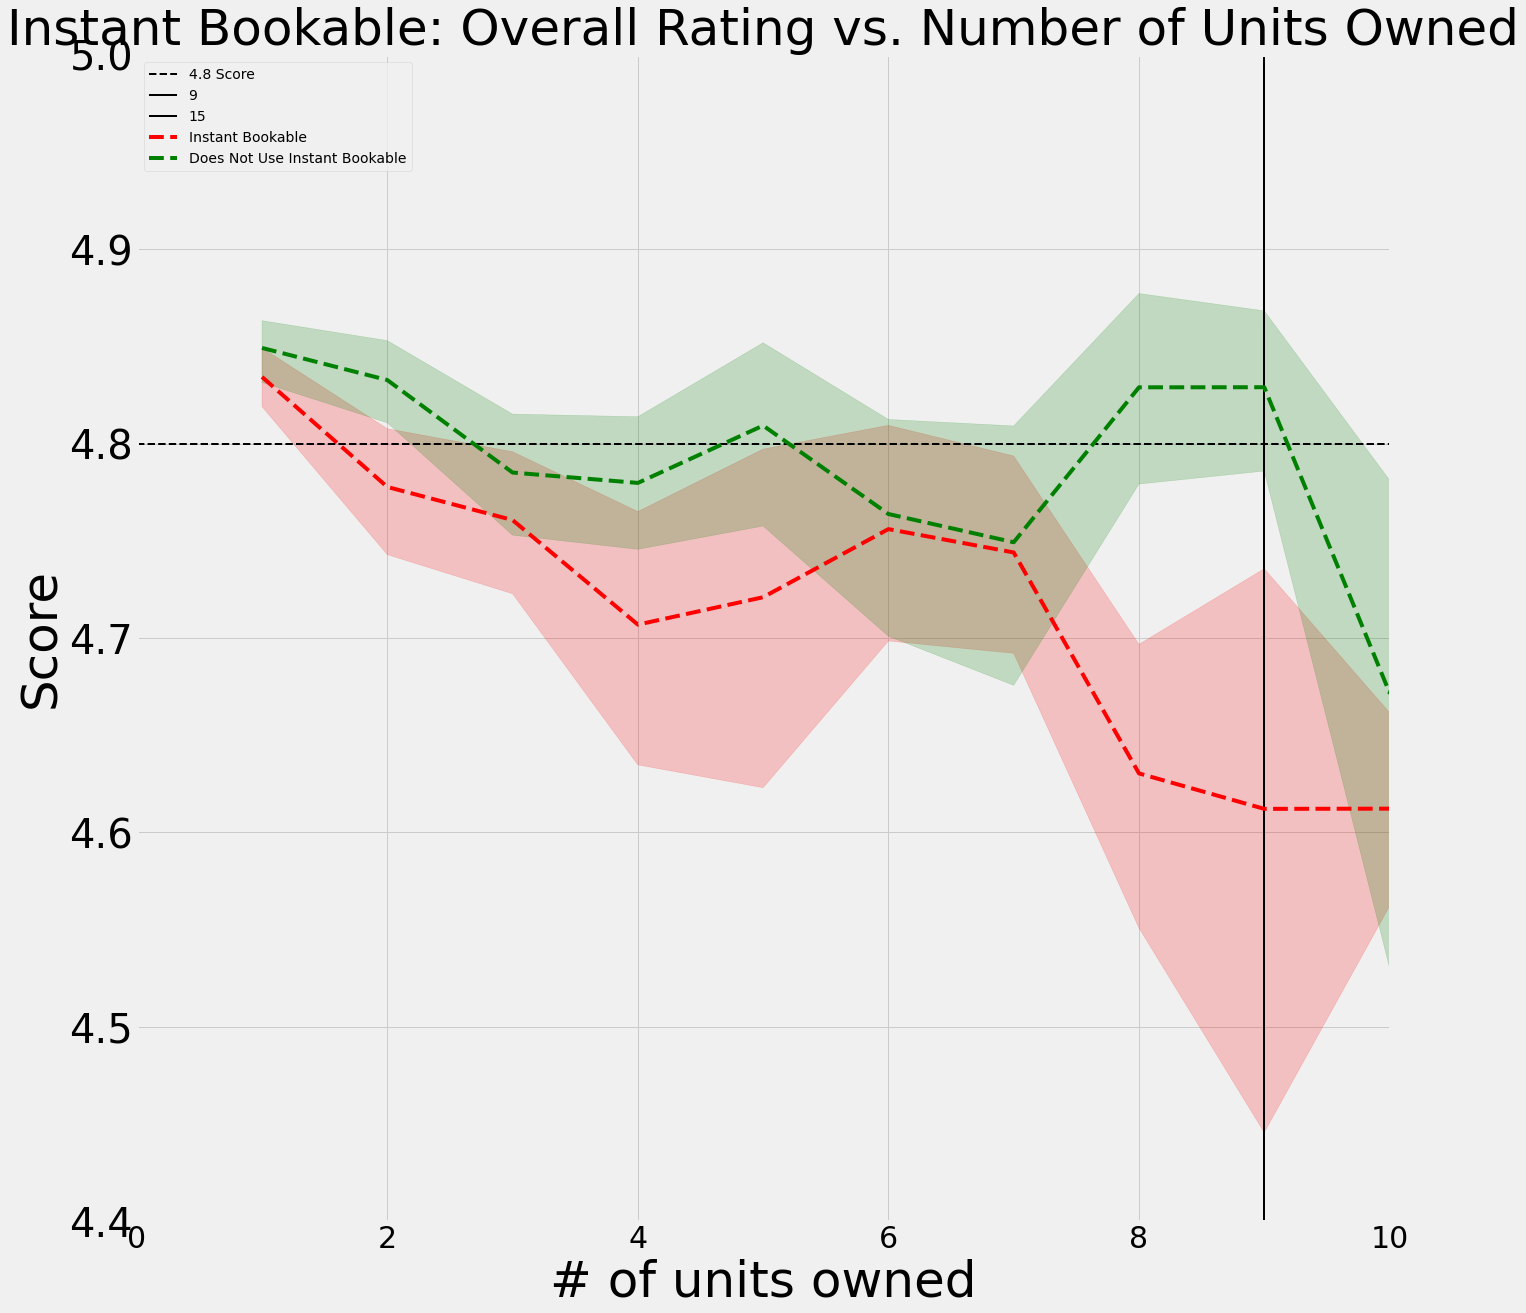

In [224]:
fig, ax = plt.subplots(figsize=(20,20))

ax.axhline(4.8, ls='--', color='black', linewidth=(2), label='4.8 Score')
ax.axvline(9, color='black', linewidth=(2), label='9')
ax.axvline(15, color='black', linewidth=(2), label='15')

plt.ylim([4.4, 5])
plt.xlim([0, 10])


p = sns.lineplot(data=instant_bookable_df, x='calculated_host_listings_count', y='review_scores_rating',
                 ls = '--', color ='red', label = "Instant Bookable" );
p = sns.lineplot(data=not_instant_bookable_df, x='calculated_host_listings_count', y='review_scores_rating',
                 ls = '--', color ='green', label= 'Does Not Use Instant Bookable' );


p.set_ylabel("Score", fontsize = 50)

p.set_xlabel("# of units owned", fontsize = 50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=40)

#ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Instant Bookable: Overall Rating vs. Number of Units Owned", fontsize = 50)
plt.figsize=(30,20) 

plt.show();

In [167]:
superhost_df = host_listings[host_listings['superhost'] == True]
not_superhost_df = host_listings[host_listings['superhost'] == False]

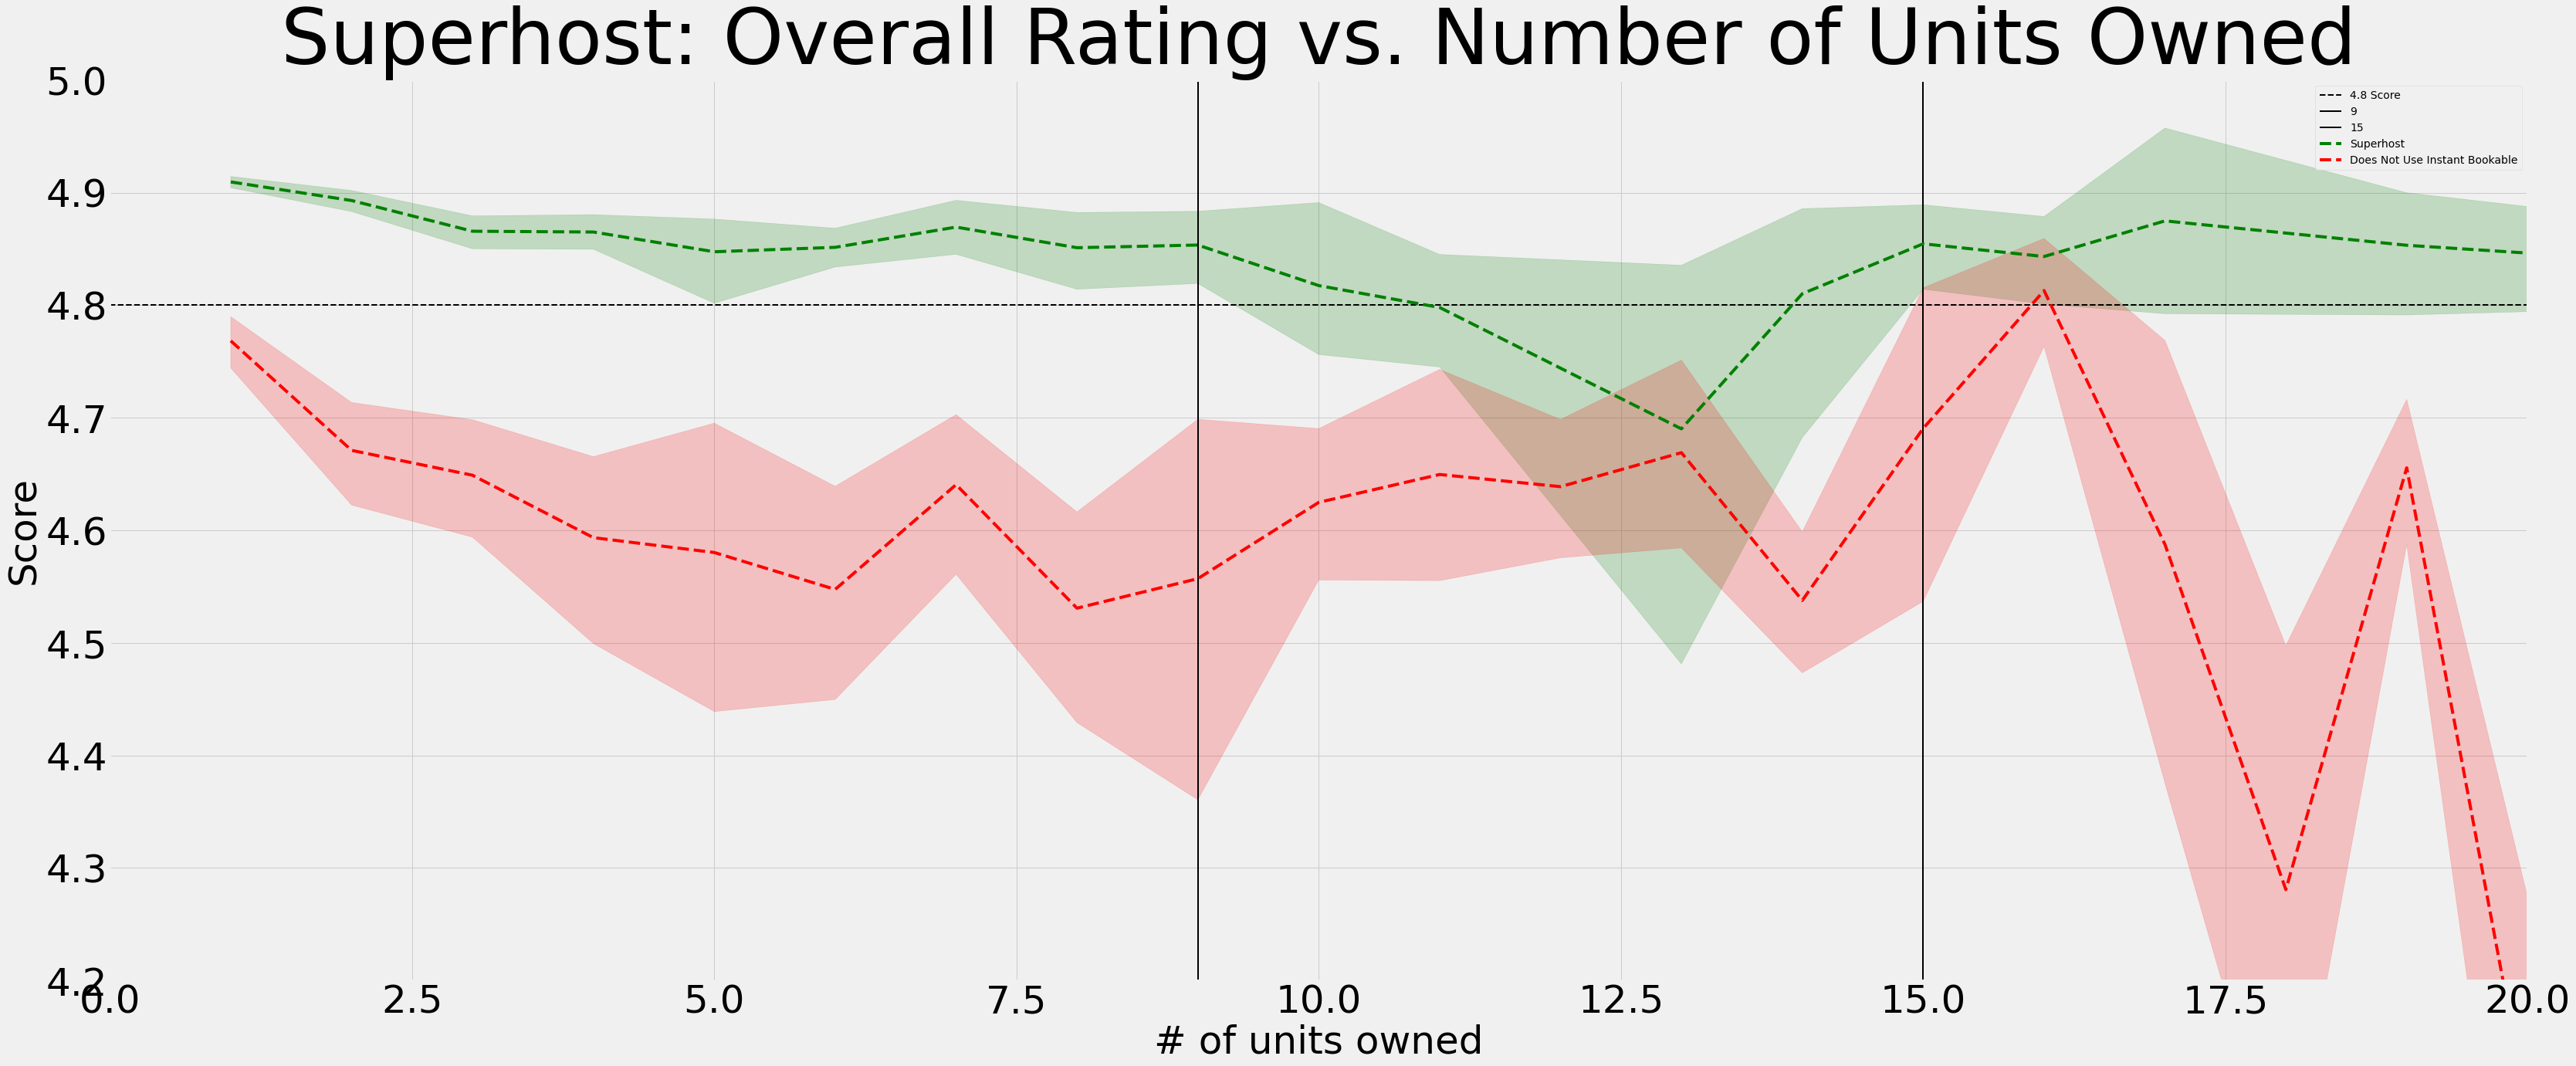

In [168]:
fig, ax = plt.subplots(figsize=(50,20))

ax.axhline(4.8, ls='--', color='black', linewidth=(2), label='4.8 Score')
ax.axvline(9, color='black', linewidth=(2), label='9')
ax.axvline(15, color='black', linewidth=(2), label='15')

plt.ylim([4.2, 5])
plt.xlim([0, 20])


p = sns.lineplot(data=superhost_df, x='calculated_host_listings_count', y='review_scores_rating',
                 ls = '--', color ='green', label = "Superhost" );
p = sns.lineplot(data=not_superhost_df, x='calculated_host_listings_count', y='review_scores_rating',
                 ls = '--', color ='red', label= 'Does Not Use Instant Bookable' );


p.set_ylabel("Score", fontsize = 50)

p.set_xlabel("# of units owned", fontsize = 50)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)

#ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Superhost: Overall Rating vs. Number of Units Owned", fontsize = 100)
plt.figsize=(30,20) 

plt.show();

In [169]:
review_metrics.head(1)

instant_bookable  host_listings_5-  capacity_5+  bedrooms_2+  \
0              True              True        False        False   

   bookings_above_avg  availability_30_rate  host_response_100  superhost  \
0                True                 0.000               True      False   

   5_star  accuracy_5  cleanliness_5  checkin_5  location_5  value_5  \
0    True        True           True       True       False     True   

   communication_5  price_200+  
0             True       False

In [170]:
review_metrics['host_listings_11-49'].value_counts()

KeyError: 'host_listings_11-49'

In [ ]:
listing_metrics = review_metrics.groupby('host_listings_11-49').mean()
get_stats(listing_metrics)

### Significant Advantage to being a Superhost?
- 

### Analysis:
    - Even a small drop in accuracy results in a drop in the review score rating.

### Analysis:
- Units with a perfect accuracy rating were 72% more likely to have a perfect overall rating.
- Units with a perfect cleanliness rating were 64% more likely to have a perfect overall rating.
- Units with a perfect checkin rating were 63% more likely to have a perfect overall rating.
- Units with a perfect location rating were 58% more likely to have a perfect overall rating.
- Units with a perfect value rating were 56% more likely to have a perfect overall rating.


## Conclusion

## Further Work

- use NLP to process and analyze ammenties. Get them into a format where they can be one-hot encoded and fed into the model.
- Increase the scope of this model, incorporating data from the rest of california, and then the rest of the US.